
Descriptive Statistics for Individual Buildings:
                              mean        std      min       max        q25  \
meter_location                                                                
D402, Hayward College     61486.18   19780.38  32000.0  100000.0   43475.00   
E201 Dental Steam Total   74721.26   41782.79  20095.0  219582.0   47334.33   
F402, Union               65395.88   39306.05      0.0  142510.0   39162.50   
F419, ISB                 86823.53   46975.10  19800.0  177000.0   48750.00   
F505, Richardson Total   153022.06   71514.74  33310.0  277480.0   84070.00   
F518, Arts Building       53141.18   28391.72   6900.0  103400.0   28925.00   
G401 Mellor Lab total    250332.39  102827.06  99400.0  451200.0  163075.05   
G404, Microbiology       108071.18   40355.10  40790.0  198140.0   76570.00   
G405, Science 3          127532.35   55235.03  32900.0  259000.0   85600.00   
G413, Science 2 total    162261.47   55764.17  76460.0  263150.0  112822.50   
G6

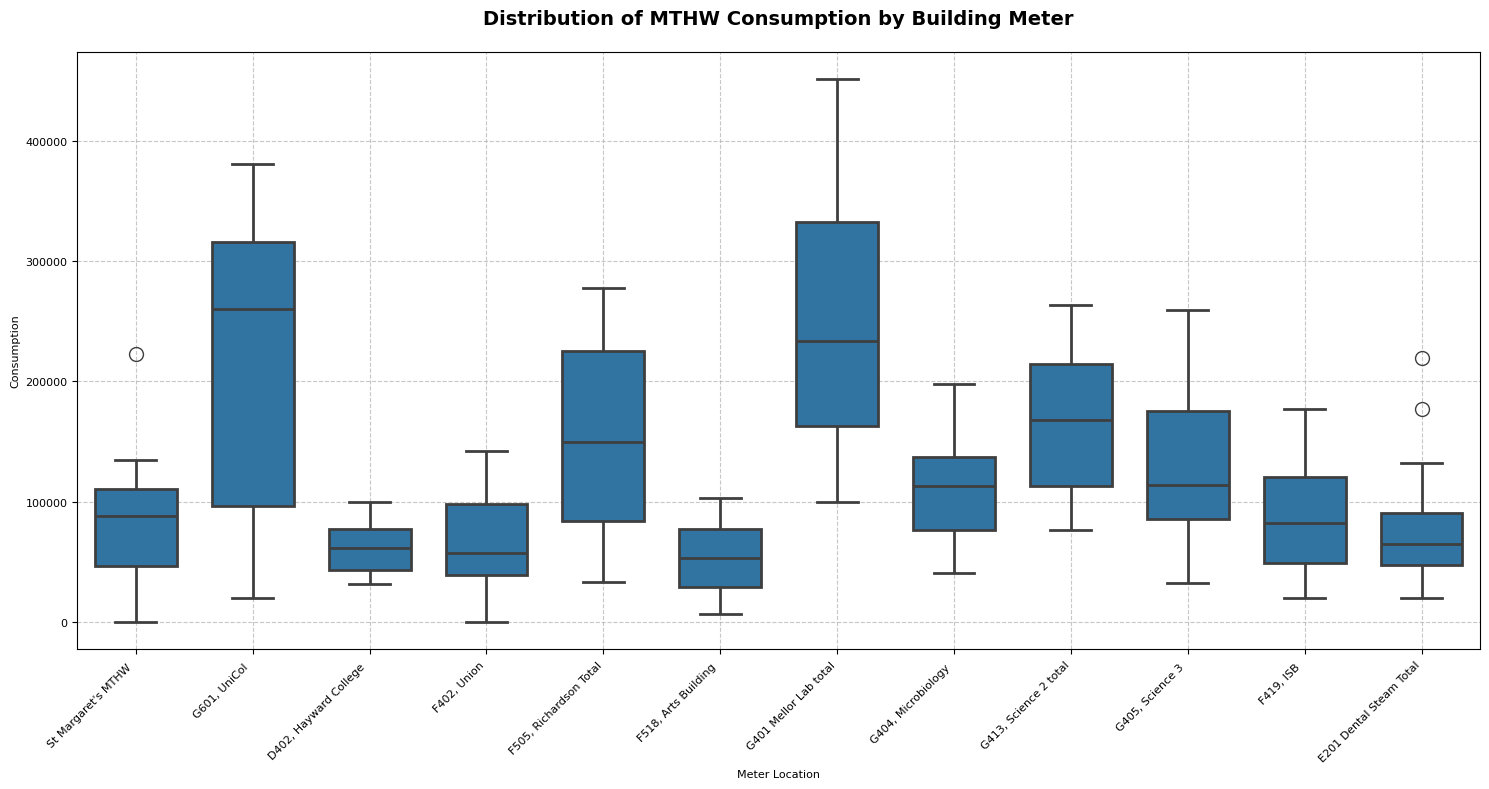

In [121]:
# Import required libraries
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the MTHW data
BASE_DIR = Path(os.getcwd()).parents[2]  # Get root directory
FILE_PATH = BASE_DIR / "backend/data/Cleaned/Mthw_data.csv"
mthw_df = pd.read_csv(FILE_PATH)

# Separate building meters and total consumption
building_meters = mthw_df.iloc[:-1] # First 13 rows (individual buildings)
total_consumption = mthw_df.iloc[-1:] # Last row (total consumption)

# Melt the dataframe to convert months to rows for analysis
melted_buildings = pd.melt(building_meters, 
                          id_vars=['meter_location'],
                          var_name='month', 
                          value_name='consumption')

melted_total = pd.melt(total_consumption,
                       id_vars=['meter_location'],
                       var_name='month',
                       value_name='consumption')

# Calculate descriptive statistics for building meters
building_stats = melted_buildings.groupby('meter_location')['consumption'].agg([
    'mean',
    'std',
    'min',
    'max',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75),
    lambda x: x.skew(),
    lambda x: x.kurtosis()
]).round(2)

building_stats.columns = ['mean', 'std', 'min', 'max', 'q25', 'q75', 'skewness', 'kurtosis']

# Calculate descriptive statistics for total consumption
total_stats = melted_total.groupby('meter_location')['consumption'].agg([
    'mean',
    'std', 
    'min',
    'max',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75),
    lambda x: x.skew(),
    lambda x: x.kurtosis()
]).round(2)

total_stats.columns = ['mean', 'std', 'min', 'max', 'q25', 'q75', 'skewness', 'kurtosis']

print("\nDescriptive Statistics for Individual Buildings:")
print(building_stats)
print("\nDescriptive Statistics for Total Consumption:")
print(total_stats)

# Create boxplot visualization
plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_buildings, x='meter_location', y='consumption',
            width=0.7,
            linewidth=2,
            fliersize=10)
plt.xticks(rotation=45, ha='right',fontsize=8)
plt.yticks(fontsize=8)
plt.title('Distribution of MTHW Consumption by Building Meter', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Meter Location', fontsize=8)
plt.ylabel('Consumption', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


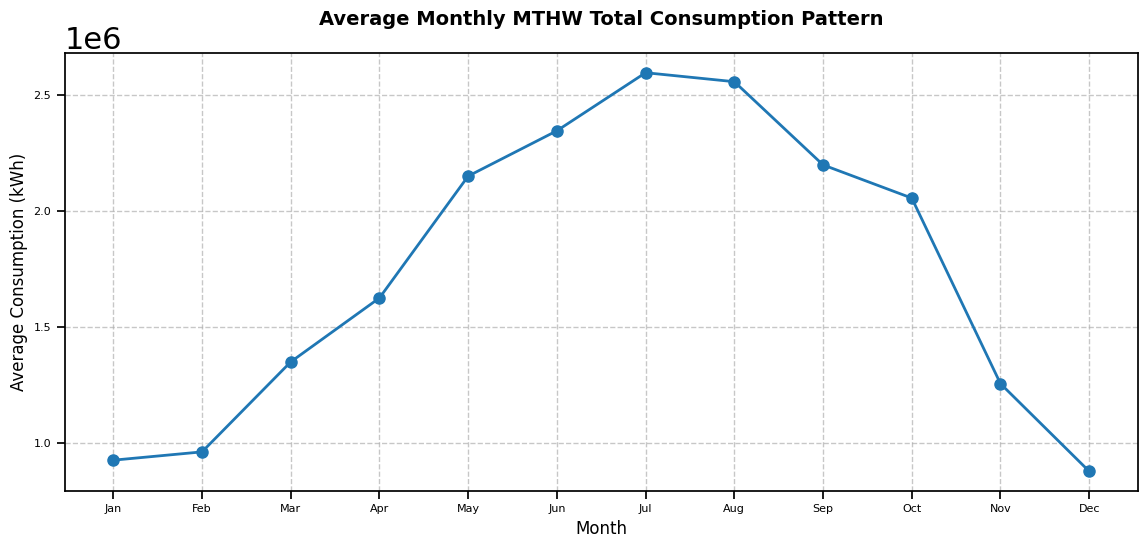

In [114]:


# Create monthly average consumption pattern
monthly_avg = melted_total.groupby(melted_total['month'].dt.month)['consumption'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=8)
plt.title('Average Monthly MTHW Total Consumption Pattern', 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Consumption (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


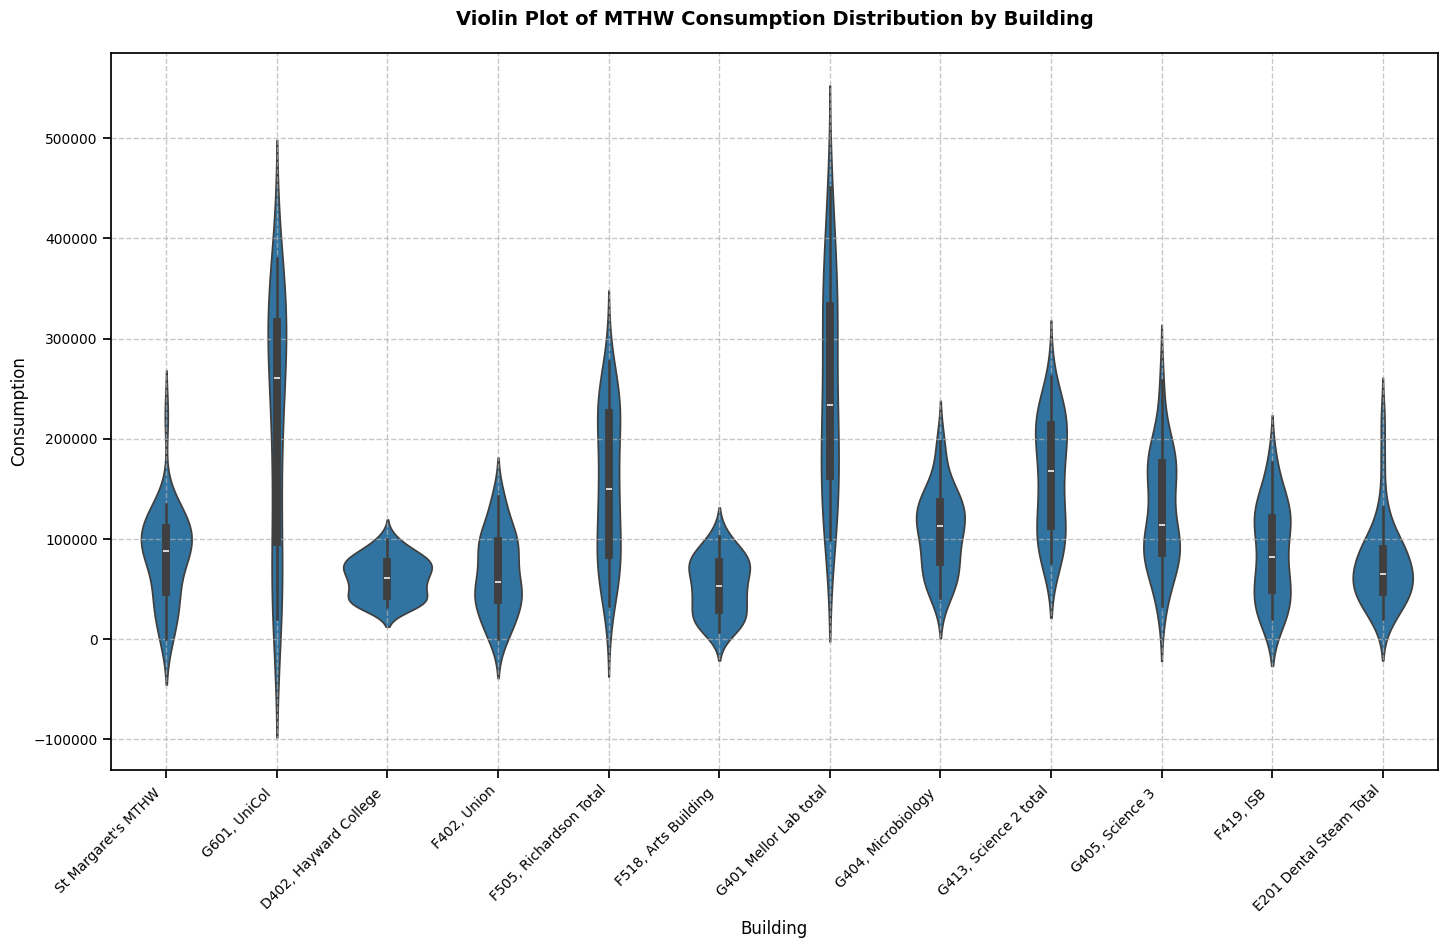

In [104]:
# Create violin plot
plt.figure(figsize=(15, 10))
sns.violinplot(data=melted_buildings,
               x='meter_location',
               y='consumption')

plt.title('Violin Plot of MTHW Consumption Distribution by Building',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Building', fontsize=12)
plt.ylabel('Consumption', fontsize=12)
plt.xticks(rotation=45, ha='right',fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

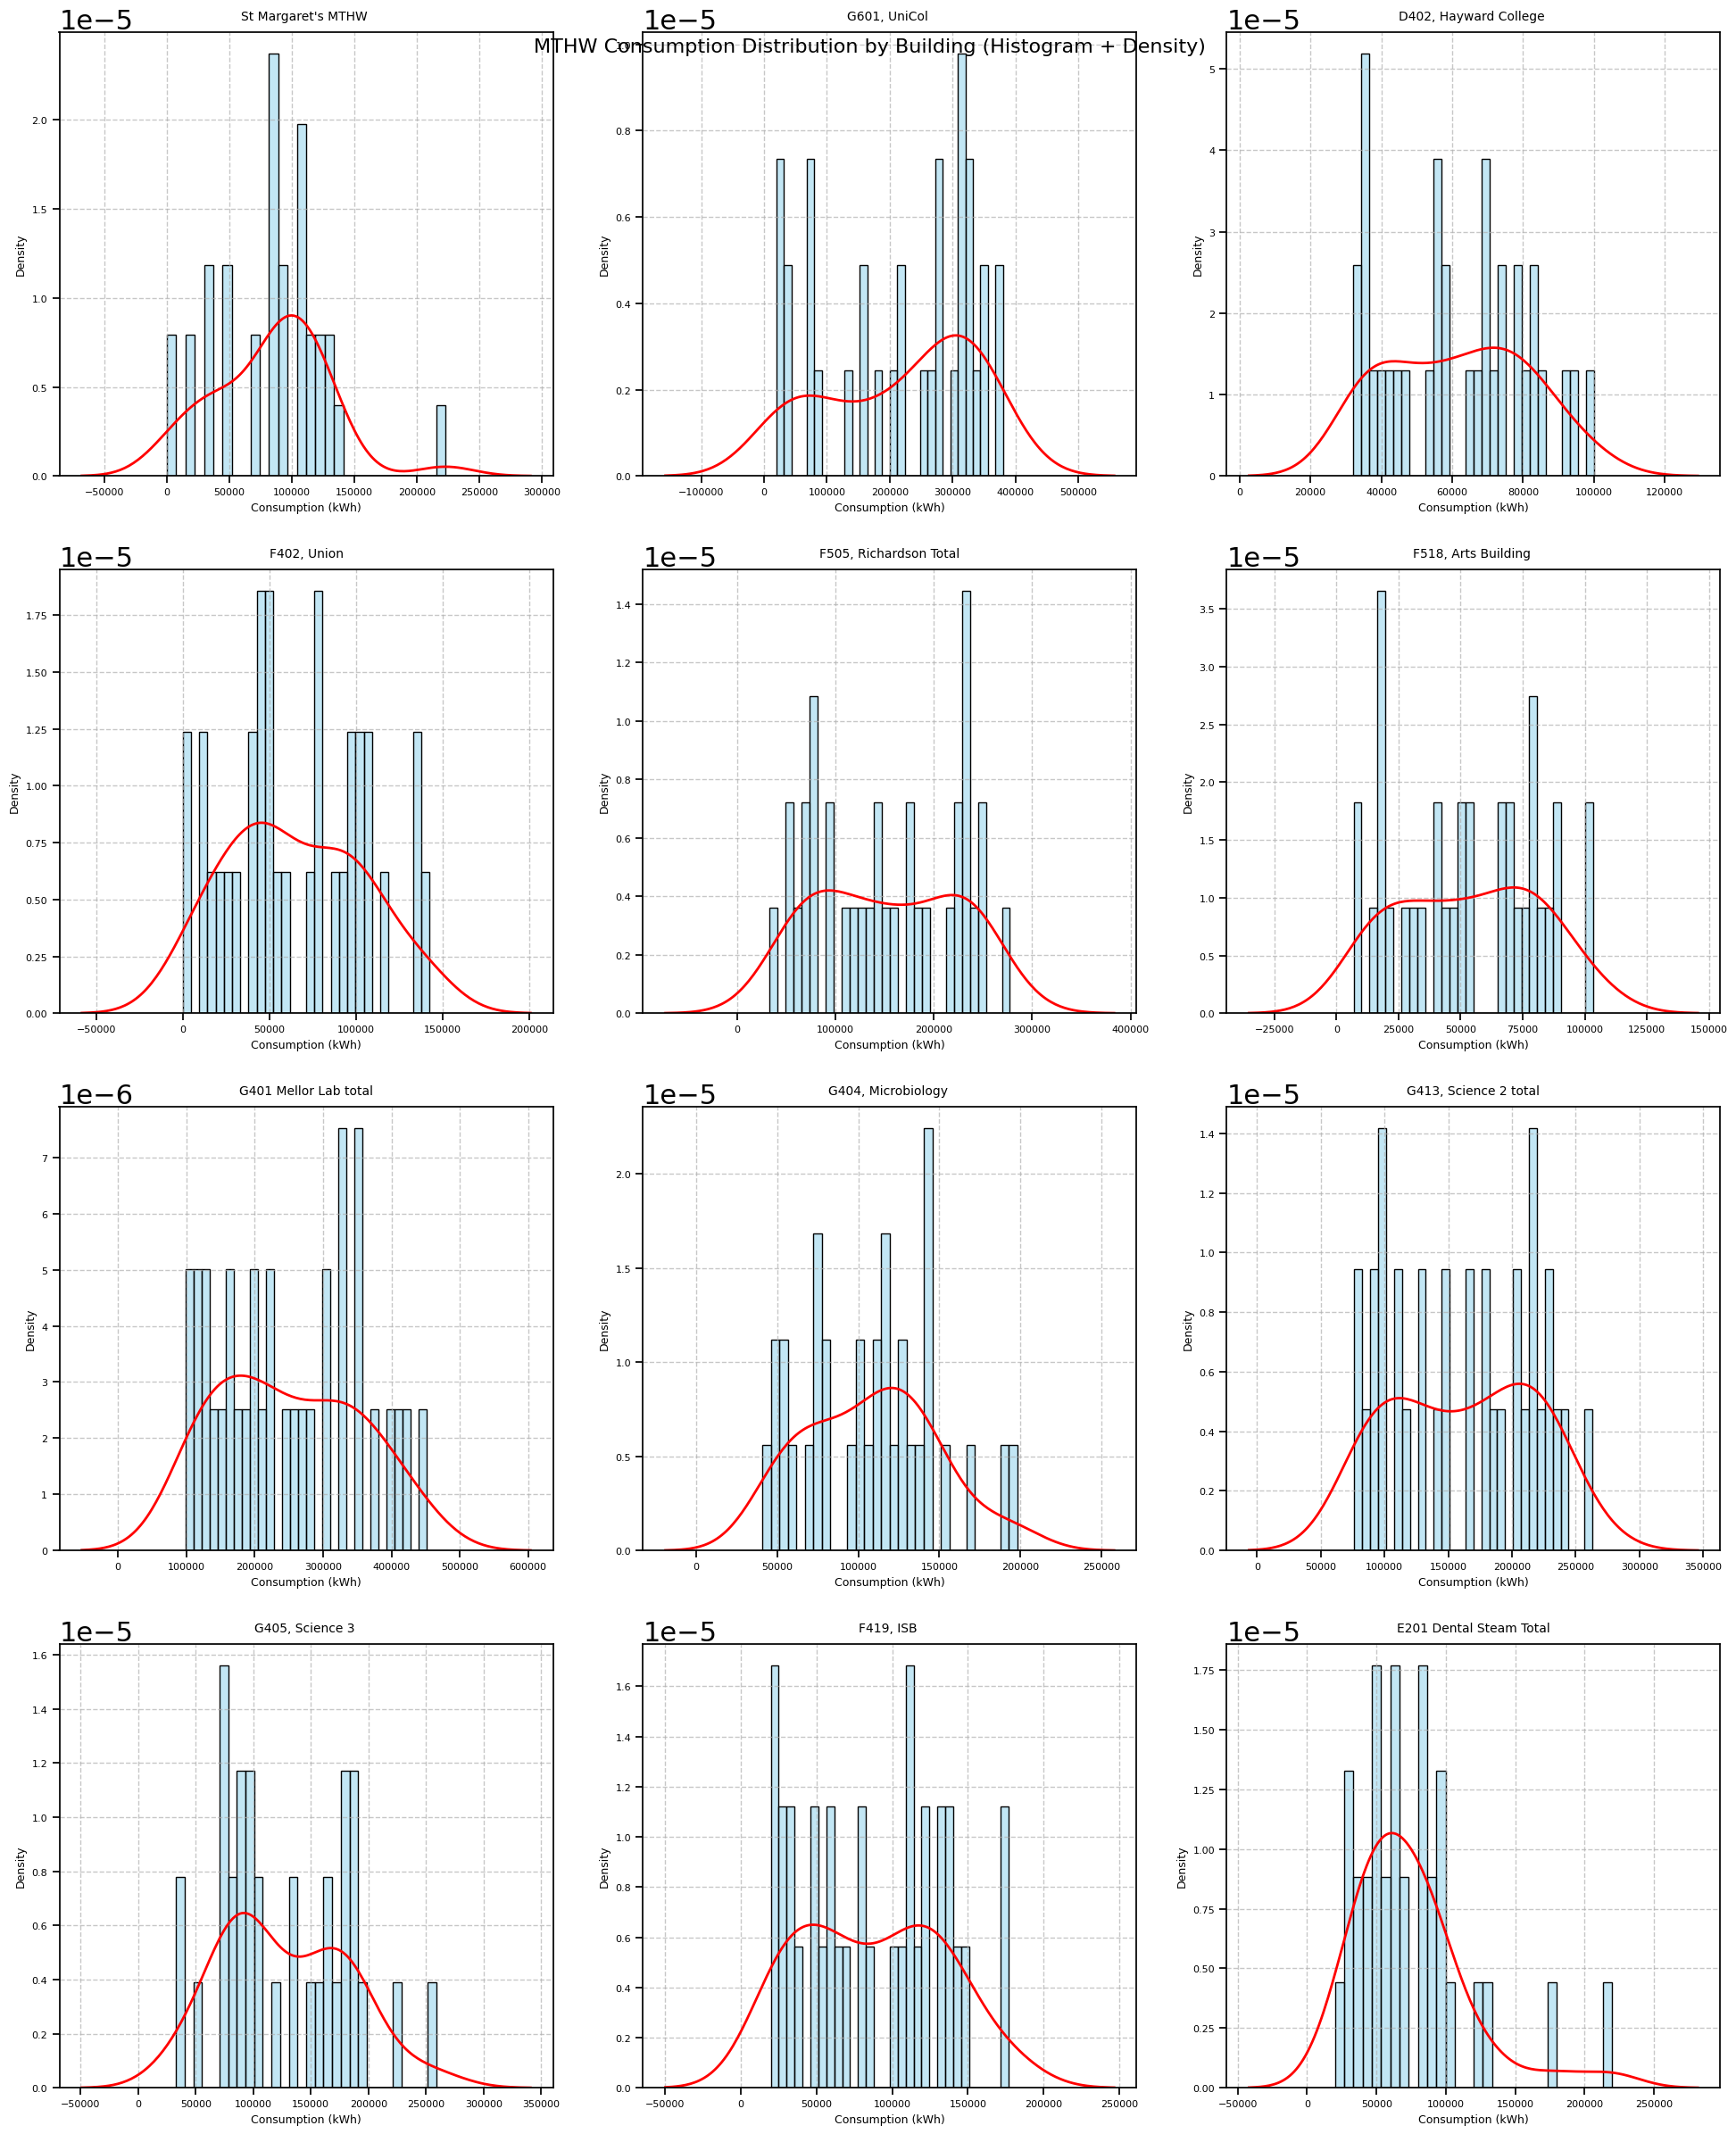

In [68]:
# Combined histogram and density plot
fig, axes = plt.subplots(4, 3, figsize=(20, 25))
axes = axes.ravel()

# Plot combined histogram and density for each building
for idx, building in enumerate(melted_buildings['meter_location'].unique()):
    building_data = melted_buildings[melted_buildings['meter_location'] == building]
    
    # Plot histogram
    sns.histplot(data=building_data,
                 x='consumption',
                 bins=30,
                 ax=axes[idx],
                 alpha=0.5,
                 color='skyblue',
                 stat='density',
                 edgecolor='black')
    
    # Overlay density plot
    sns.kdeplot(data=building_data,
                x='consumption',
                ax=axes[idx],
                color='red',
                linewidth=2)
    
    axes[idx].set_title(f'{building}', fontsize=10, pad=10)
    axes[idx].set_xlabel('Consumption (kWh)', fontsize=9)
    axes[idx].set_ylabel('Density', fontsize=9)
    axes[idx].tick_params(axis='both', labelsize=8)
    axes[idx].grid(True, linestyle='--', alpha=0.7)

plt.suptitle('MTHW Consumption Distribution by Building (Histogram + Density)', 
            fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

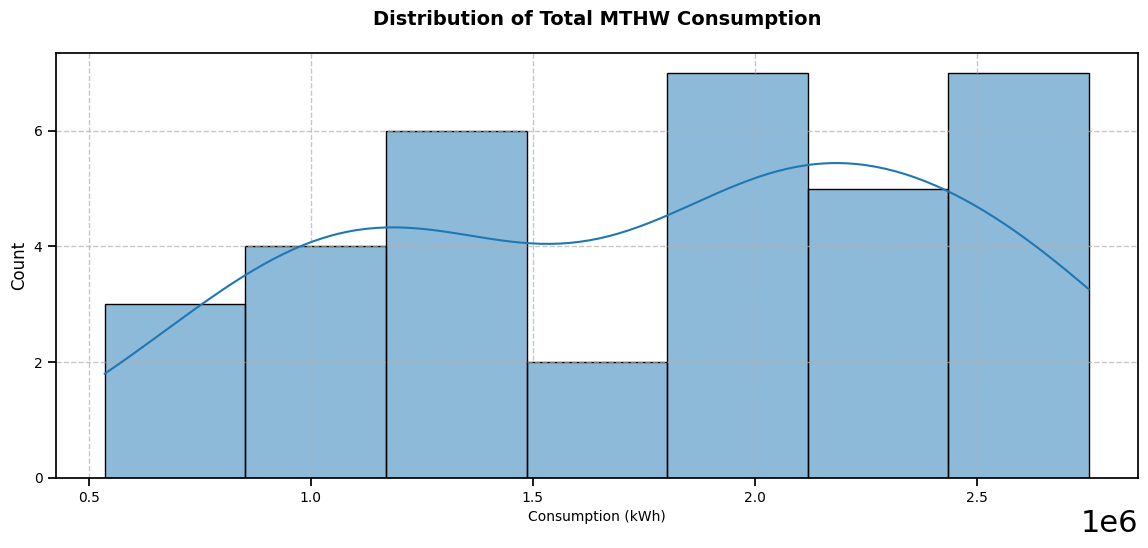

In [112]:
# 3. Density Plot + Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=melted_total, x='consumption', kde=True)
plt.title('Distribution of Total MTHW Consumption', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Consumption (kWh)', fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

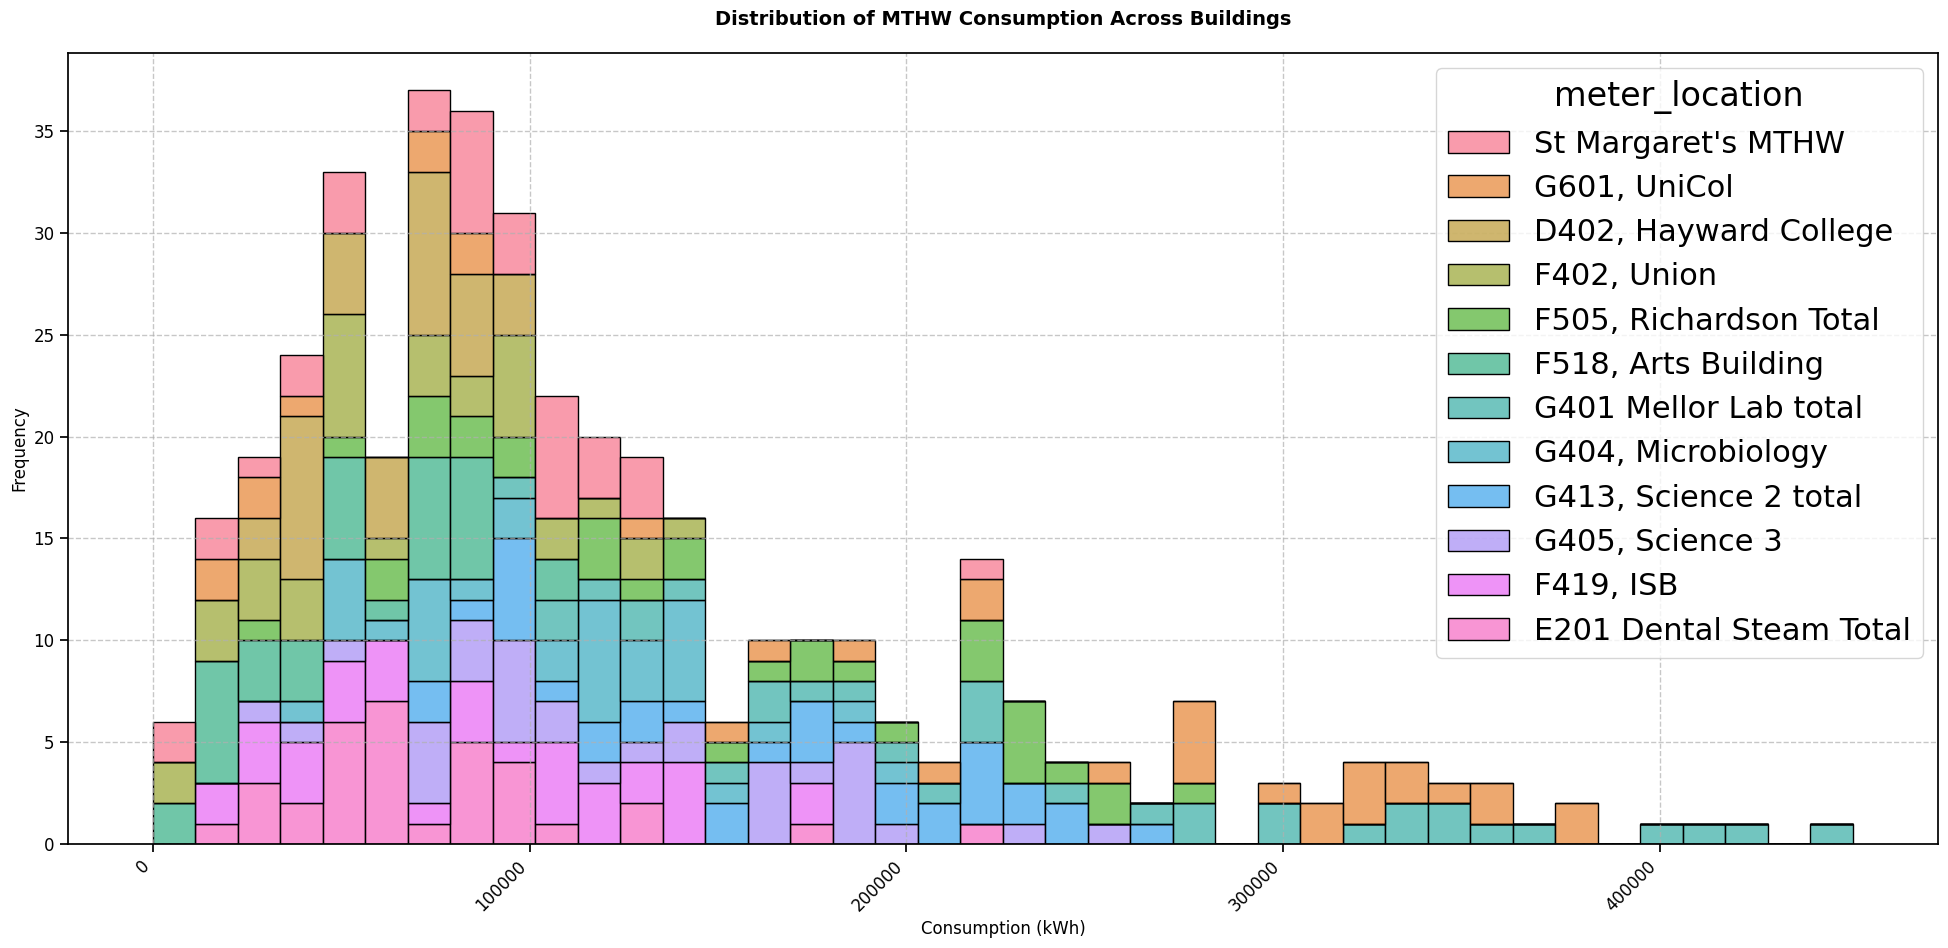

In [106]:
sns.set_context("notebook", font_scale=2)
# Create distribution plots with proper labels
plt.figure(figsize=(20, 10))

# Create histogram with density plot overlay and visible labels 
g = sns.histplot(data=melted_buildings, 
                 x='consumption',
                 hue='meter_location',  
                 stat='count',
                 multiple="stack",
                 bins=40,  
                 alpha=0.7)

plt.title('Distribution of MTHW Consumption Across Buildings', 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Consumption (kWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right',fontsize=12)

plt.yticks(fontsize=12)
# Keep legend inside plot area with proper formatting
#handles, labels = g.get_legend_handles_labels()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

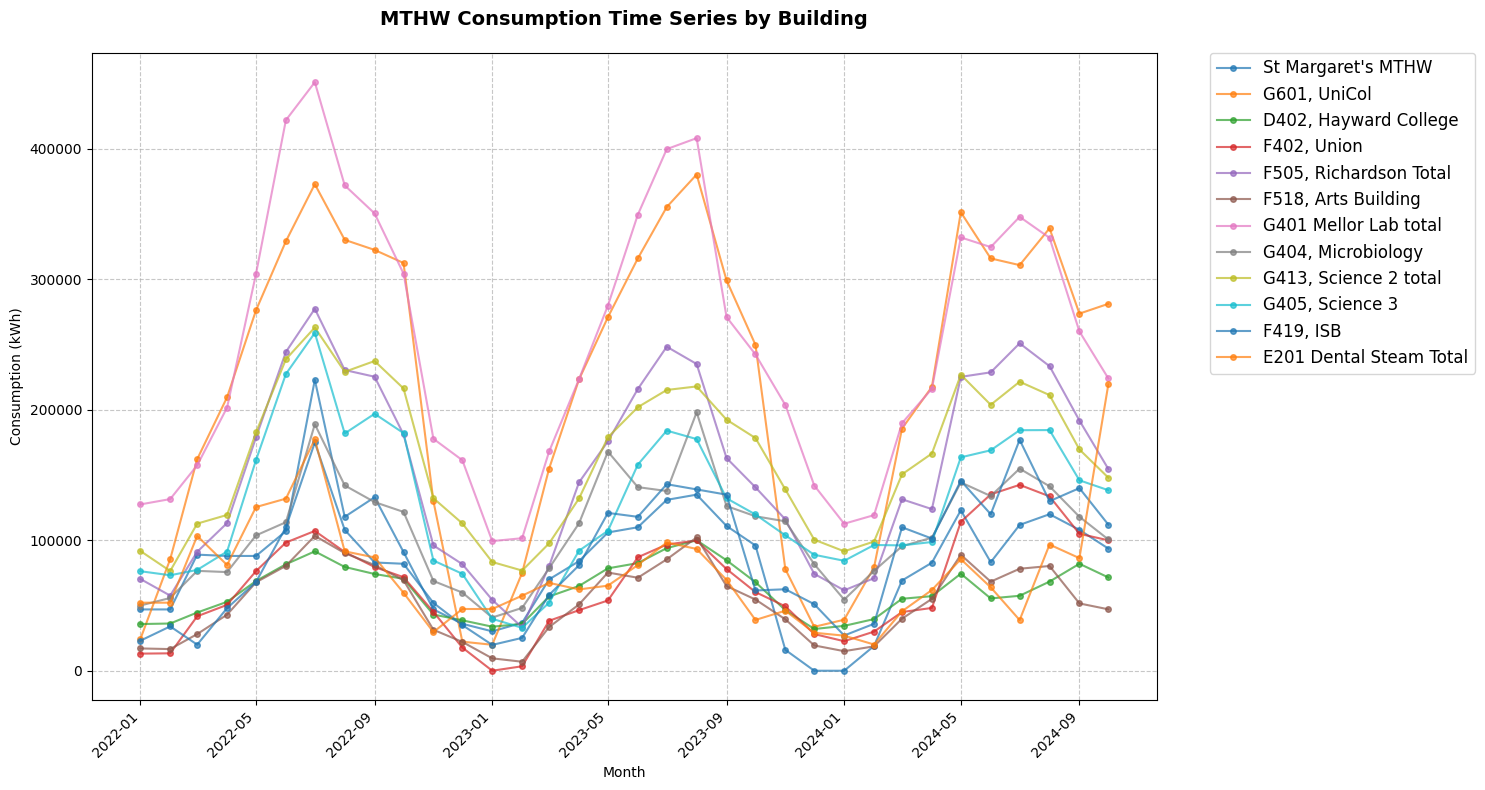

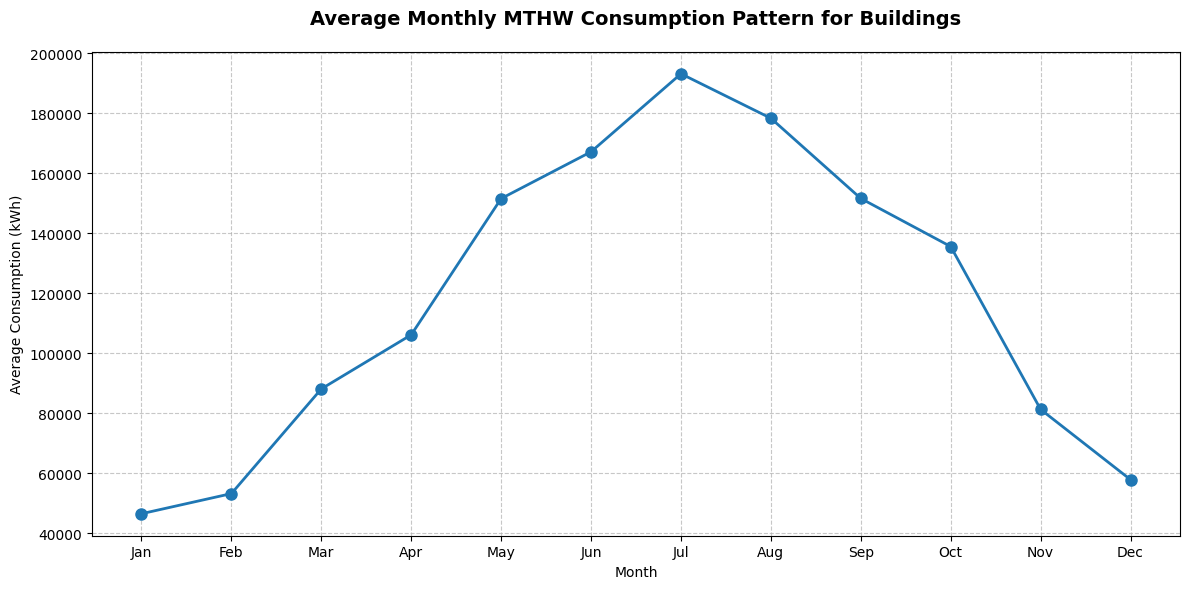

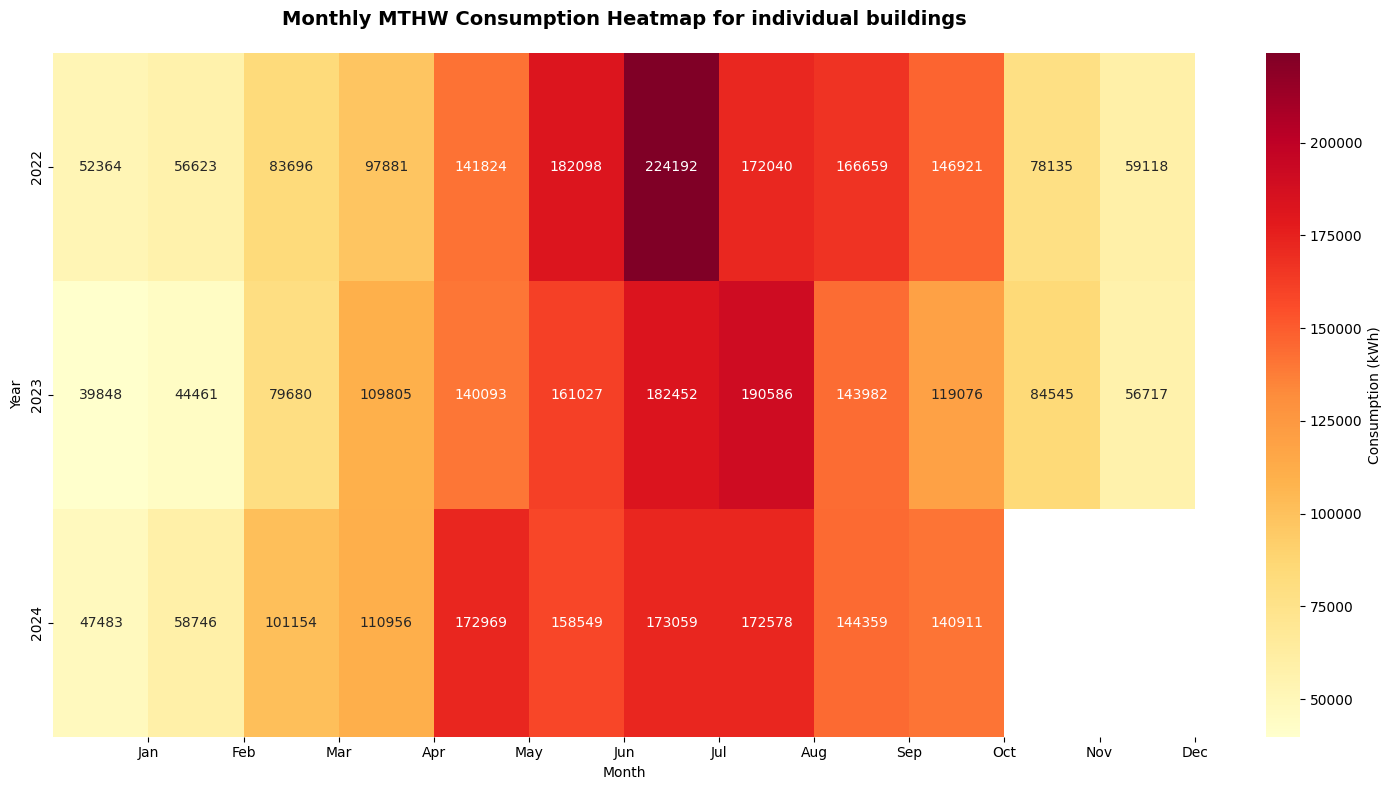

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

building_meters = mthw_df.iloc[:-1] # First 13 rows (individual buildings)

# Melt the dataframe to convert months to rows for analysis
melted_buildings = pd.melt(building_meters, 
                          id_vars=['meter_location'],
                          var_name='month', 
                          value_name='consumption')

# Create time series plot
plt.figure(figsize=(15, 8))

# Convert month column to datetime properly
melted_buildings['month'] = pd.to_datetime(melted_buildings['month'].apply(lambda x: '01-' + x.replace('_', '-')))

# Create line plot for each building
for building in melted_buildings['meter_location'].unique():
    building_data = melted_buildings[melted_buildings['meter_location'] == building]
    plt.plot(building_data['month'], building_data['consumption'], 
             label=building, alpha=0.7, marker='o', markersize=4)

plt.title('MTHW Consumption Time Series by Building', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Consumption (kWh)', fontsize=10)
plt.xticks(rotation=45, ha='right',fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=12)
plt.tight_layout()
plt.show()

# Create monthly average consumption pattern
plt.figure(figsize=(12, 6))
monthly_avg = melted_buildings.groupby(melted_buildings['month'].dt.month)['consumption'].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=8)
plt.title('Average Monthly MTHW Consumption Pattern for Buildings', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Average Consumption (kWh)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Create heatmap for monthly consumption patterns
pivot_data = melted_buildings.pivot_table(
    values='consumption',
    index=melted_buildings['month'].dt.year,
    columns=melted_buildings['month'].dt.month,
    aggfunc='mean'
)

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.0f', 
            cbar_kws={'label': 'Consumption (kWh)'}, annot_kws={'size': 10})
plt.title('Monthly MTHW Consumption Heatmap for individual buildings', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Year', fontsize=10)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


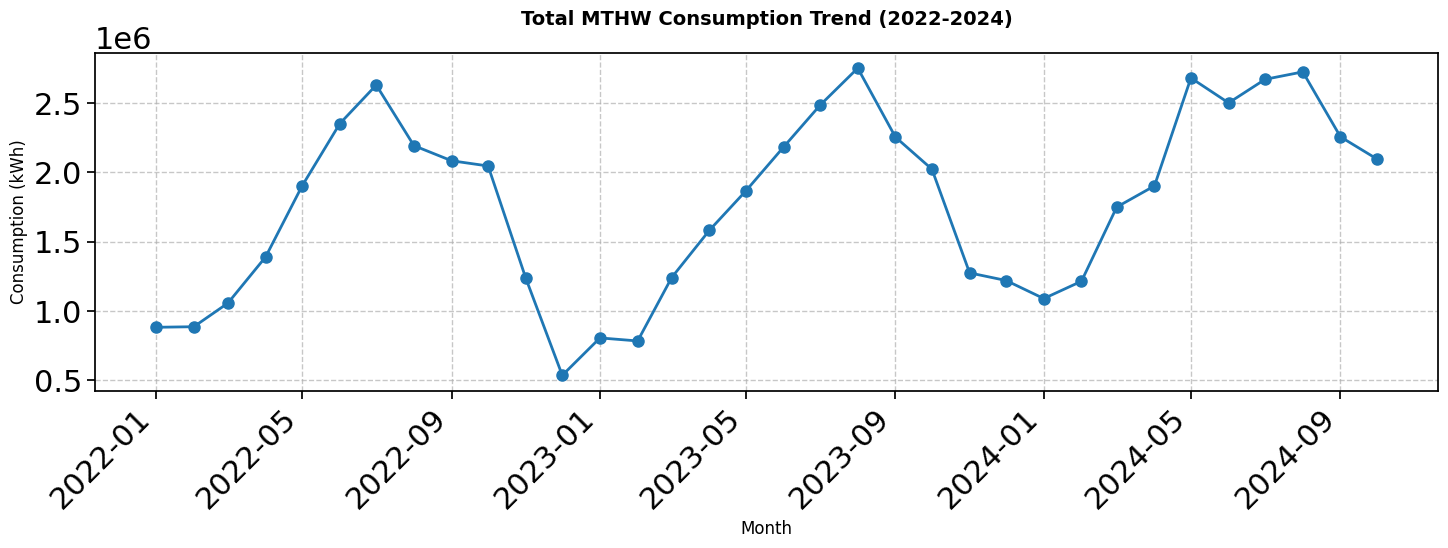

In [113]:
# 4. Temporal Trend
# Convert month to datetime
melted_total['month'] = pd.to_datetime(melted_total['month'].apply(lambda x: '01-' + x.replace('_', '-')))

plt.figure(figsize=(15, 6))
plt.plot(melted_total['month'], melted_total['consumption'], 
         marker='o', linewidth=2, markersize=8)
plt.title('Total MTHW Consumption Trend (2022-2024)', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Consumption (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

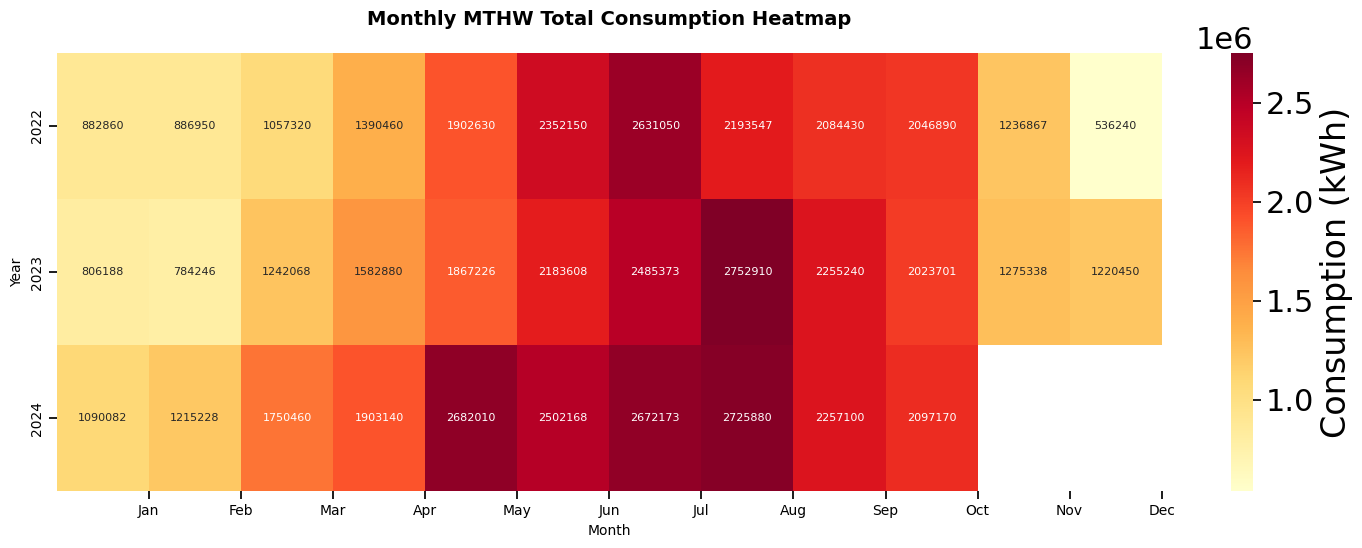

In [116]:
# 6. Heat Map
pivot_data = melted_total.pivot_table(
    values='consumption',
    index=melted_total['month'].dt.year,
    columns=melted_total['month'].dt.month,
    aggfunc='mean'
)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.0f', 
            annot_kws={'size': 8},
            cbar_kws={'label': 'Consumption (kWh)'})
plt.title('Monthly MTHW Total Consumption Heatmap', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Year', fontsize=10)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

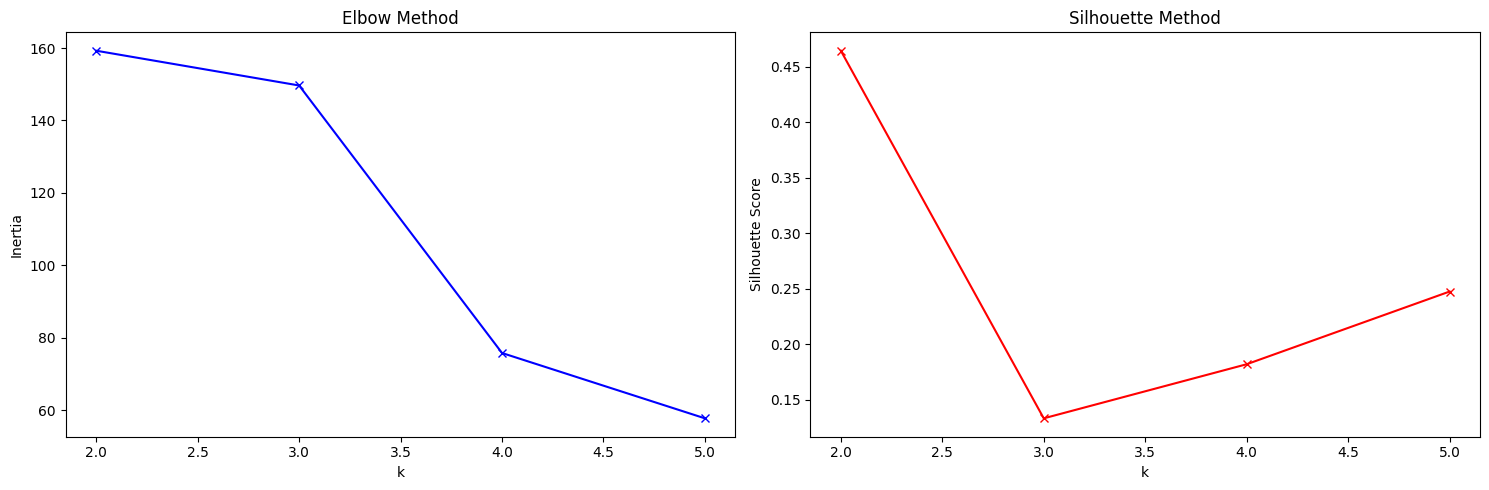

Optimal number of clusters: 2


In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(building_data)

# Function to find optimal k using elbow method and silhouette score
def find_optimal_k(data, max_k):
    # Calculate inertia and silhouette scores for different k values
    inertias = []
    silhouette_scores = []
    k_values = range(2, max_k+1)
    
    # Create figure for plotting
    plt.figure(figsize=(15, 5))
    
    # Calculate scores for each k
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    # Plot Elbow curve
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    
    # Plot Silhouette scores
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, 'rx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    
    plt.tight_layout()
    plt.show()
    
    # Return k with highest silhouette score
    return k_values[np.argmax(silhouette_scores)]

# Find optimal k
optimal_k = find_optimal_k(data_scaled, 5)
print(f"Optimal number of clusters: {optimal_k}")


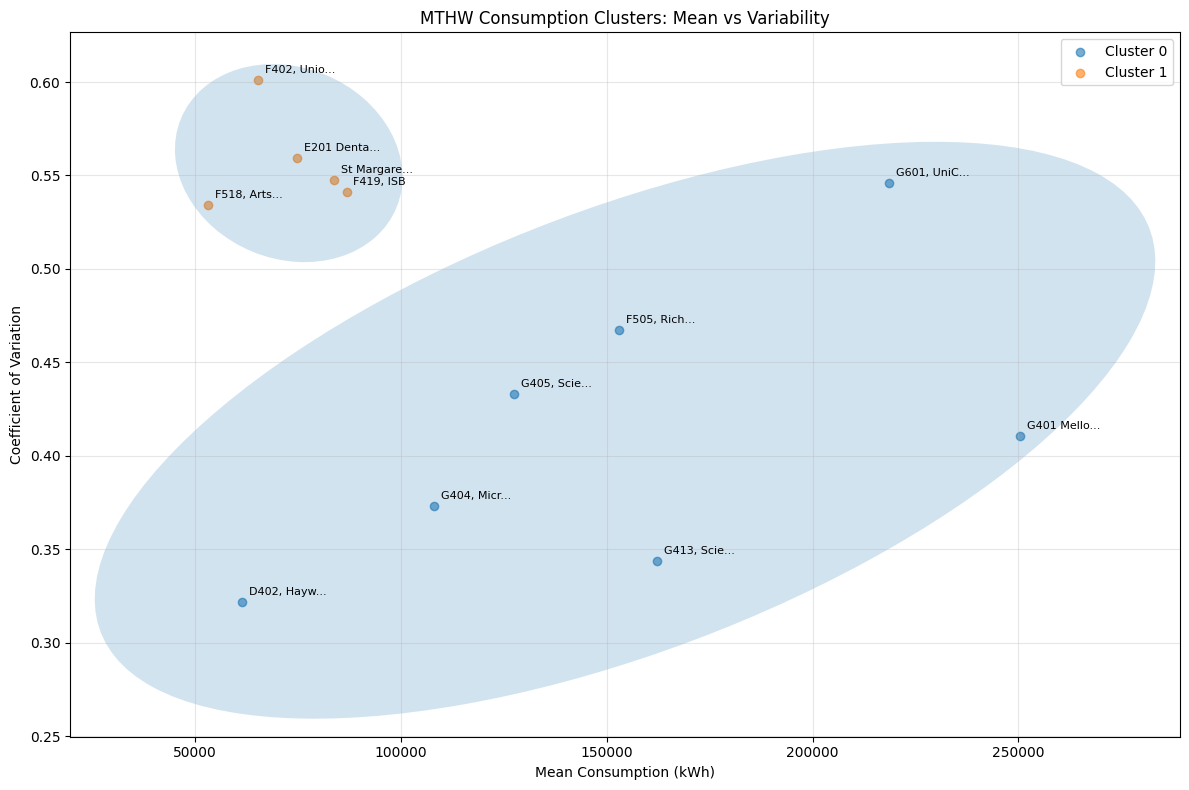


Cluster Analysis:

Cluster 0 buildings:
- G601, UniCol : Mean = 218518.03 kWh, CV = 0.55
- D402, Hayward College : Mean = 61486.18 kWh, CV = 0.32
- F505, Richardson Total: Mean = 153022.06 kWh, CV = 0.47
- G401 Mellor Lab total: Mean = 250332.39 kWh, CV = 0.41
- G404, Microbiology : Mean = 108071.18 kWh, CV = 0.37
- G413, Science 2 total: Mean = 162261.47 kWh, CV = 0.34
- G405, Science 3 : Mean = 127532.35 kWh, CV = 0.43

Cluster 1 buildings:
- St Margaret's MTHW : Mean = 83842.65 kWh, CV = 0.55
- F402, Union: Mean = 65395.88 kWh, CV = 0.60
- F518, Arts Building : Mean = 53141.18 kWh, CV = 0.53
- F419, ISB : Mean = 86823.53 kWh, CV = 0.54
- E201 Dental Steam Total: Mean = 74721.26 kWh, CV = 0.56


In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for clustering
def prepare_cluster_data(melted_buildings):
    # Calculate mean and coefficient of variation for each building
    cluster_data = []
    
    for building in melted_buildings['meter_location'].unique():
        building_data = melted_buildings[melted_buildings['meter_location'] == building]
        mean_consumption = building_data['consumption'].mean()
        # Coefficient of variation = standard deviation / mean
        cv = building_data['consumption'].std() / mean_consumption if mean_consumption != 0 else 0
        
        cluster_data.append({
            'building': building,
            'mean_consumption': mean_consumption,
            'coefficient_variation': cv
        })
    
    return pd.DataFrame(cluster_data)

# Create enhanced clustering plot
def plot_enhanced_clusters(data_df, n_clusters=2):
    # Prepare data for clustering
    X = data_df[['mean_consumption', 'coefficient_variation']].values
    X = StandardScaler().fit_transform(X)
    
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    data_df['cluster'] = clusters

    # Create plot
    plt.figure(figsize=(12, 8))
    
    # Plot clusters with different colors
    for i in range(n_clusters):
        mask = data_df['cluster'] == i
        plt.scatter(
            data_df[mask]['mean_consumption'],
            data_df[mask]['coefficient_variation'],
            label=f'Cluster {i}',
            alpha=0.6
        )
        
        # Add confidence ellipses
        from matplotlib.patches import Ellipse
        import matplotlib.transforms as transforms
        
        def confidence_ellipse(x, y, ax, n_std=2.0, **kwargs):
            if x.size != y.size:
                raise ValueError("x and y must be the same size")

            cov = np.cov(x, y)
            pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

            ell_radius_x = np.sqrt(1 + pearson)
            ell_radius_y = np.sqrt(1 - pearson)
            ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                            **kwargs)

            scale_x = np.sqrt(cov[0, 0]) * n_std
            scale_y = np.sqrt(cov[1, 1]) * n_std
            
            transf = transforms.Affine2D() \
                .rotate_deg(45) \
                .scale(scale_x, scale_y) \
                .translate(np.mean(x), np.mean(y))

            ellipse.set_transform(transf + ax.transData)
            return ax.add_patch(ellipse)

        confidence_ellipse(
            data_df[mask]['mean_consumption'],
            data_df[mask]['coefficient_variation'],
            plt.gca(),
            alpha=0.2
        )

    # Add building labels
    for idx, row in data_df.iterrows():
        plt.annotate(
            row['building'][:10] + '...' if len(row['building']) > 10 else row['building'],
            (row['mean_consumption'], row['coefficient_variation']),
            xytext=(5, 5), textcoords='offset points',
            fontsize=8
        )

    plt.xlabel('Mean Consumption (kWh)')
    plt.ylabel('Coefficient of Variation')
    plt.title('MTHW Consumption Clusters: Mean vs Variability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return data_df

# Execute the analysis
cluster_data = prepare_cluster_data(melted_buildings)
clustered_df = plot_enhanced_clusters(cluster_data)

# Print cluster information
print("\nCluster Analysis:")
for cluster in range(2):
    buildings = clustered_df[clustered_df['cluster'] == cluster]['building'].tolist()
    print(f"\nCluster {cluster} buildings:")
    for building in buildings:
        mean = clustered_df[clustered_df['building'] == building]['mean_consumption'].values[0]
        cv = clustered_df[clustered_df['building'] == building]['coefficient_variation'].values[0]
        print(f"- {building}: Mean = {mean:.2f} kWh, CV = {cv:.2f}")


Analyzing St Margaret's MTHW 


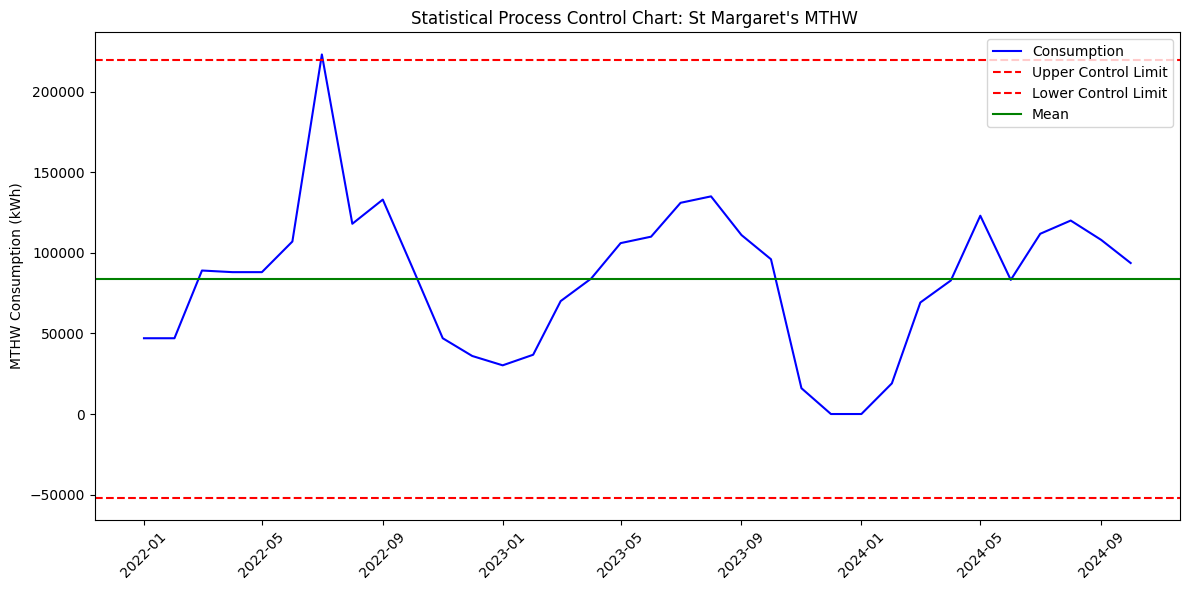

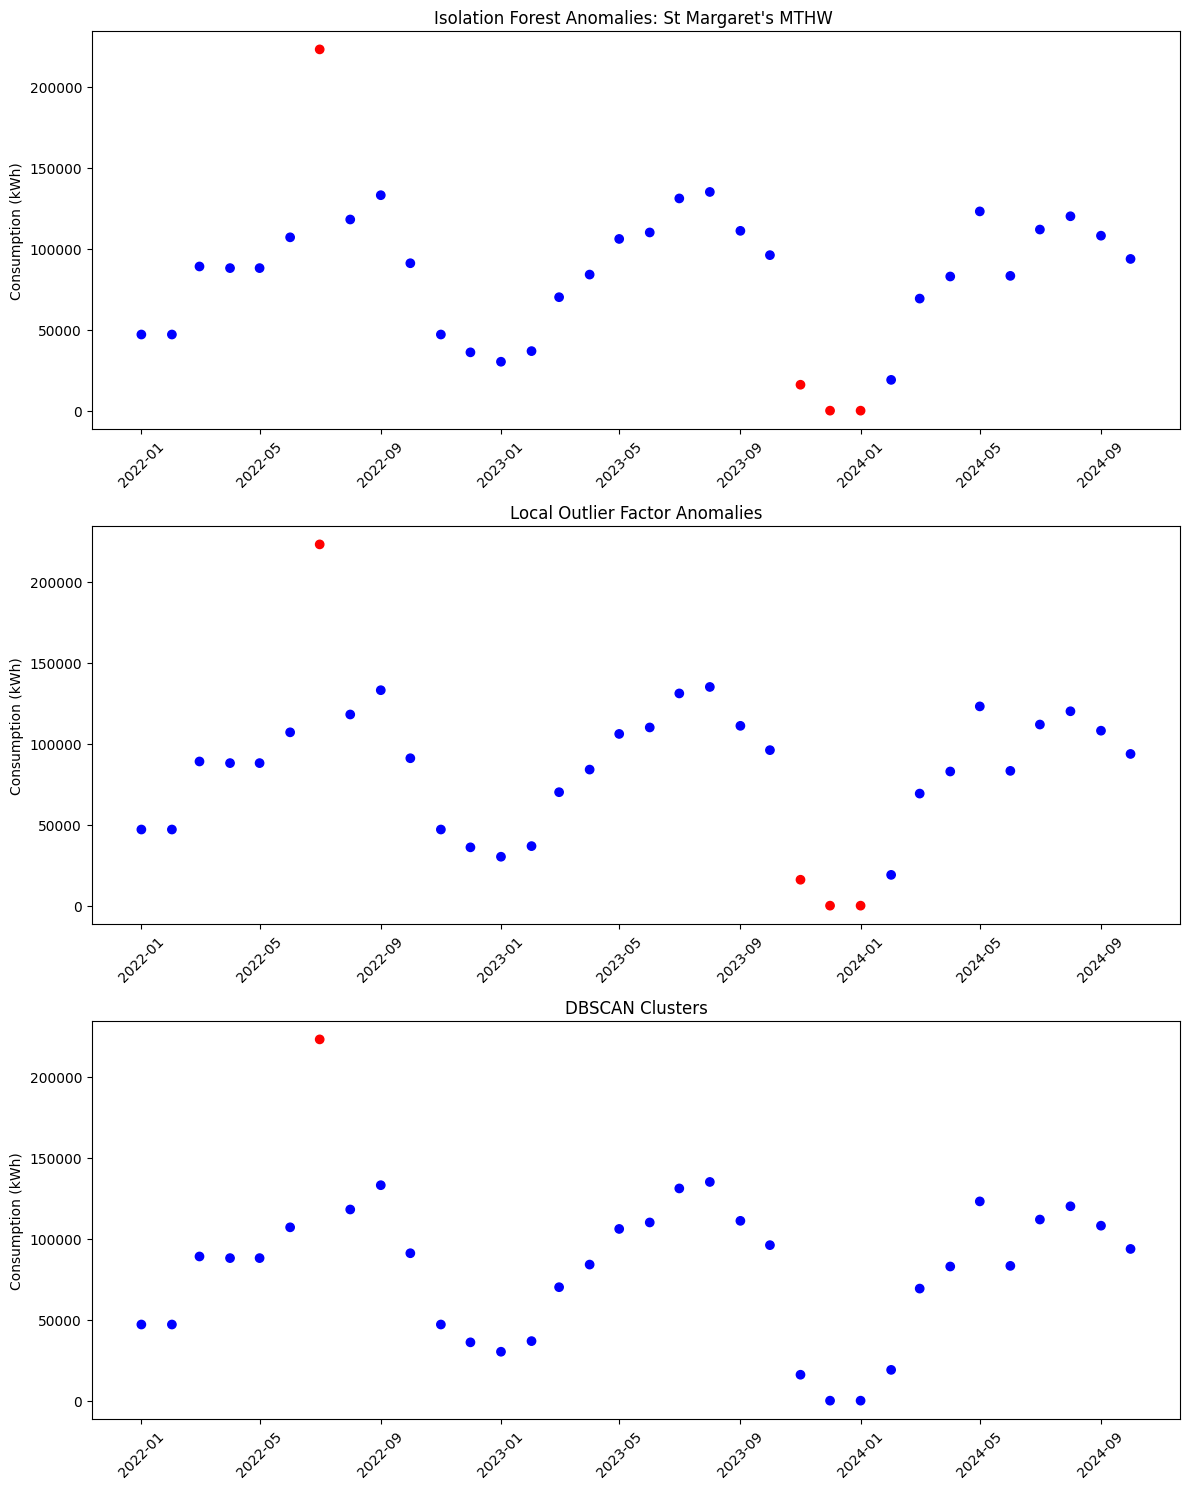


Anomaly Detection Summary for St Margaret's MTHW :
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 1 (2.9%)

Detailed Anomalies (Isolation Forest):
Date: 2022-07, Consumption: 223000.00 kWh
Date: 2023-11, Consumption: 16000.00 kWh
Date: 2023-12, Consumption: 0.00 kWh
Date: 2024-01, Consumption: 0.00 kWh

Analyzing G601, UniCol 


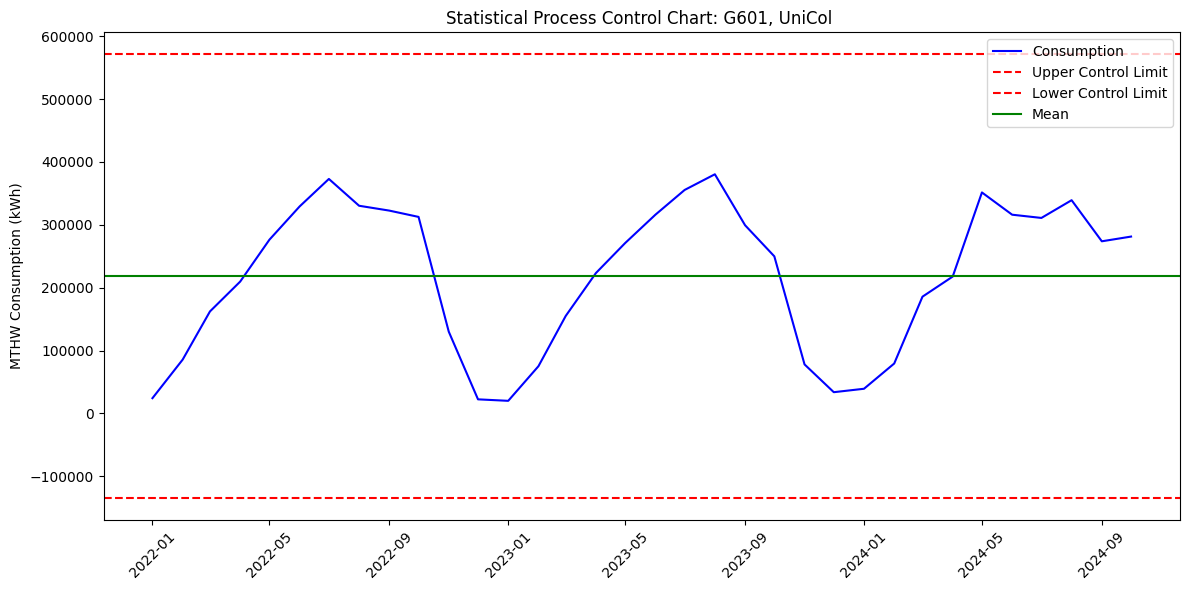

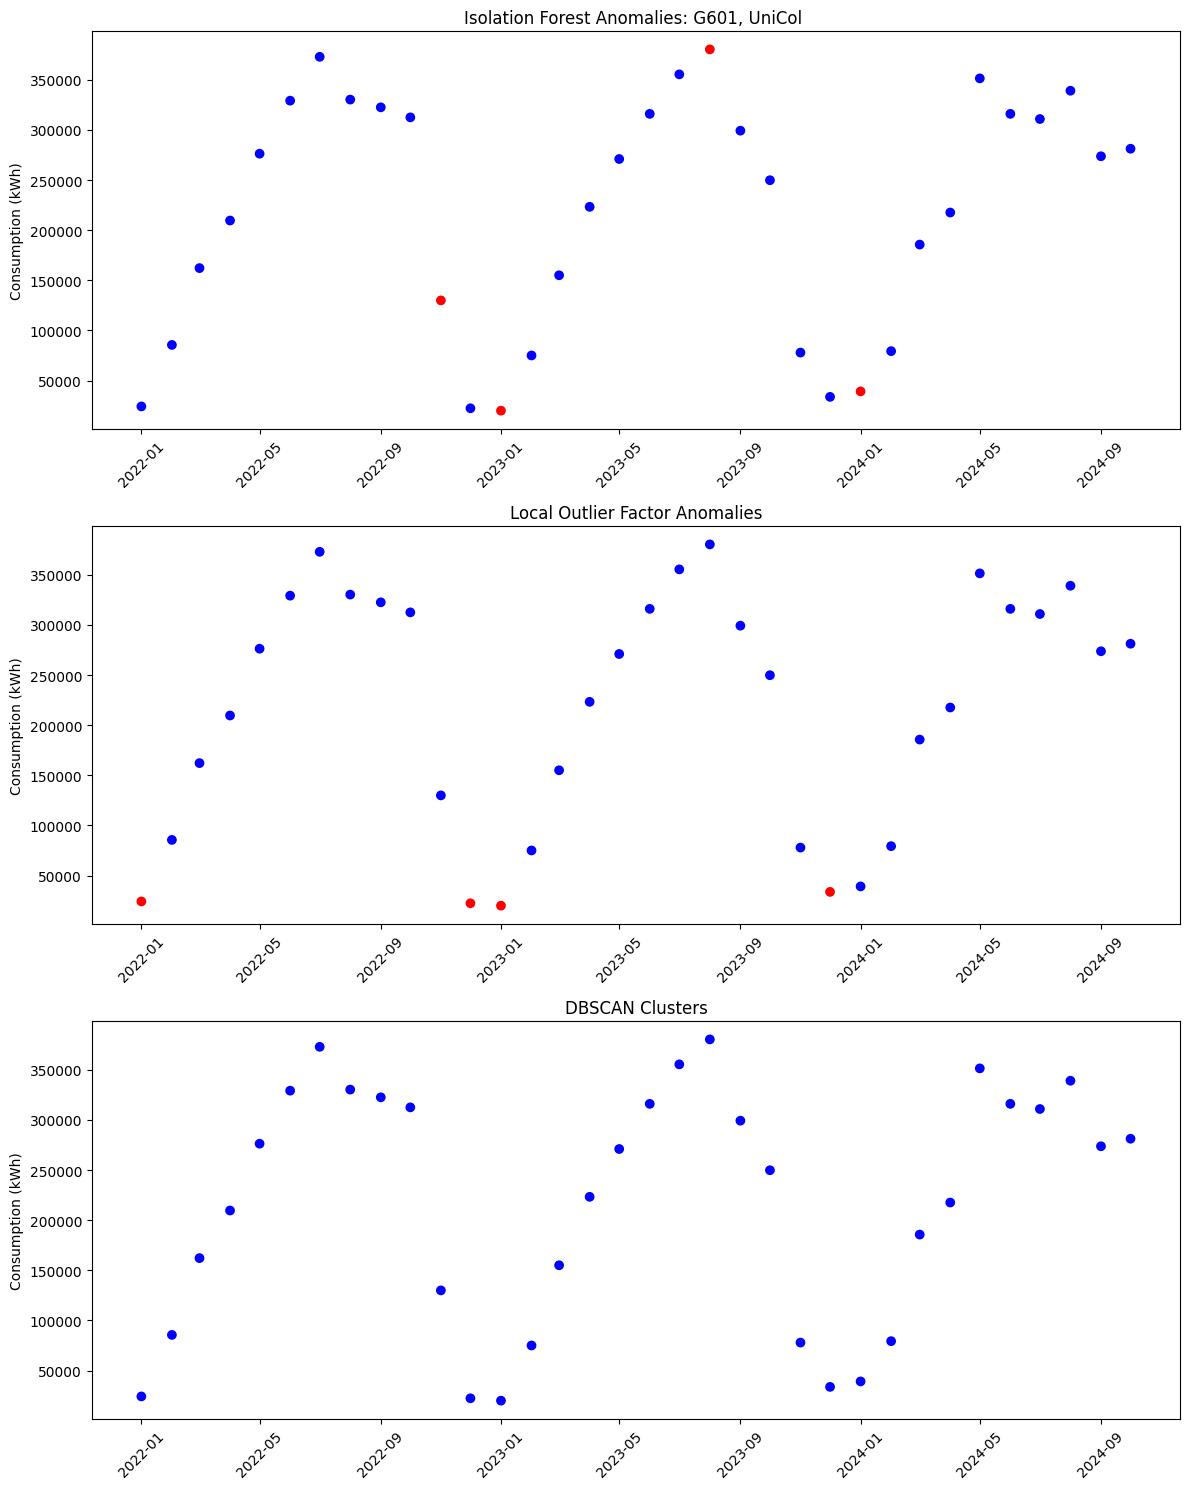


Anomaly Detection Summary for G601, UniCol :
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 0 (0.0%)

Detailed Anomalies (Isolation Forest):
Date: 2022-11, Consumption: 129948.00 kWh
Date: 2023-01, Consumption: 19916.00 kWh
Date: 2023-08, Consumption: 380432.00 kWh
Date: 2024-01, Consumption: 39114.00 kWh

Analyzing D402, Hayward College 


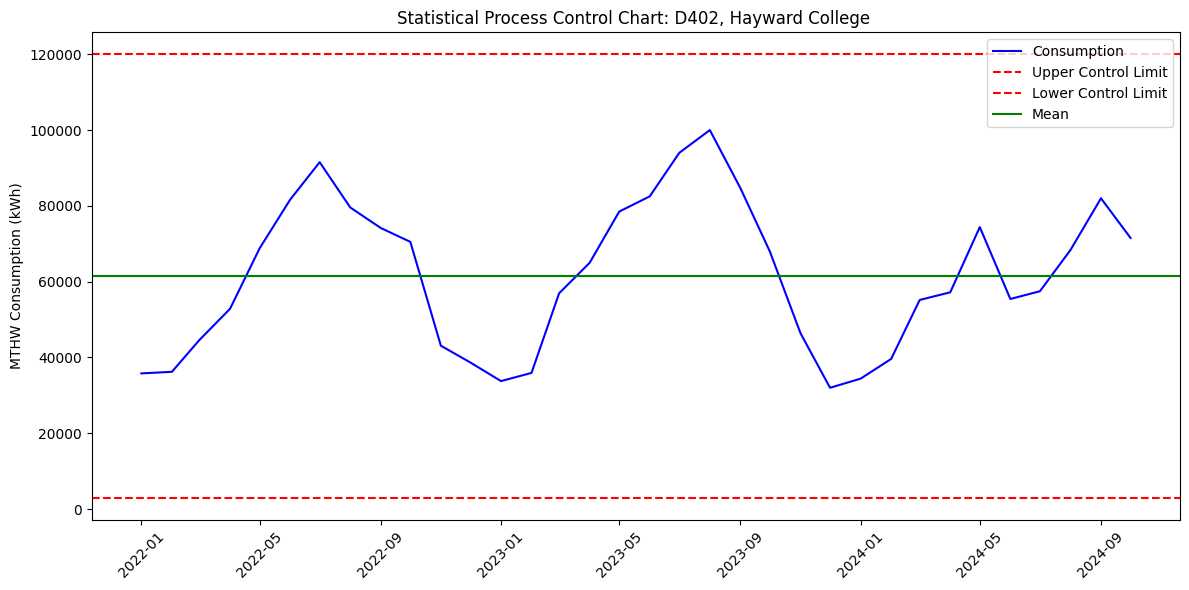

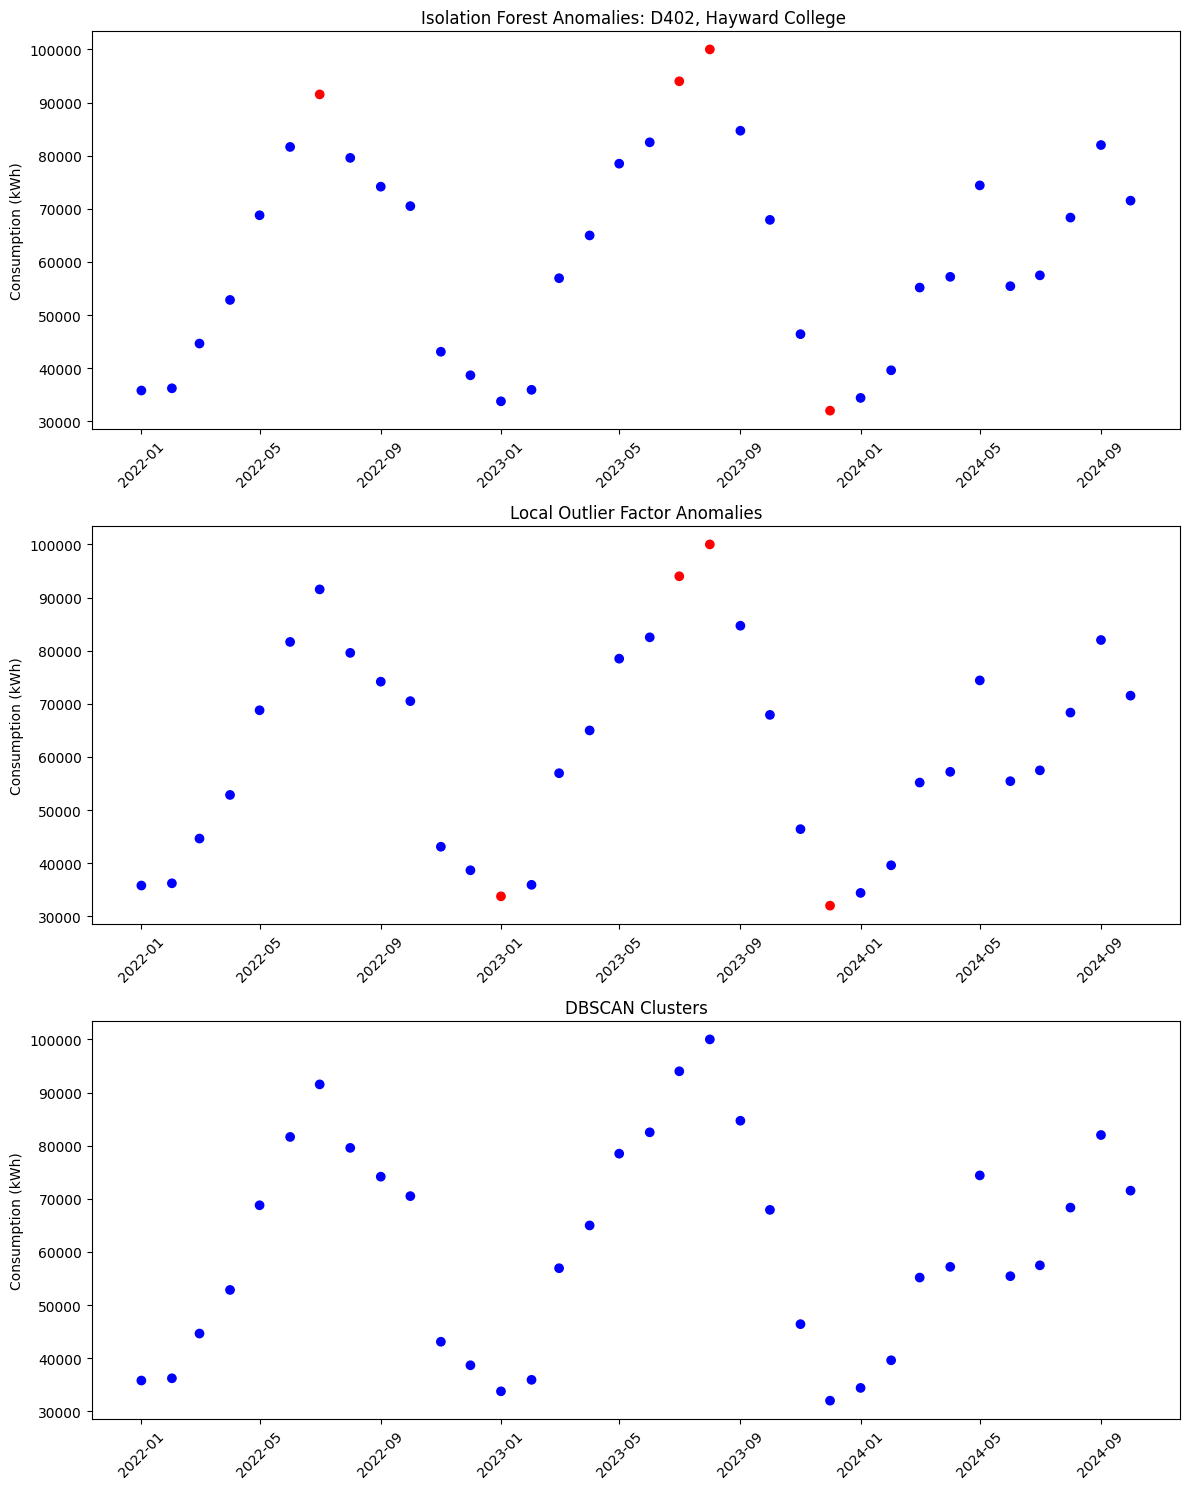


Anomaly Detection Summary for D402, Hayward College :
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 0 (0.0%)

Detailed Anomalies (Isolation Forest):
Date: 2022-07, Consumption: 91530.00 kWh
Date: 2023-07, Consumption: 94000.00 kWh
Date: 2023-08, Consumption: 100000.00 kWh
Date: 2023-12, Consumption: 32000.00 kWh

Analyzing F402, Union


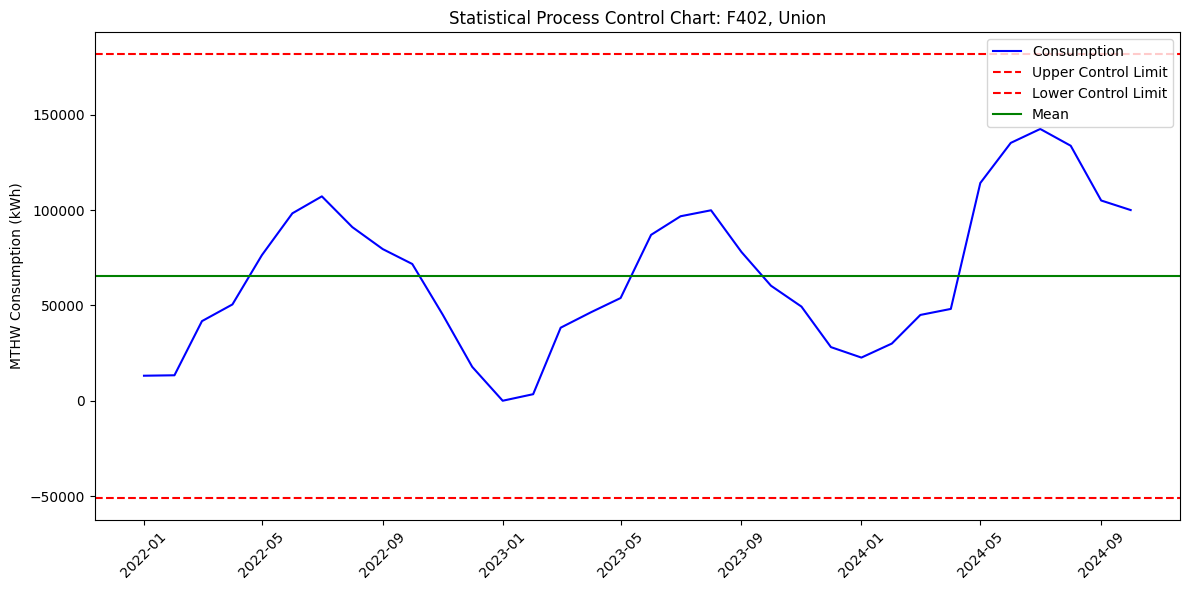

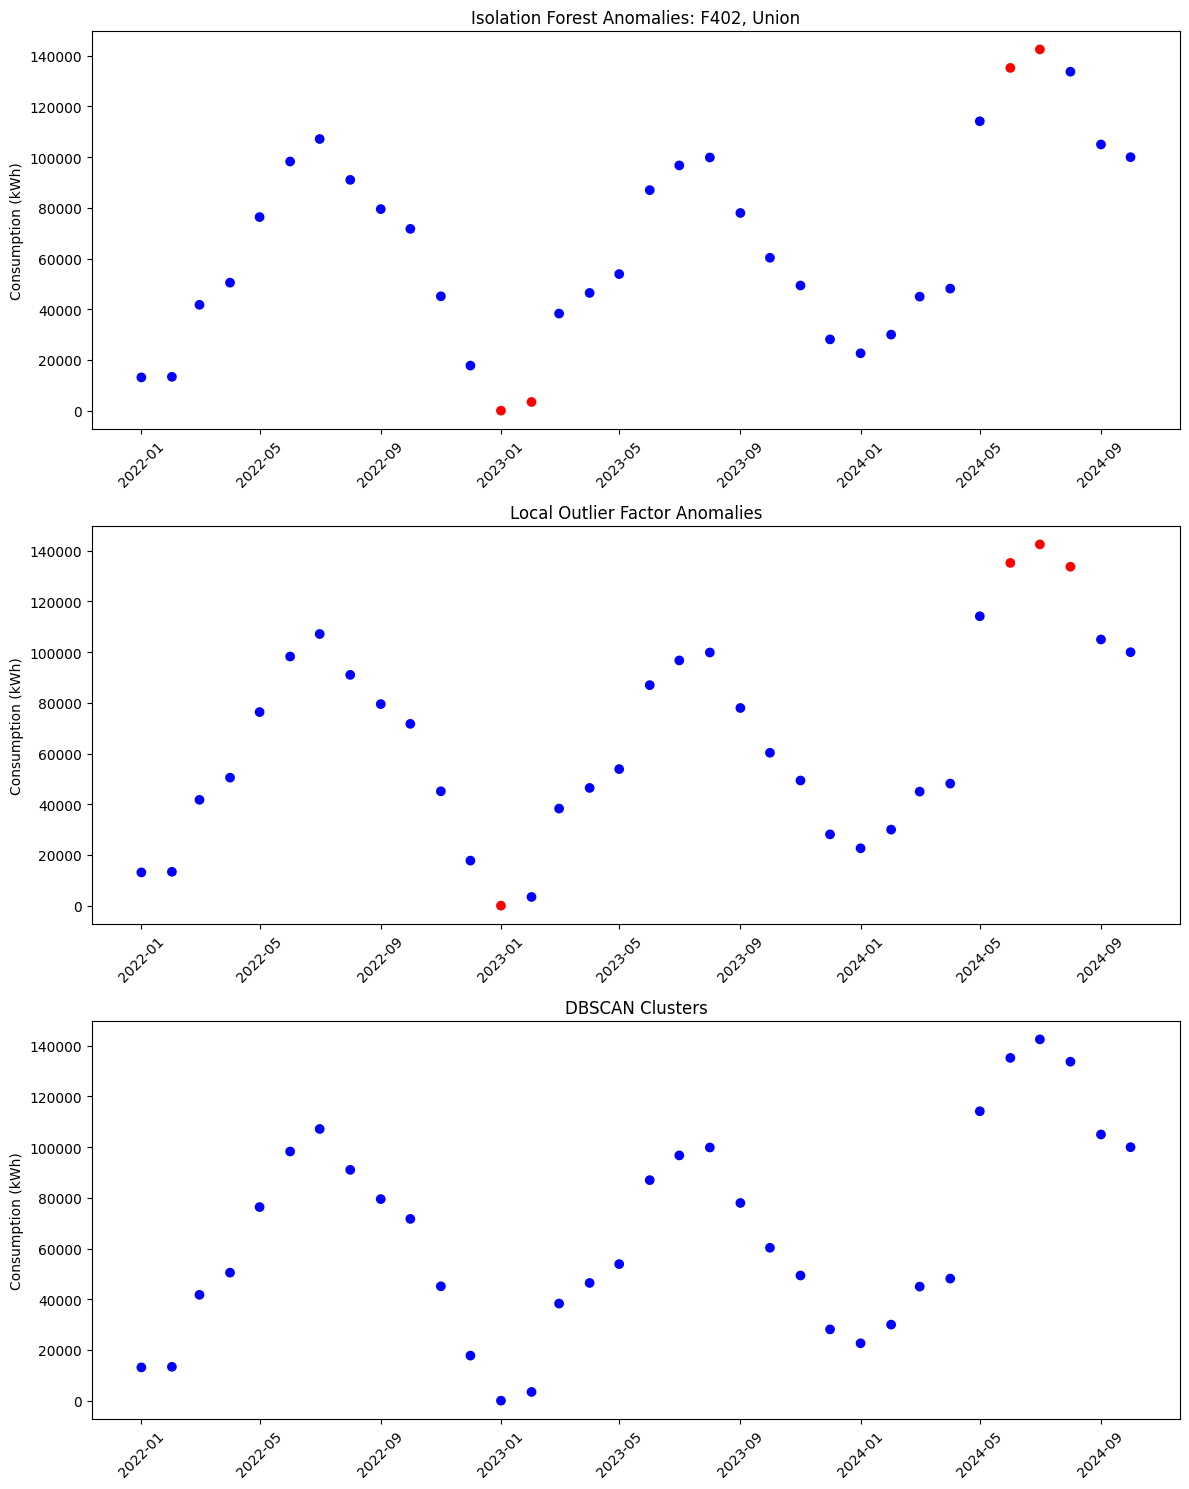


Anomaly Detection Summary for F402, Union:
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 0 (0.0%)

Detailed Anomalies (Isolation Forest):
Date: 2023-01, Consumption: 0.00 kWh
Date: 2023-02, Consumption: 3430.00 kWh
Date: 2024-06, Consumption: 135210.00 kWh
Date: 2024-07, Consumption: 142510.00 kWh

Analyzing F505, Richardson Total


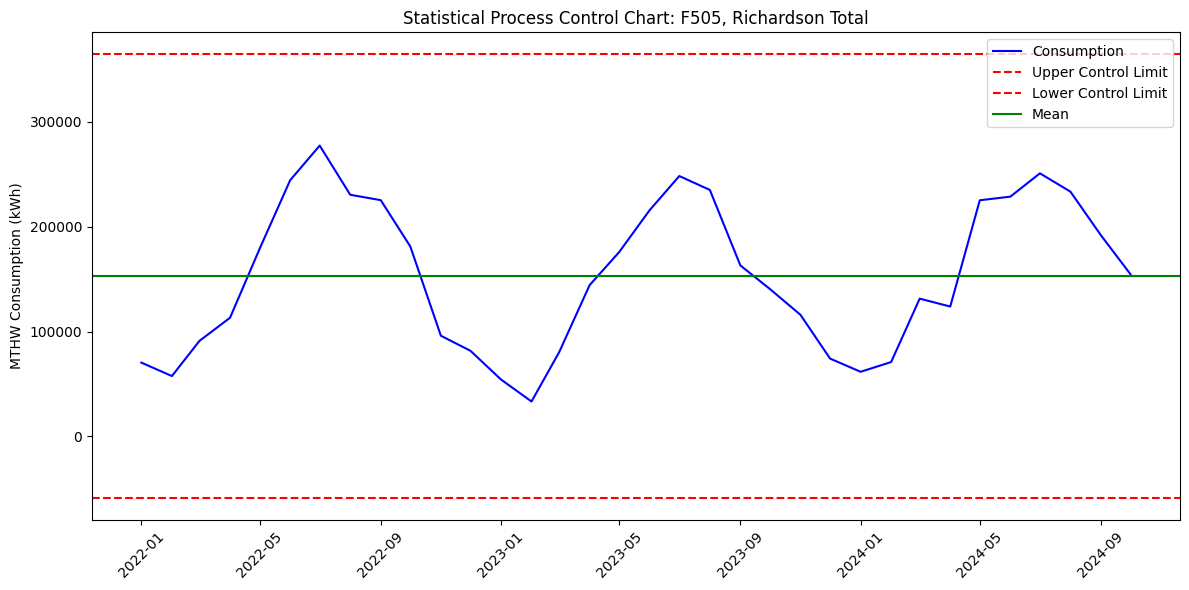

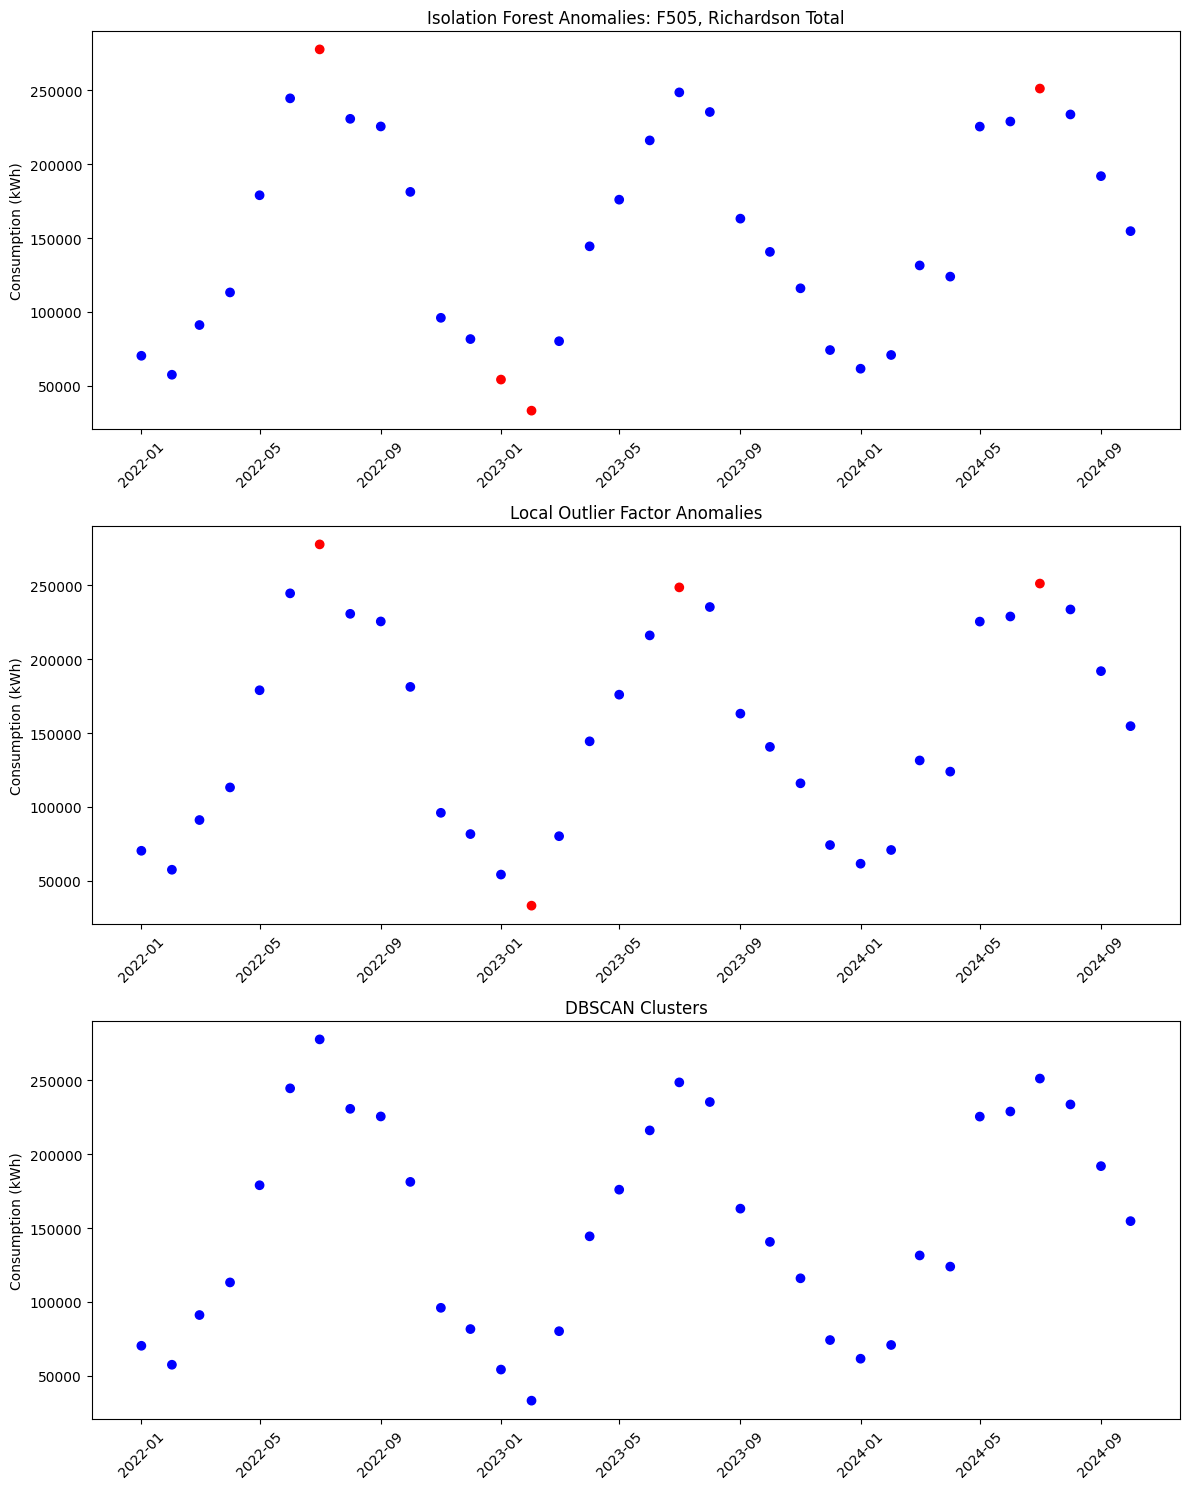


Anomaly Detection Summary for F505, Richardson Total:
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 0 (0.0%)

Detailed Anomalies (Isolation Forest):
Date: 2022-07, Consumption: 277480.00 kWh
Date: 2023-01, Consumption: 54320.00 kWh
Date: 2023-02, Consumption: 33310.00 kWh
Date: 2024-07, Consumption: 251010.00 kWh

Analyzing F518, Arts Building 


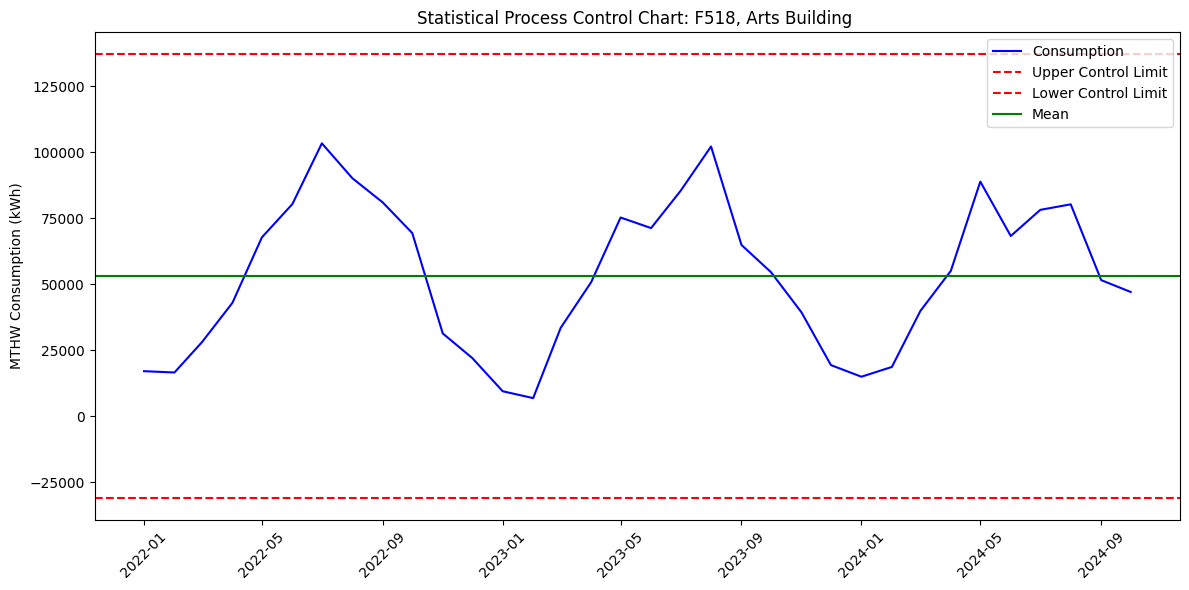

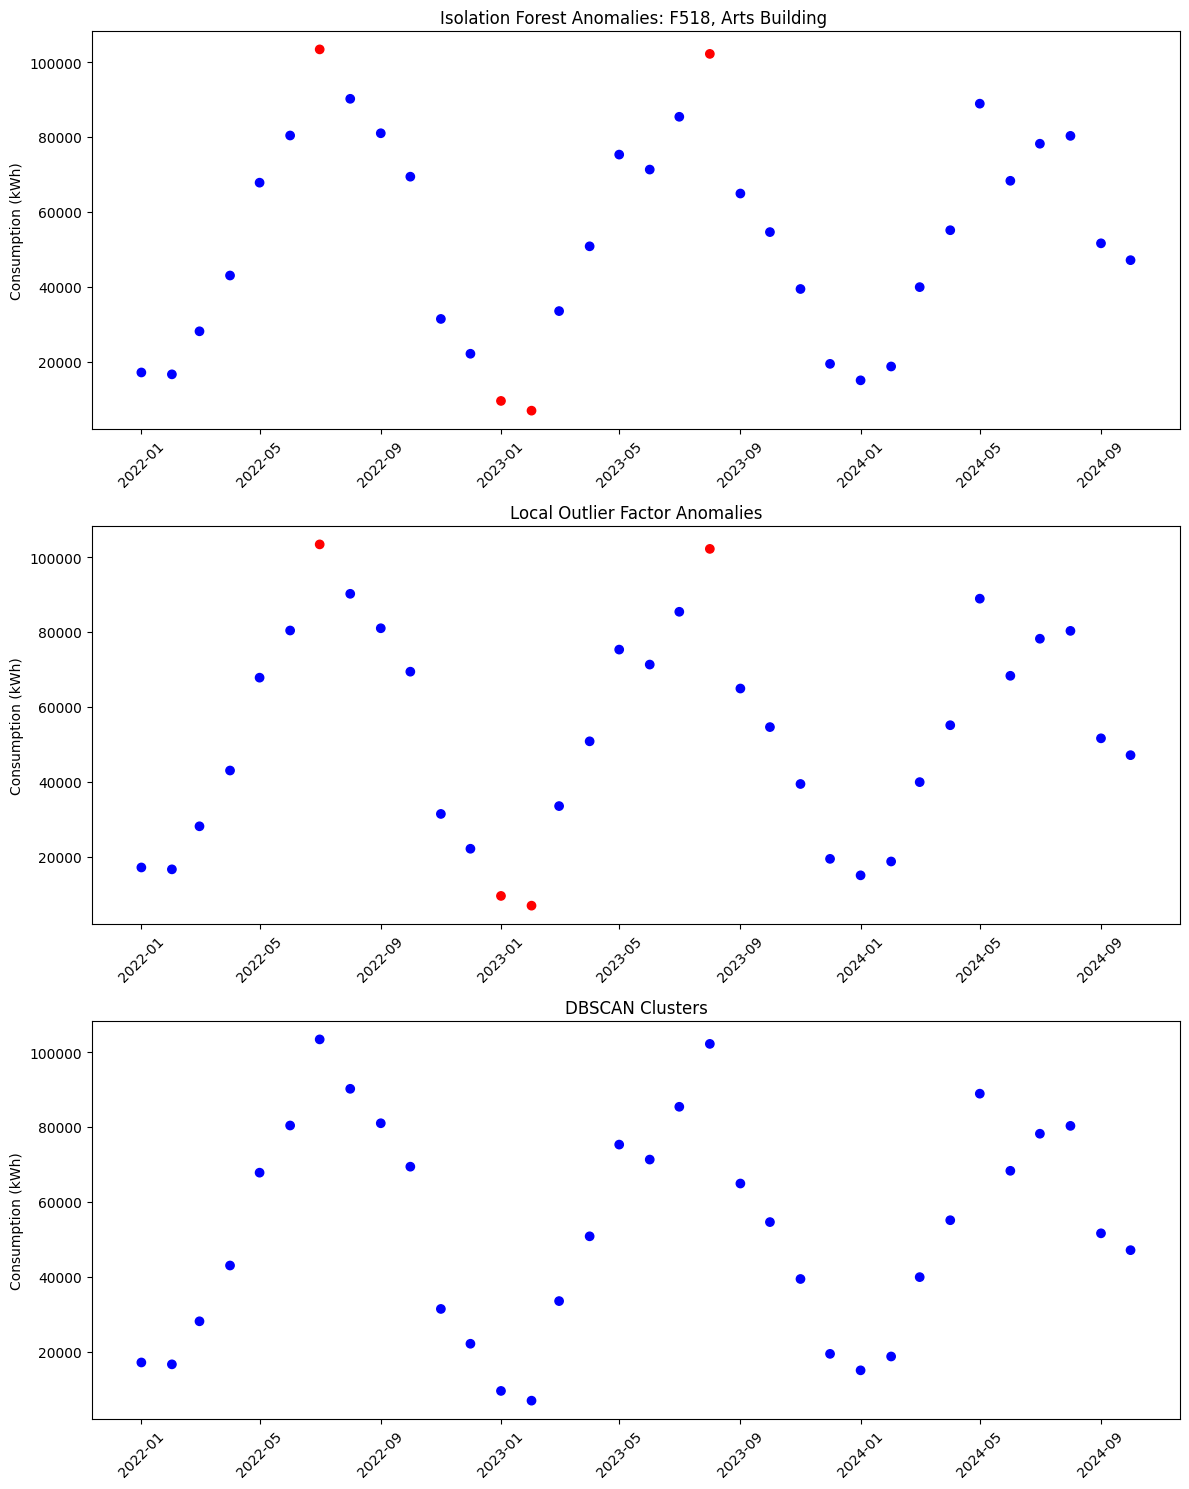


Anomaly Detection Summary for F518, Arts Building :
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 0 (0.0%)

Detailed Anomalies (Isolation Forest):
Date: 2022-07, Consumption: 103400.00 kWh
Date: 2023-01, Consumption: 9500.00 kWh
Date: 2023-02, Consumption: 6900.00 kWh
Date: 2023-08, Consumption: 102200.00 kWh

Analyzing G401 Mellor Lab total


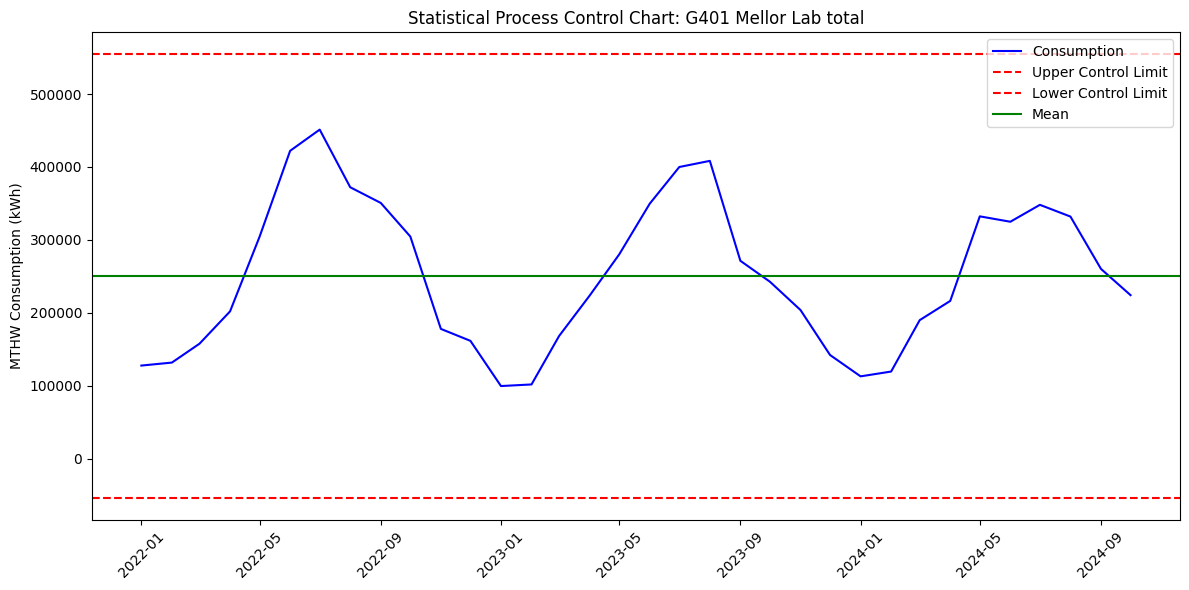

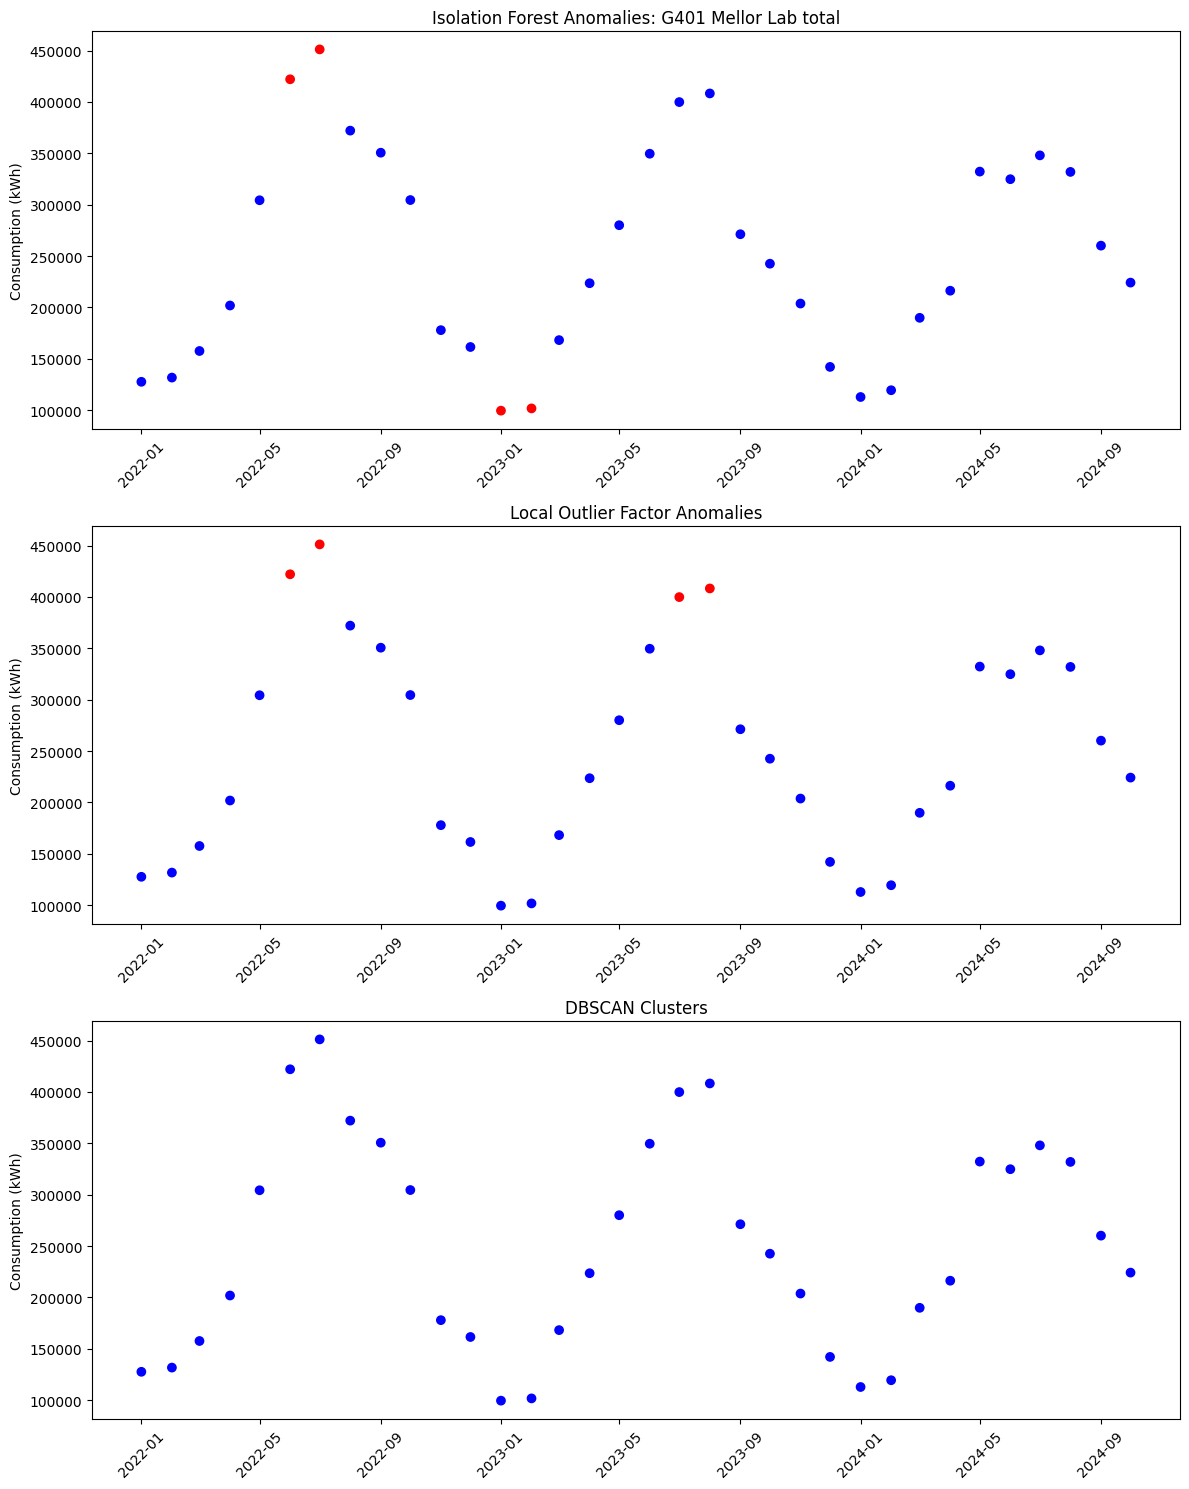


Anomaly Detection Summary for G401 Mellor Lab total:
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 0 (0.0%)

Detailed Anomalies (Isolation Forest):
Date: 2022-06, Consumption: 422100.00 kWh
Date: 2022-07, Consumption: 451200.00 kWh
Date: 2023-01, Consumption: 99400.00 kWh
Date: 2023-02, Consumption: 101599.80 kWh

Analyzing G404, Microbiology 


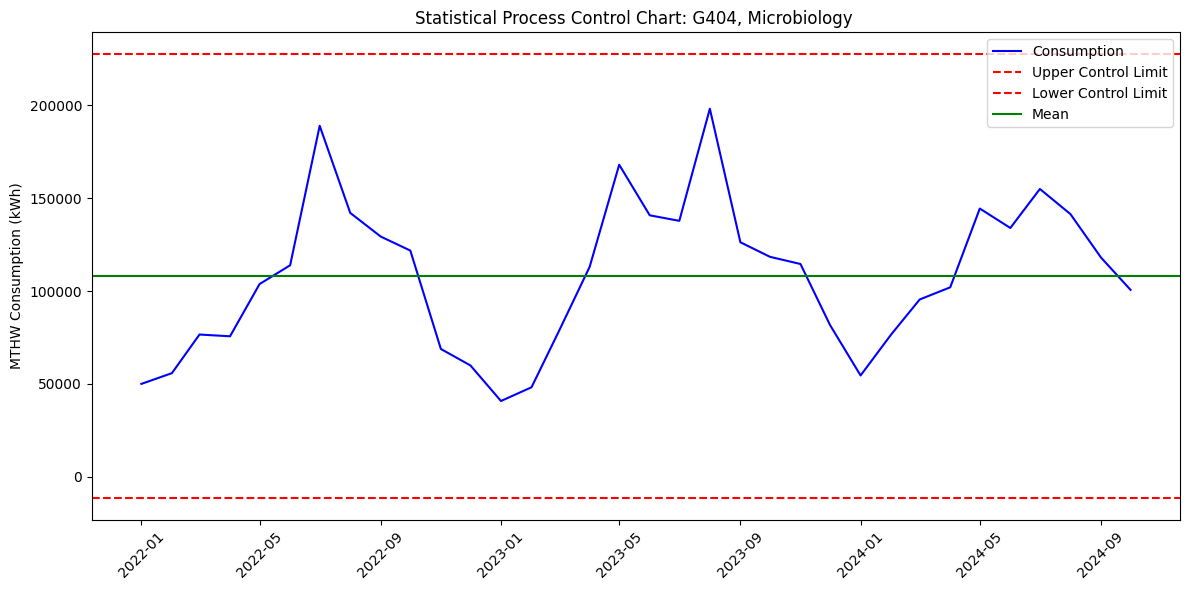

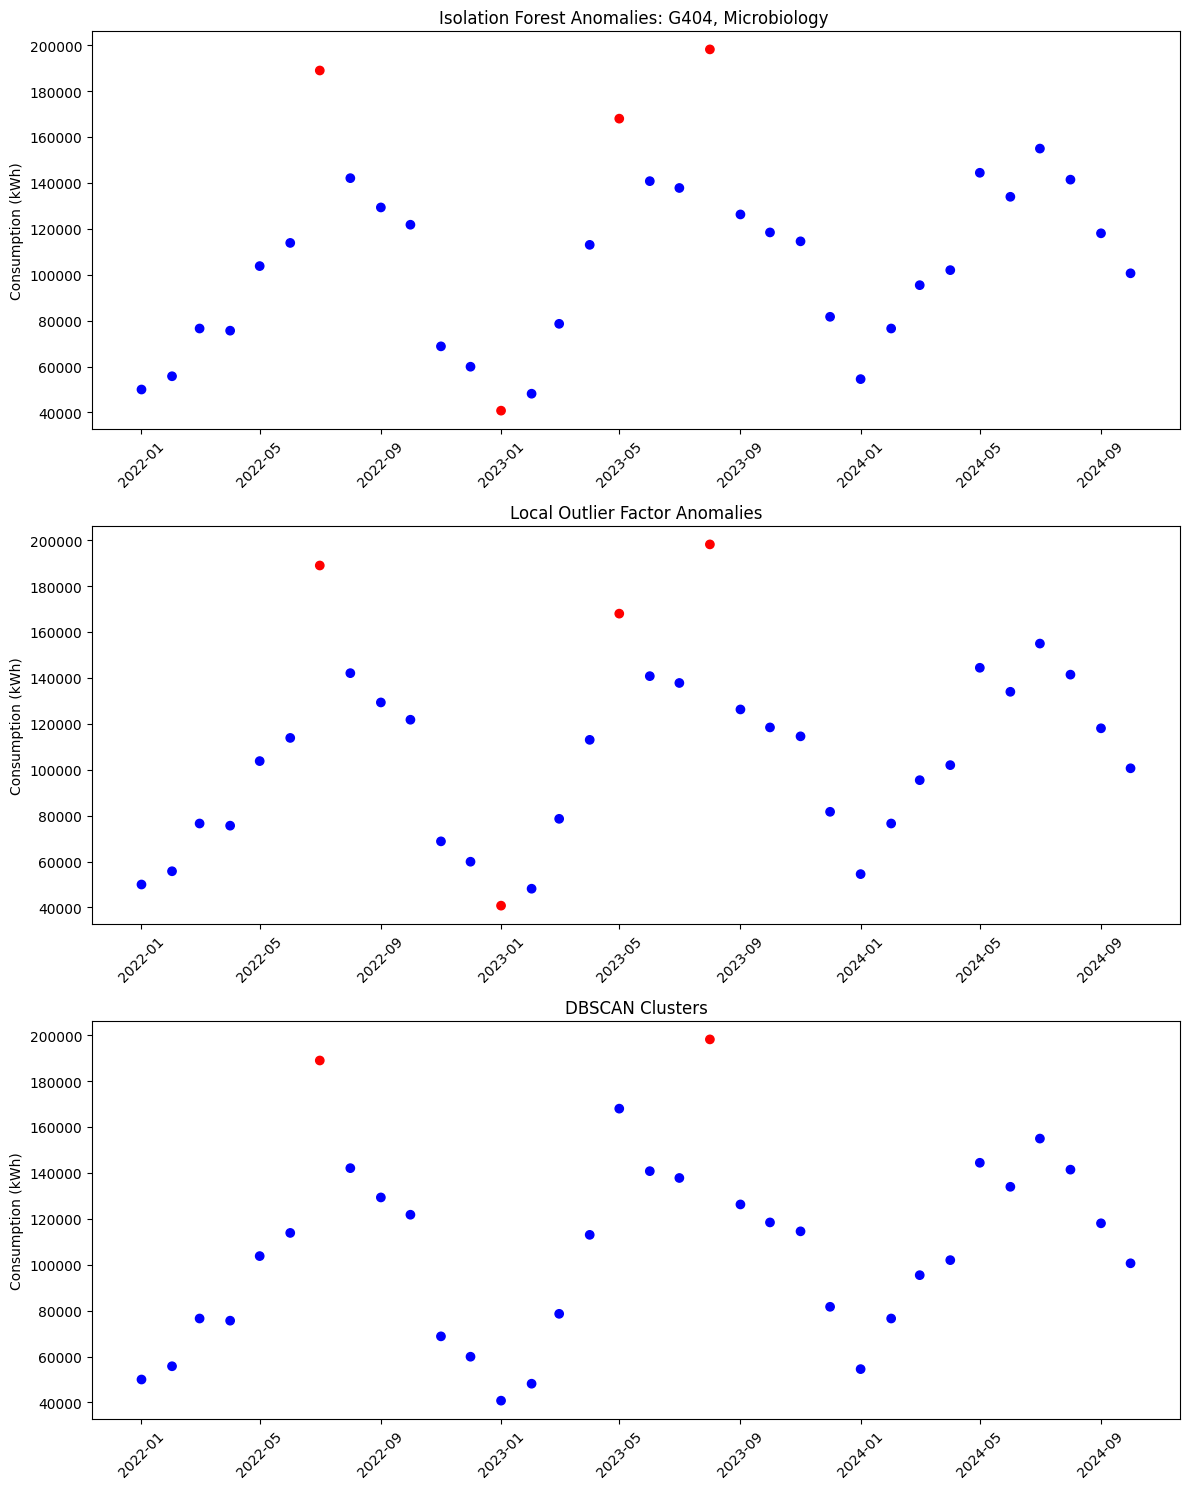


Anomaly Detection Summary for G404, Microbiology :
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 2 (5.9%)

Detailed Anomalies (Isolation Forest):
Date: 2022-07, Consumption: 188950.00 kWh
Date: 2023-01, Consumption: 40790.00 kWh
Date: 2023-05, Consumption: 167980.00 kWh
Date: 2023-08, Consumption: 198140.00 kWh

Analyzing G413, Science 2 total


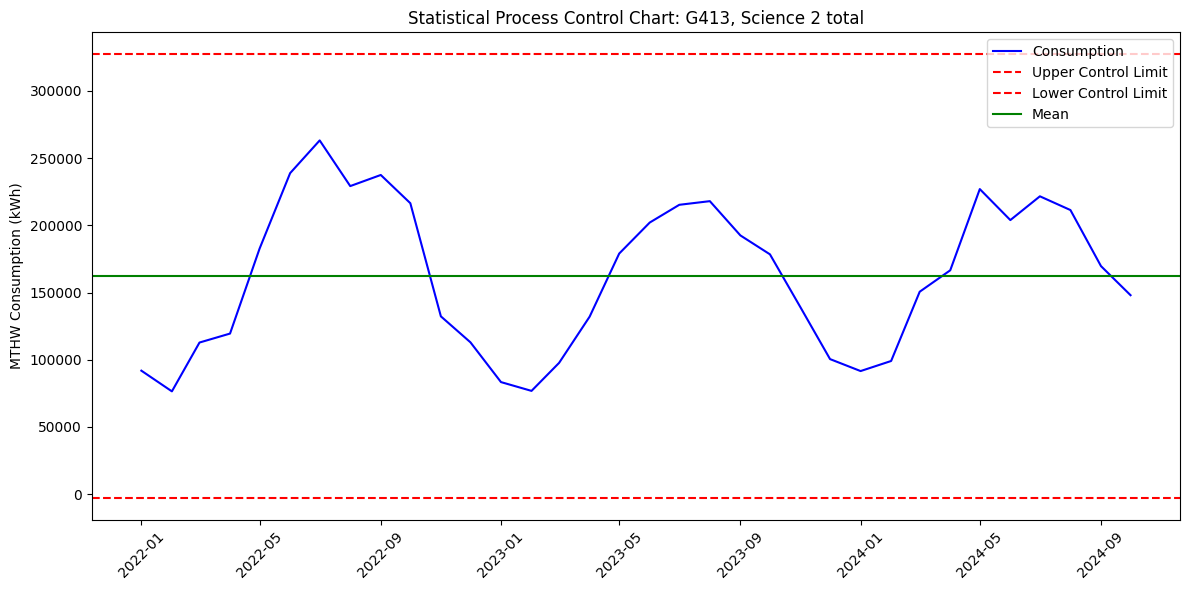

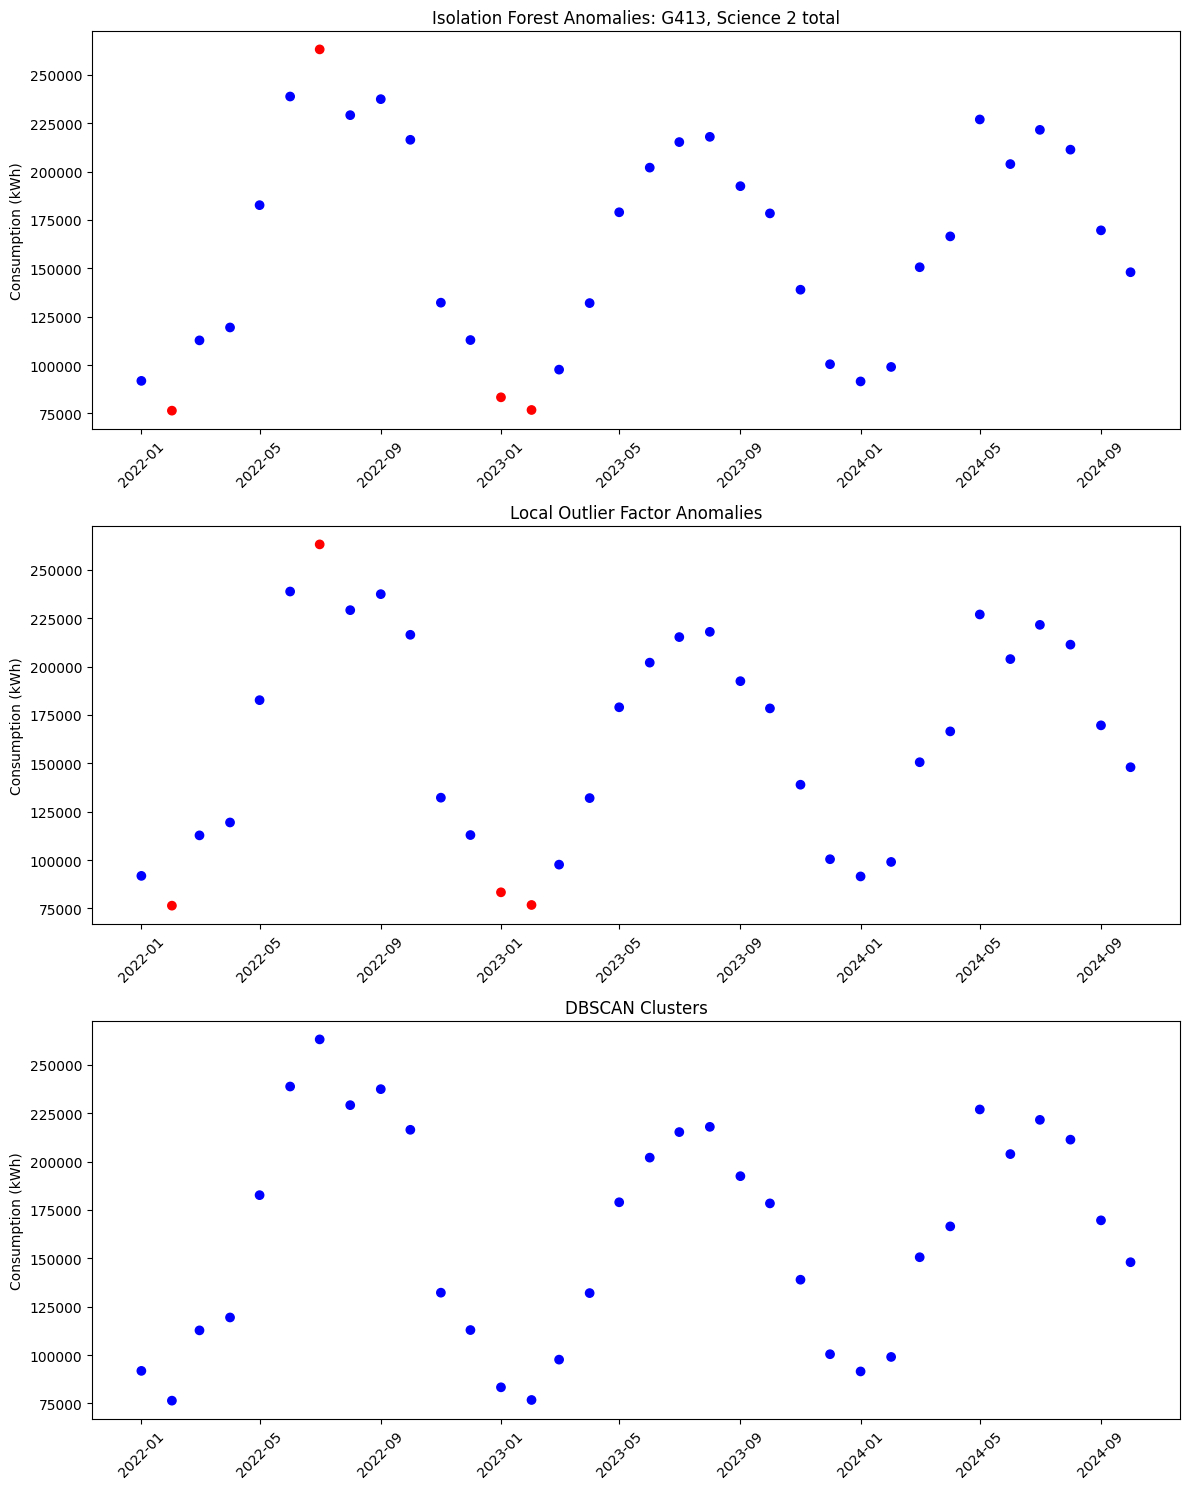


Anomaly Detection Summary for G413, Science 2 total:
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 0 (0.0%)

Detailed Anomalies (Isolation Forest):
Date: 2022-02, Consumption: 76460.00 kWh
Date: 2022-07, Consumption: 263150.00 kWh
Date: 2023-01, Consumption: 83360.00 kWh
Date: 2023-02, Consumption: 76809.99 kWh

Analyzing G405, Science 3 


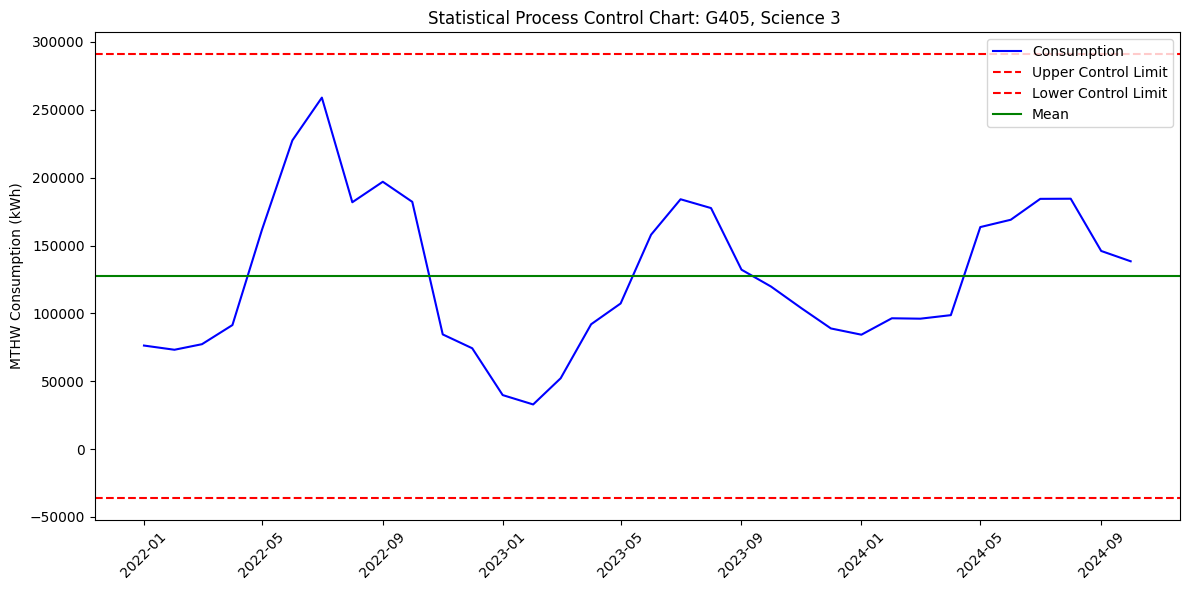

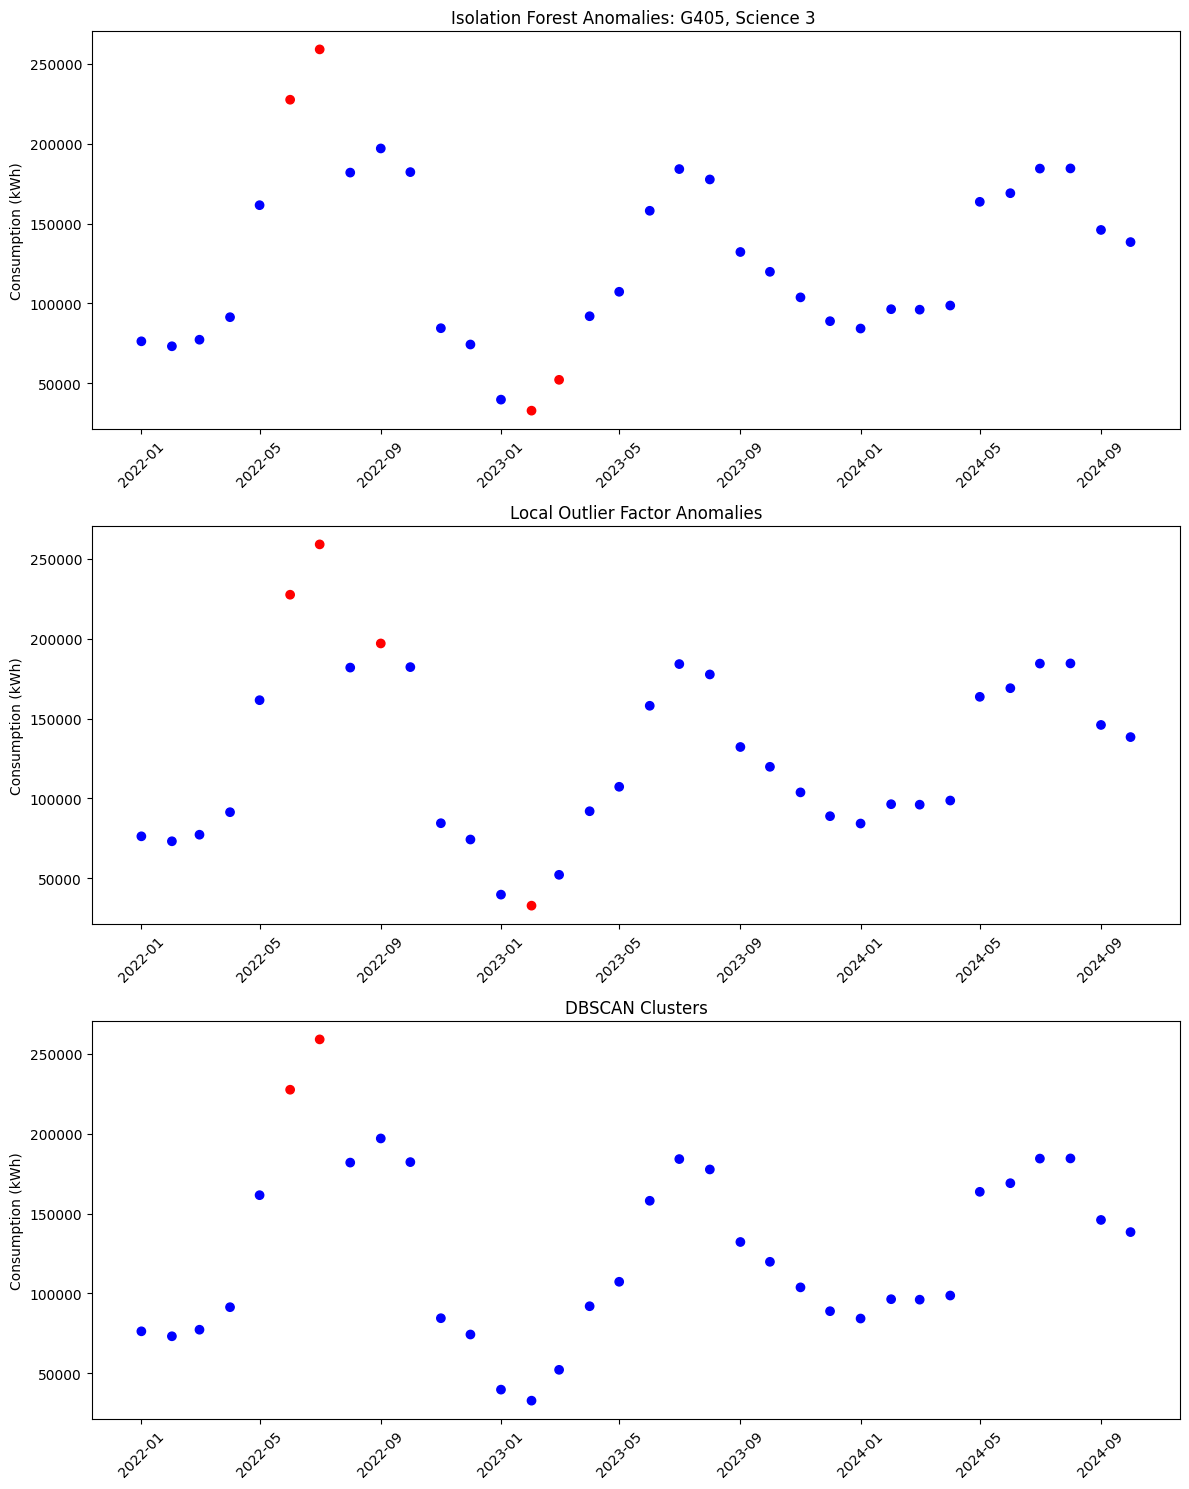


Anomaly Detection Summary for G405, Science 3 :
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 2 (5.9%)

Detailed Anomalies (Isolation Forest):
Date: 2022-06, Consumption: 227500.00 kWh
Date: 2022-07, Consumption: 259000.00 kWh
Date: 2023-02, Consumption: 32900.00 kWh
Date: 2023-03, Consumption: 52200.00 kWh

Analyzing F419, ISB 


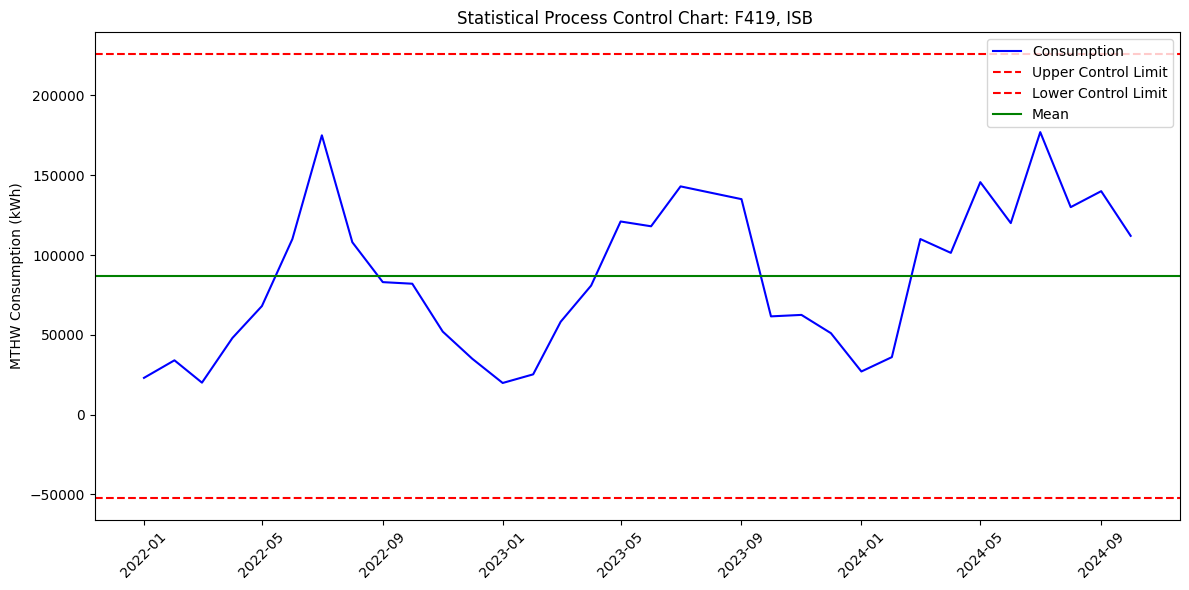

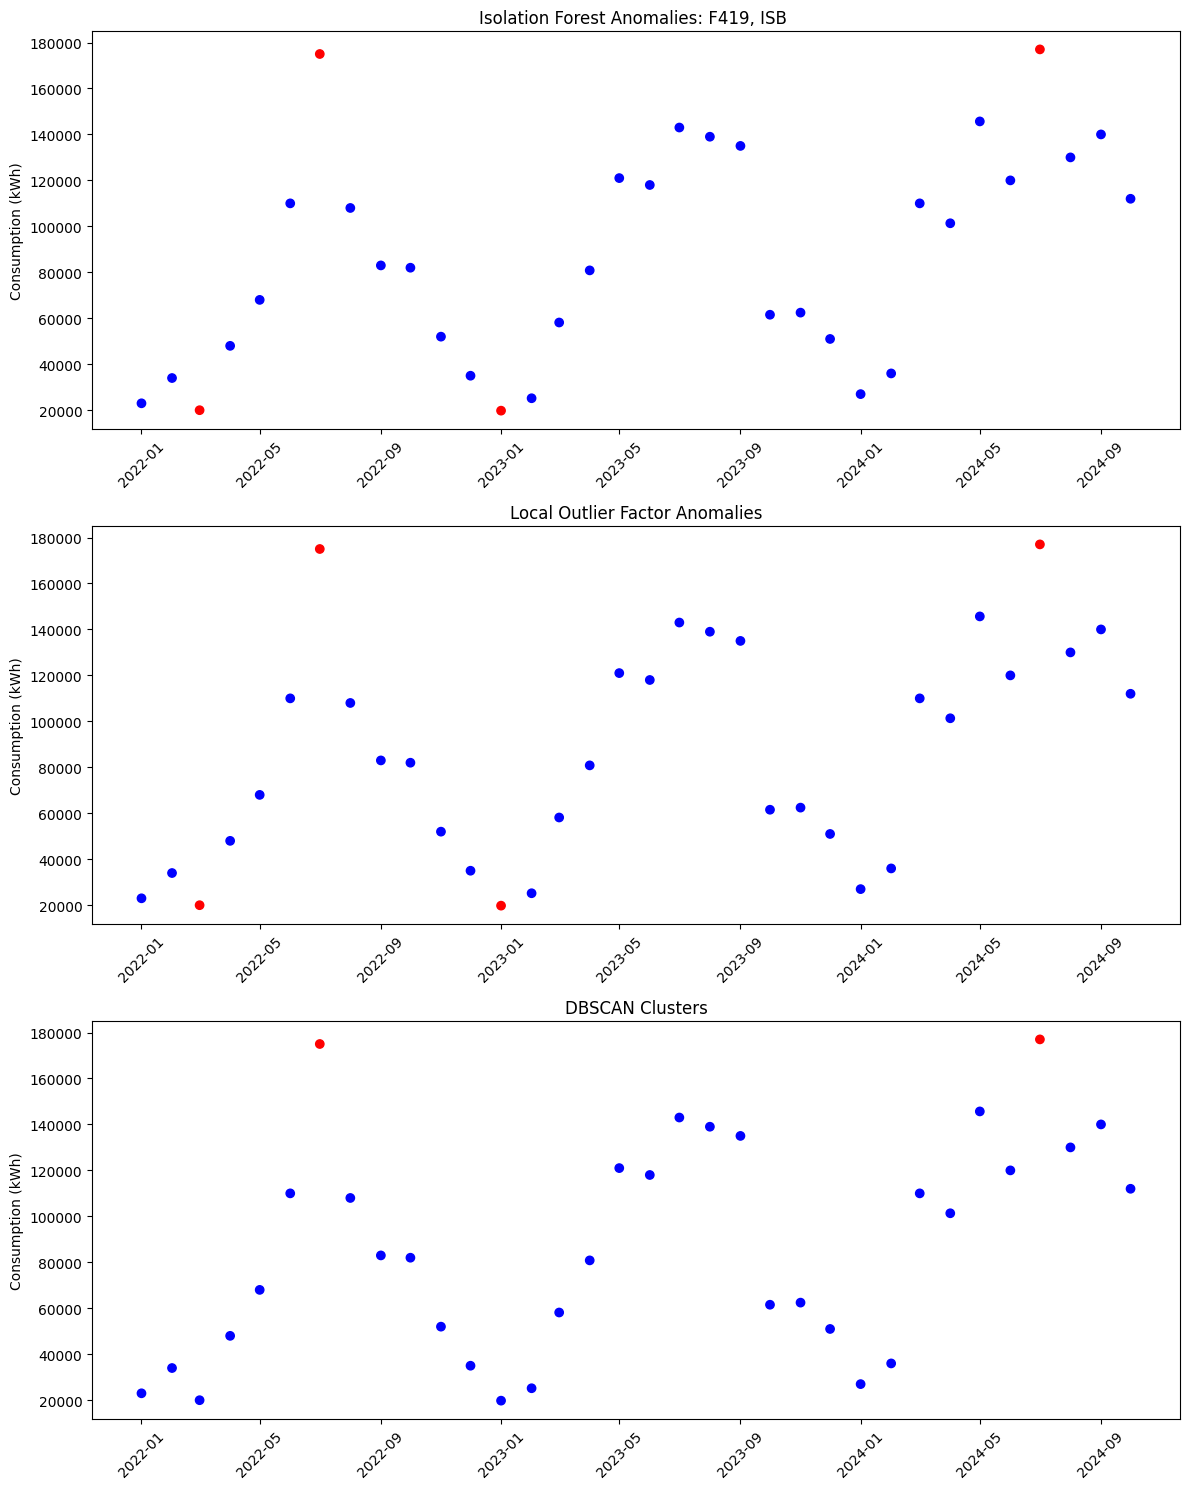


Anomaly Detection Summary for F419, ISB :
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 2 (5.9%)

Detailed Anomalies (Isolation Forest):
Date: 2022-03, Consumption: 20000.00 kWh
Date: 2022-07, Consumption: 175000.00 kWh
Date: 2023-01, Consumption: 19800.00 kWh
Date: 2024-07, Consumption: 177000.00 kWh

Analyzing E201 Dental Steam Total


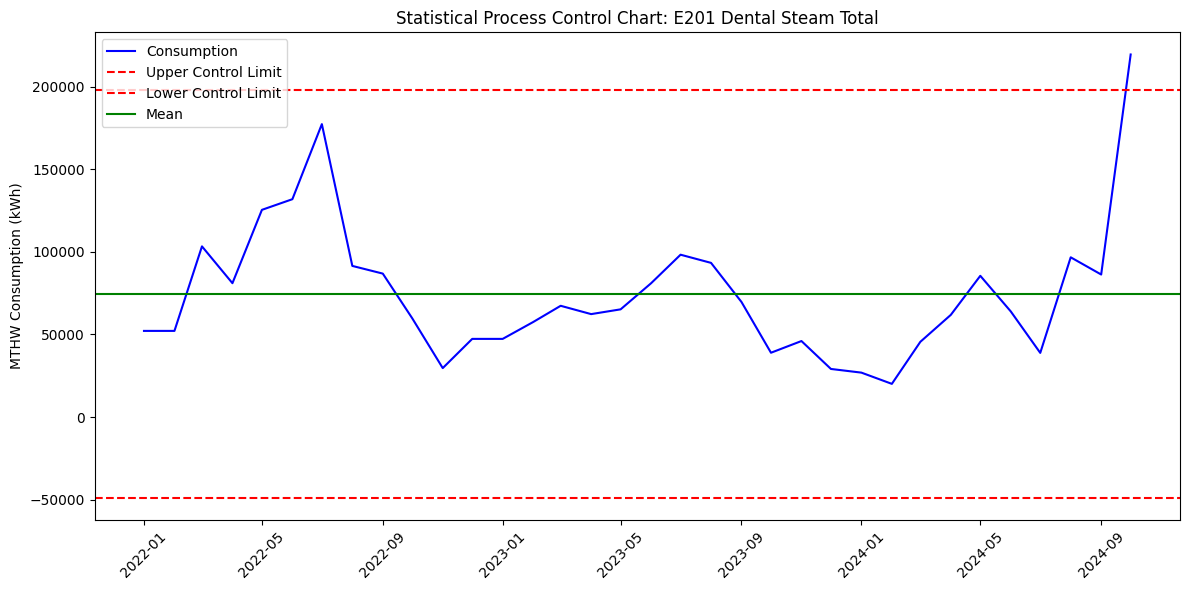

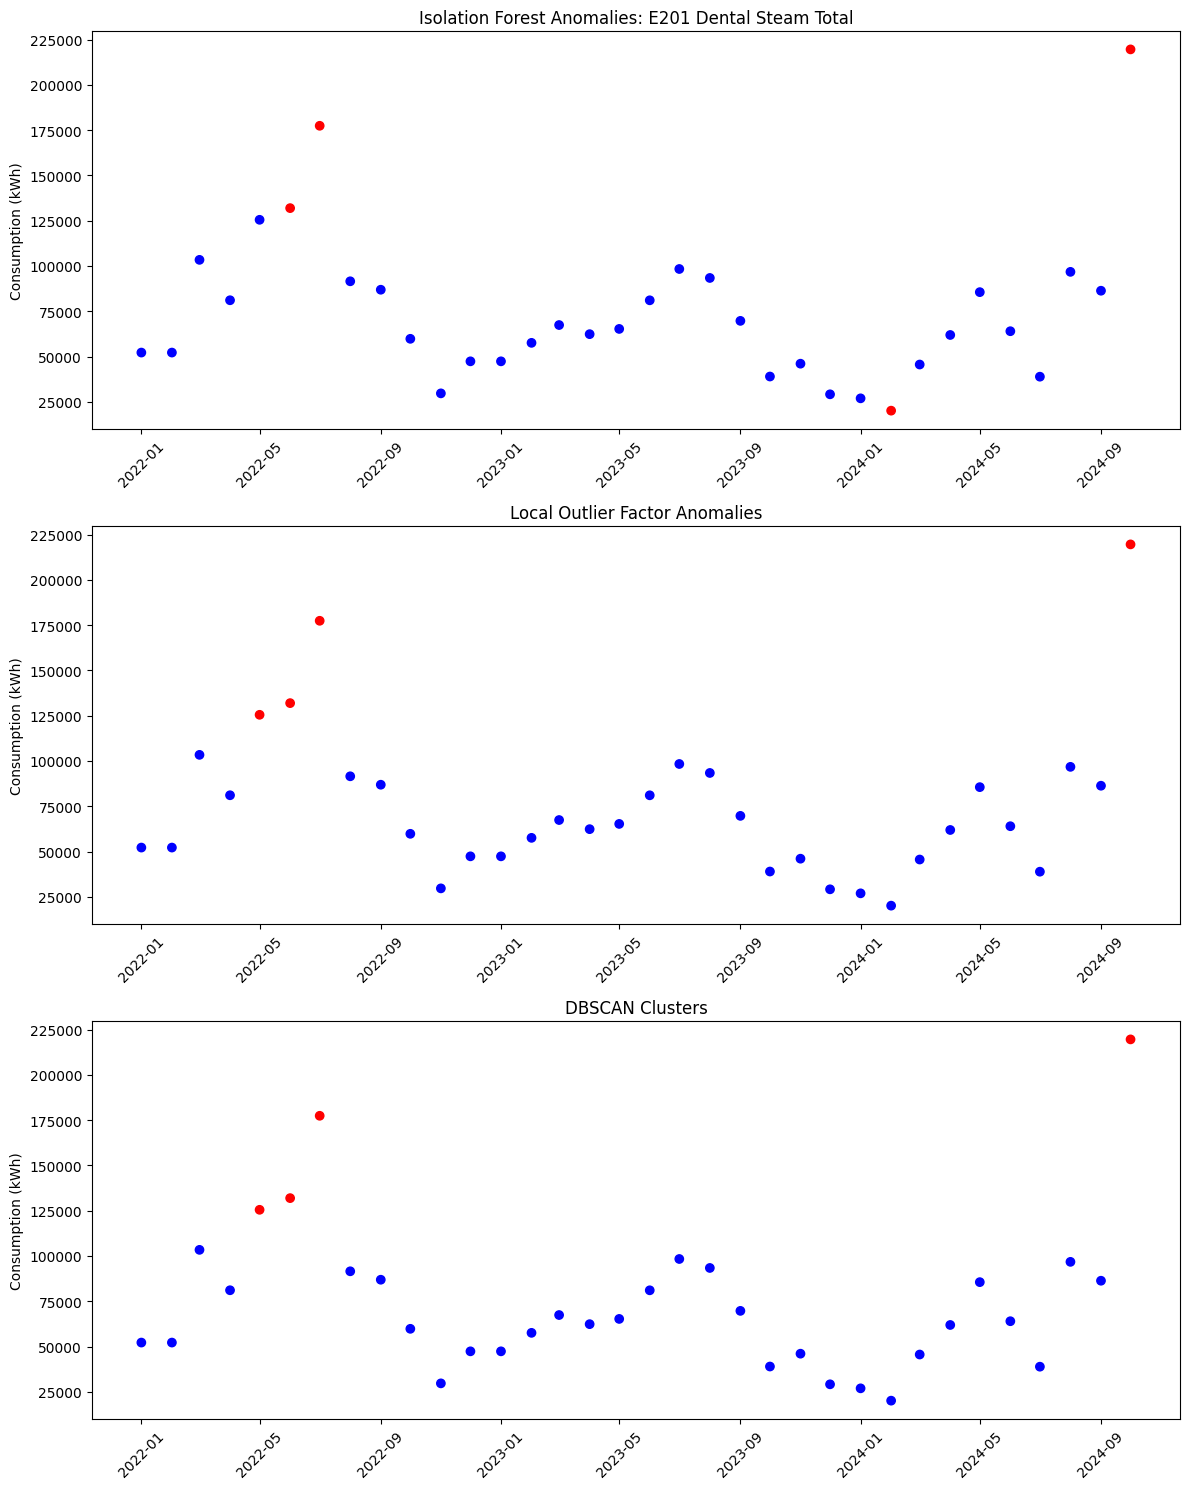


Anomaly Detection Summary for E201 Dental Steam Total:
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 4 (11.8%)

Detailed Anomalies (Isolation Forest):
Date: 2022-06, Consumption: 131936.00 kWh
Date: 2022-07, Consumption: 177402.00 kWh
Date: 2024-02, Consumption: 20095.00 kWh
Date: 2024-10, Consumption: 219582.00 kWh


In [122]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

def perform_mthw_anomaly_detection(data, building_name):
    """Perform anomaly detection for a specific building's MTHW consumption"""
    
    # Get building data and convert to time series
    building_data = data[data['meter_location'] == building_name].copy()
    consumption_values = building_data['consumption'].values.reshape(-1, 1)
    dates = pd.to_datetime(building_data['month'].apply(lambda x: '01-' + x.replace('_', '-')))
    
    # 1. Statistical Process Control (3-sigma)
    mean = np.mean(consumption_values)
    std = np.std(consumption_values)
    upper_limit = mean + 3*std
    lower_limit = mean - 3*std
    
    plt.figure(figsize=(12, 6))
    plt.plot(dates, consumption_values, 'b-', label='Consumption')
    plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Control Limit')
    plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Control Limit')
    plt.axhline(y=mean, color='g', linestyle='-', label='Mean')
    plt.title(f'Statistical Process Control Chart: {building_name}')
    plt.xticks(rotation=45)
    plt.ylabel('MTHW Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 2. Multiple Anomaly Detection Methods
    # Standardize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(consumption_values)
    
    # Apply detection methods
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_forest_labels = iso_forest.fit_predict(scaled_data)
    
    lof = LocalOutlierFactor(contamination=0.1)
    lof_labels = lof.fit_predict(scaled_data)
    
    dbscan = DBSCAN(eps=0.5, min_samples=3)
    dbscan_labels = dbscan.fit_predict(scaled_data)
    
    # Plot results
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

    # Isolation Forest
    colors = ['blue' if label == 1 else 'red' for label in iso_forest_labels]
    ax1.scatter(dates, consumption_values, c=colors)
    ax1.set_title(f'Isolation Forest Anomalies: {building_name}')
    ax1.set_ylabel('Consumption (kWh)')
    ax1.tick_params(axis='x', rotation=45)

    # LOF
    colors = ['blue' if label == 1 else 'red' for label in lof_labels]
    ax2.scatter(dates, consumption_values, c=colors)
    ax2.set_title('Local Outlier Factor Anomalies')
    ax2.set_ylabel('Consumption (kWh)')
    ax2.tick_params(axis='x', rotation=45)

    # DBSCAN
    colors = ['blue' if label != -1 else 'red' for label in dbscan_labels]
    ax3.scatter(dates, consumption_values, c=colors)
    ax3.set_title('DBSCAN Clusters')
    ax3.set_ylabel('Consumption (kWh)')
    ax3.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nAnomaly Detection Summary for {building_name}:")
    print(f"Total observations: {len(consumption_values)}")
    print(f"Isolation Forest anomalies: {sum(iso_forest_labels == -1)} ({sum(iso_forest_labels == -1)/len(iso_forest_labels)*100:.1f}%)")
    print(f"LOF anomalies: {sum(lof_labels == -1)} ({sum(lof_labels == -1)/len(lof_labels)*100:.1f}%)")
    print(f"DBSCAN outliers: {sum(dbscan_labels == -1)} ({sum(dbscan_labels == -1)/len(dbscan_labels)*100:.1f}%)")
    
    # Identify specific anomalous periods
    anomaly_dates = dates[iso_forest_labels == -1]
    anomaly_values = consumption_values[iso_forest_labels == -1]
    if len(anomaly_dates) > 0:
        print("\nDetailed Anomalies (Isolation Forest):")
        for date, value in zip(anomaly_dates, anomaly_values):
            print(f"Date: {date.strftime('%Y-%m')}, Consumption: {value[0]:.2f} kWh")
    
    return {
        'iso_forest': iso_forest_labels,
        'lof': lof_labels,
        'dbscan': dbscan_labels
    }

# Execute for all buildings except Total consumption
for building in melted_buildings['meter_location'].unique():
    if building != 'MTHW Total consumption':
        print("\n" + "="*50)
        print(f"Analyzing {building}")
        print("="*50)
        perform_mthw_anomaly_detection(melted_buildings, building)


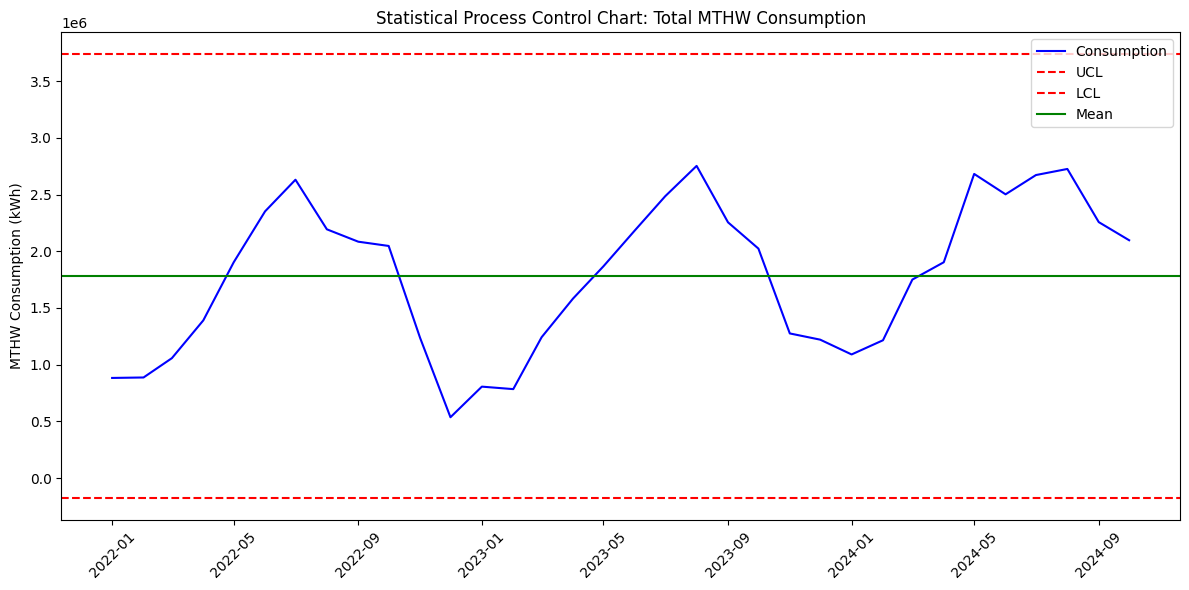

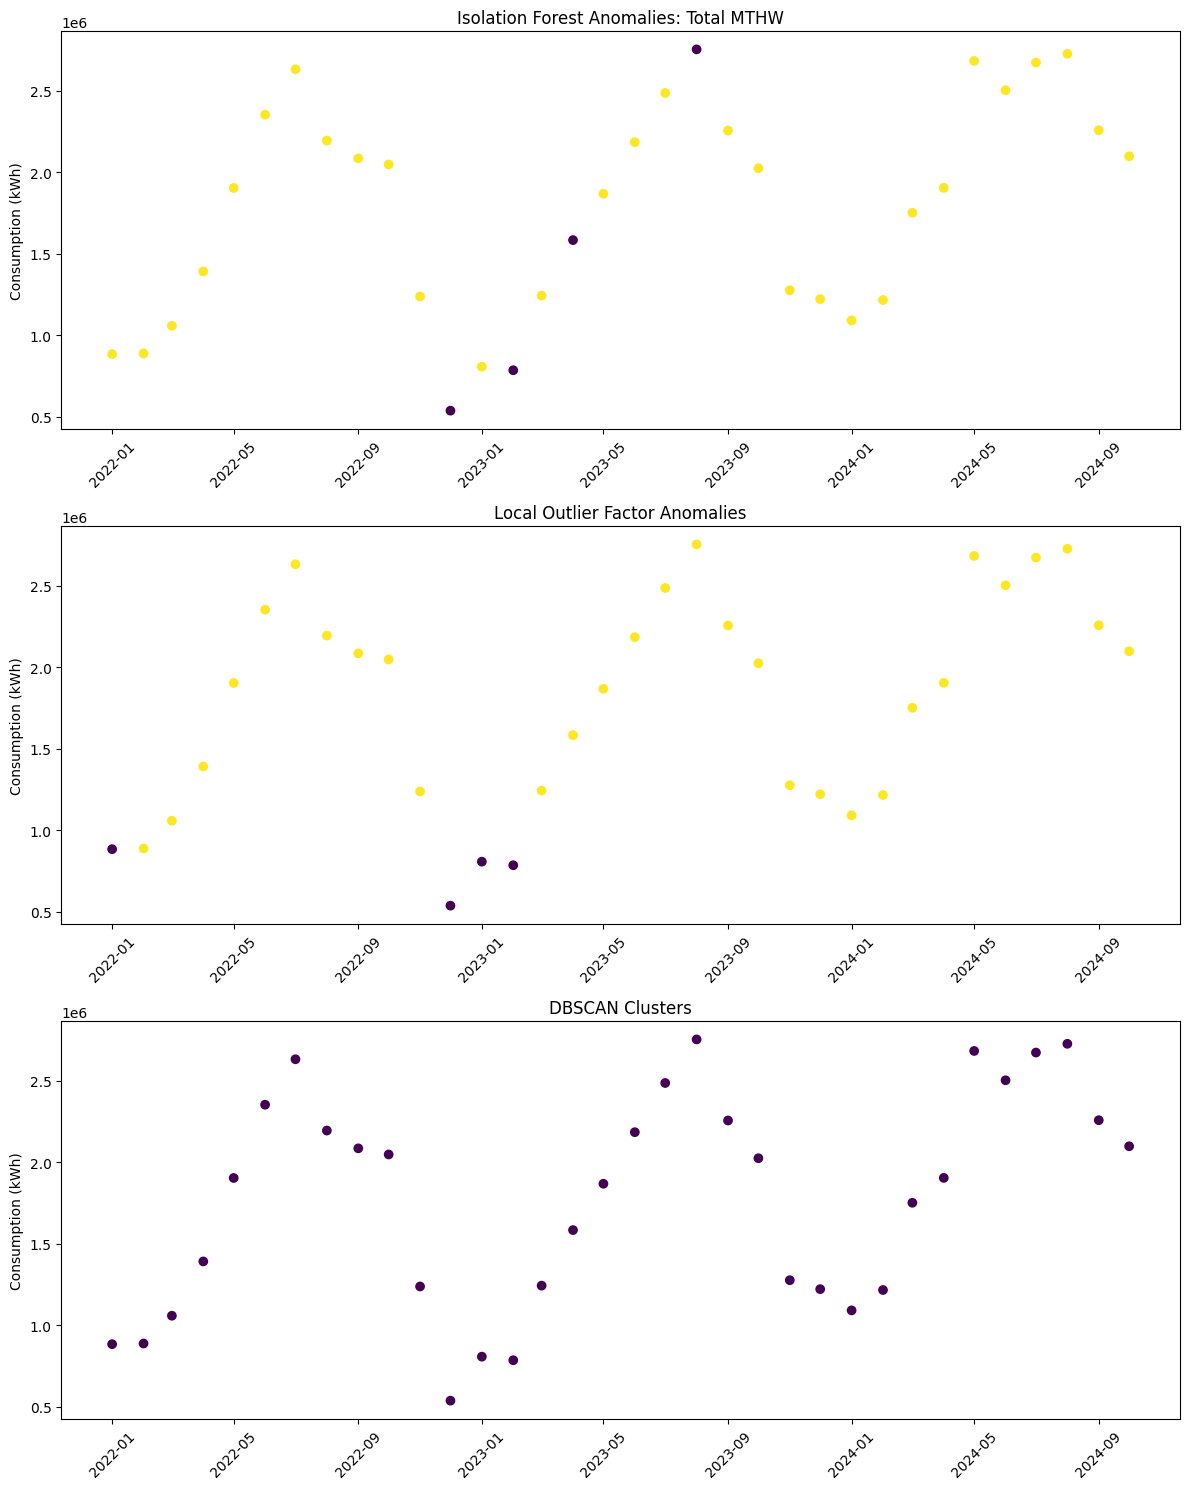


Anomaly Detection Summary for Total MTHW:

Potential anomalies detected by Isolation Forest:


In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def perform_anomaly_detection(data, consumption_col='consumption'):
    """Perform anomaly detection for total MTHW consumption"""
    
    # Get consumption values and convert to time series
    consumption_values = data[consumption_col].values.reshape(-1, 1)
    dates = pd.to_datetime(data['month'].apply(lambda x: '01-' + x.replace('_', '-')))
    
    # 1. Statistical Process Control (3-sigma)
    mean = np.mean(consumption_values)
    std = np.std(consumption_values)
    upper_limit = mean + 3*std
    lower_limit = mean - 3*std
    
    plt.figure(figsize=(12, 6))
    plt.plot(dates, consumption_values, 'b-', label='Consumption')
    plt.axhline(y=upper_limit, color='r', linestyle='--', label='UCL')
    plt.axhline(y=lower_limit, color='r', linestyle='--', label='LCL')
    plt.axhline(y=mean, color='g', linestyle='-', label='Mean')
    plt.title(f'Statistical Process Control Chart: Total MTHW Consumption')
    plt.xticks(rotation=45)
    plt.ylabel('MTHW Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 2. Multiple Anomaly Detection Methods
    # Standardize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(consumption_values)
    
    # Apply detection methods
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_forest_labels = iso_forest.fit_predict(scaled_data)
    
    lof = LocalOutlierFactor(contamination=0.1)
    lof_labels = lof.fit_predict(scaled_data)
    
    dbscan = DBSCAN(eps=0.5, min_samples=3)
    dbscan_labels = dbscan.fit_predict(scaled_data)
    
    # Plot results
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    # Isolation Forest
    ax1.scatter(dates, consumption_values, c=iso_forest_labels, cmap='viridis')
    ax1.set_title('Isolation Forest Anomalies: Total MTHW')
    ax1.set_ylabel('Consumption (kWh)')
    ax1.tick_params(axis='x', rotation=45)
    
    # LOF
    ax2.scatter(dates, consumption_values, c=lof_labels, cmap='viridis')
    ax2.set_title('Local Outlier Factor Anomalies')
    ax2.set_ylabel('Consumption (kWh)')
    ax2.tick_params(axis='x', rotation=45)
    
    # DBSCAN
    ax3.scatter(dates, consumption_values, c=dbscan_labels, cmap='viridis')
    ax3.set_title('DBSCAN Clusters')
    ax3.set_ylabel('Consumption (kWh)')
    ax3.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

    # Print summary while filtering out expected low values
    print("\nAnomaly Detection Summary for Total MTHW:")
    
    # Filter anomalies based on domain knowledge
    iso_anomalies = []
    lof_anomalies = []
    dbscan_anomalies = []
    
    for i, (date, value) in enumerate(zip(dates, consumption_values)):
        # Only consider as anomaly if consumption is unusually high
        # or unexpectedly low during peak season (June-August)
        month = date.month
        if (iso_forest_labels[i] == -1 and 
            (value > upper_limit or 
             (month in [6,7,8] and value < mean*0.5))):
            iso_anomalies.append((date, value[0]))
            
    print("\nPotential anomalies detected by Isolation Forest:")
    for date, value in iso_anomalies:
        print(f"Date: {date.strftime('%Y-%m')}, Consumption: {value:.2f} kWh")

    return {
        'iso_forest': iso_forest_labels,
        'lof': lof_labels,
        'dbscan': dbscan_labels
    }

# Execute for total MTHW consumption
total_mthw = melted_total[melted_total['meter_location'] == 'MTHW Total consumption']
anomaly_results = perform_anomaly_detection(total_mthw)


Statistical Analysis for Individual Buildings:

Normality Tests for St Margaret's MTHW :

Shapiro-Wilk test:
Statistic: 0.9440
p-value: 0.0813
Interpretation: Normal distribution

Anderson-Darling test:
Statistic: 0.5849
Critical values: [0.526 0.599 0.718 0.838 0.996]

Distribution Statistics:
Skewness: 0.3220
Kurtosis: 0.9548

Normality Tests for G601, UniCol :

Shapiro-Wilk test:
Statistic: 0.8976
p-value: 0.0040
Interpretation: Not Normal distribution

Anderson-Darling test:
Statistic: 1.2227
Critical values: [0.526 0.599 0.718 0.838 0.996]

Distribution Statistics:
Skewness: -0.4257
Kurtosis: -1.2664

Normality Tests for D402, Hayward College :

Shapiro-Wilk test:
Statistic: 0.9482
p-value: 0.1082
Interpretation: Normal distribution

Anderson-Darling test:
Statistic: 0.5397
Critical values: [0.526 0.599 0.718 0.838 0.996]

Distribution Statistics:
Skewness: 0.0802
Kurtosis: -1.1355

Normality Tests for F402, Union:

Shapiro-Wilk test:
Statistic: 0.9654
p-value: 0.3477
Interpretati

/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_60084/922118611.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')


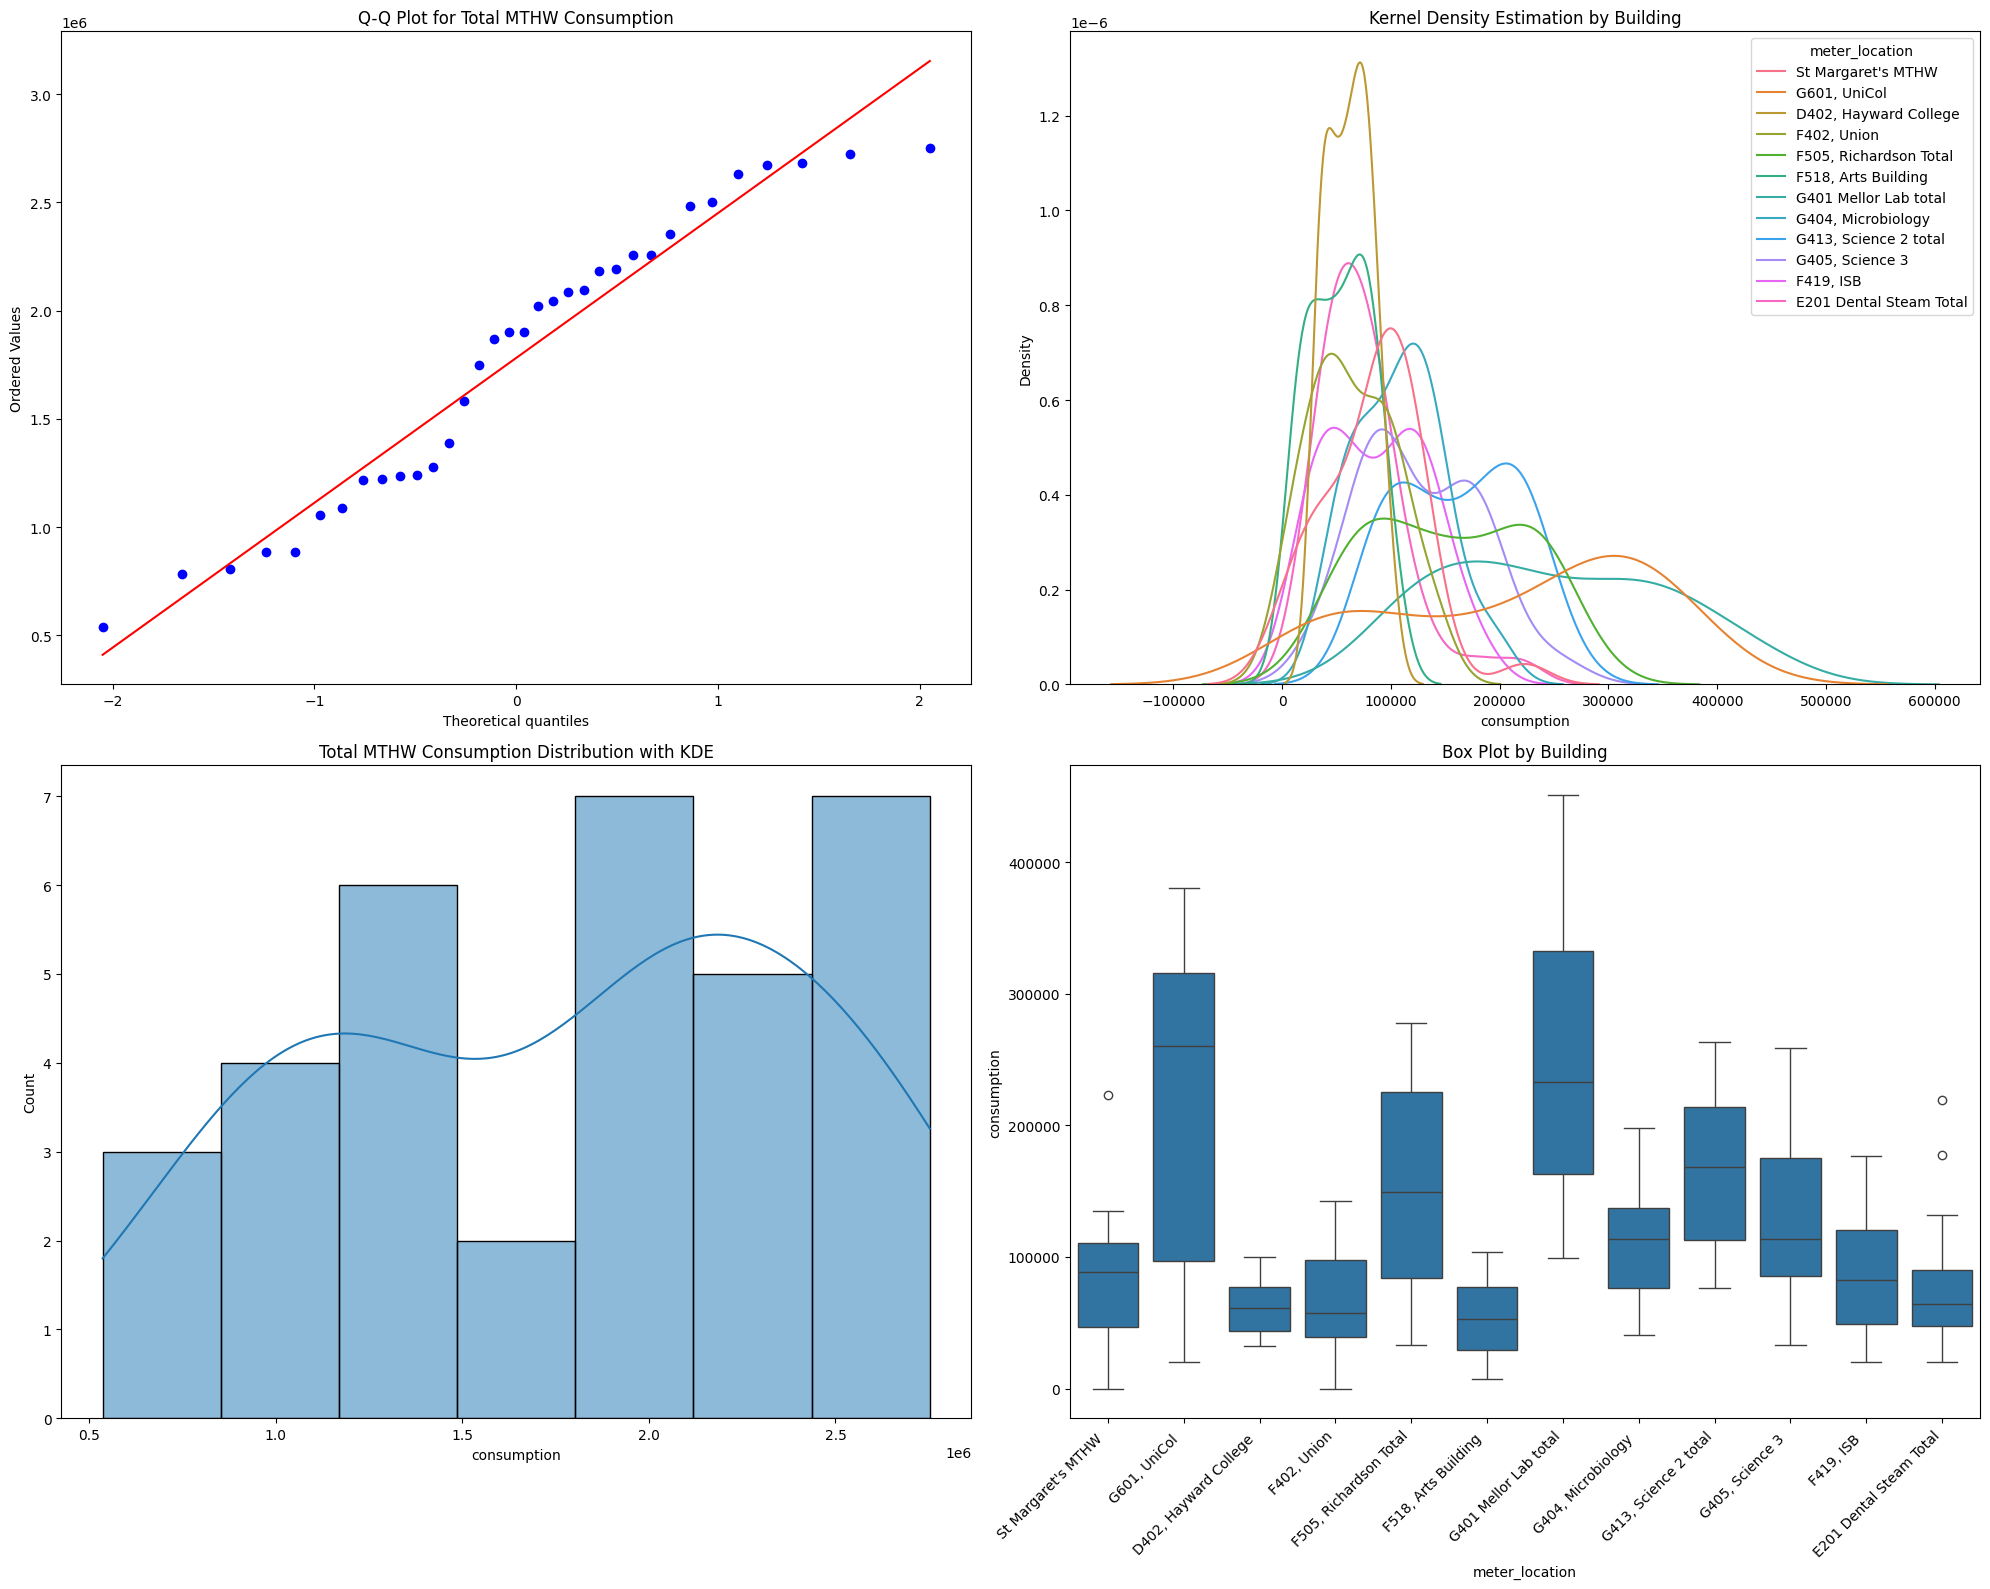


Descriptive Statistics for Total MTHW Consumption:
count    3.400000e+01
mean     1.781648e+06
std      6.610500e+05
min      5.362400e+05
25%      1.224554e+06
50%      1.902885e+06
75%      2.256635e+06
max      2.752910e+06
Name: consumption, dtype: float64

One-sample Kolmogorov-Smirnov test:
Statistic: 1.0000
p-value: 0.0000
Interpretation: Not Normal distribution


In [18]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, anderson

def run_statistical_analysis(melted_buildings, melted_total):
    # Create figure for visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    
    # 1. Q-Q Plot for total consumption
    stats.probplot(melted_total['consumption'], dist="norm", plot=ax1)
    ax1.set_title("Q-Q Plot for Total MTHW Consumption", fontsize=12)
    
    # 2. Kernel Density Plot by building
    sns.kdeplot(data=melted_buildings, x='consumption', hue='meter_location', ax=ax2)
    ax2.set_title("Kernel Density Estimation by Building", fontsize=12)
    
    # 3. Histogram with KDE for total consumption
    sns.histplot(data=melted_total, x='consumption', kde=True, ax=ax3)
    ax3.set_title("Total MTHW Consumption Distribution with KDE", fontsize=12)
    
    # 4. Box Plot by building
    sns.boxplot(data=melted_buildings, x='meter_location', y='consumption', ax=ax4)
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
    ax4.set_title("Box Plot by Building", fontsize=12)
    
    plt.tight_layout()
    plt.show()

def run_normality_tests(data, name):
    """Run normality tests and print results"""
    print(f"\nNormality Tests for {name}:")
    
    # Shapiro-Wilk test
    statistic, p_value = shapiro(data)
    print(f"\nShapiro-Wilk test:")
    print(f"Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Interpretation: {'Normal' if p_value > 0.05 else 'Not Normal'} distribution")
    
    # Anderson-Darling test
    result = anderson(data)
    print(f"\nAnderson-Darling test:")
    print(f"Statistic: {result.statistic:.4f}")
    print("Critical values:", result.critical_values)
    
    # Calculate skewness and kurtosis
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    print(f"\nDistribution Statistics:")
    print(f"Skewness: {skewness:.4f}")
    print(f"Kurtosis: {kurtosis:.4f}")

# Run analysis for individual buildings
print("Statistical Analysis for Individual Buildings:")
for building in melted_buildings['meter_location'].unique():
    building_data = melted_buildings[melted_buildings['meter_location'] == building]['consumption']
    run_normality_tests(building_data, building)

# Run analysis for total consumption
print("\nStatistical Analysis for Total MTHW Consumption:")
total_data = melted_total[melted_total['meter_location'] == 'MTHW Total consumption']['consumption']
run_normality_tests(total_data, "Total MTHW")

# Create visualizations
run_statistical_analysis(melted_buildings, melted_total)

# Additional descriptive statistics
print("\nDescriptive Statistics for Total MTHW Consumption:")
print(total_data.describe())

# Hypothesis Testing
# One-sample Kolmogorov-Smirnov test for normality
ks_statistic, ks_pvalue = stats.kstest(total_data, 'norm')
print("\nOne-sample Kolmogorov-Smirnov test:")
print(f"Statistic: {ks_statistic:.4f}")
print(f"p-value: {ks_pvalue:.4f}")
print(f"Interpretation: {'Normal' if ks_pvalue > 0.05 else 'Not Normal'} distribution")


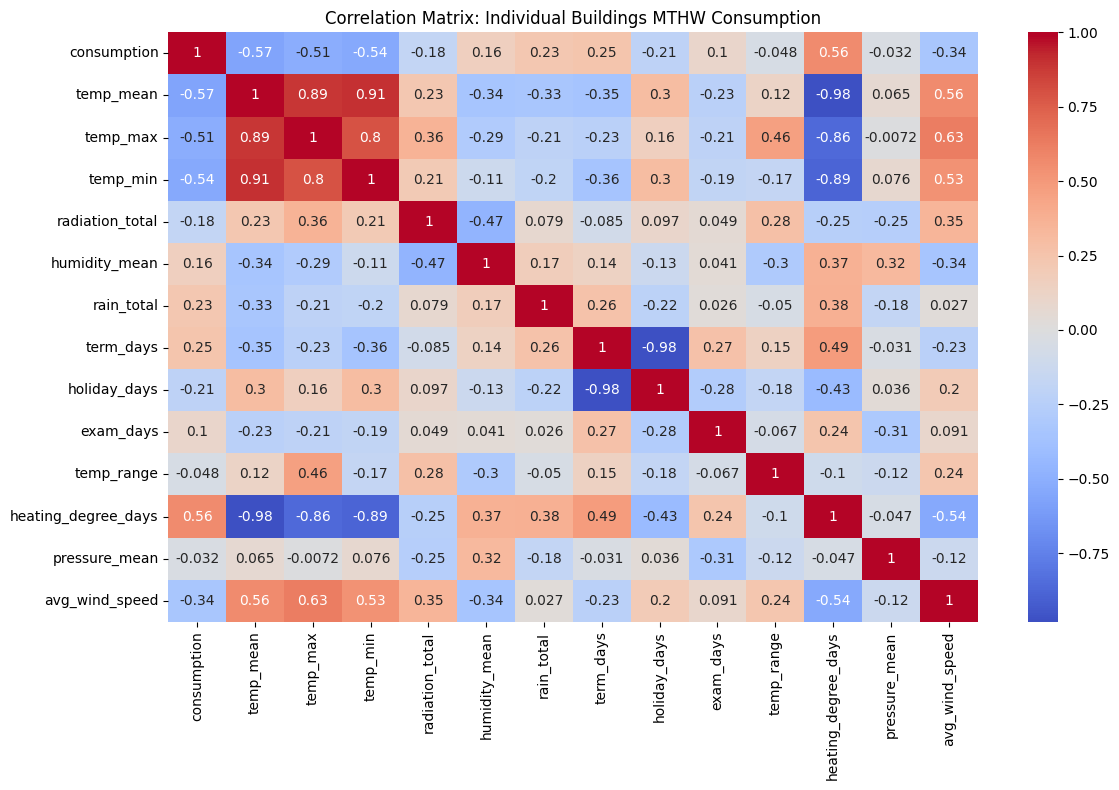

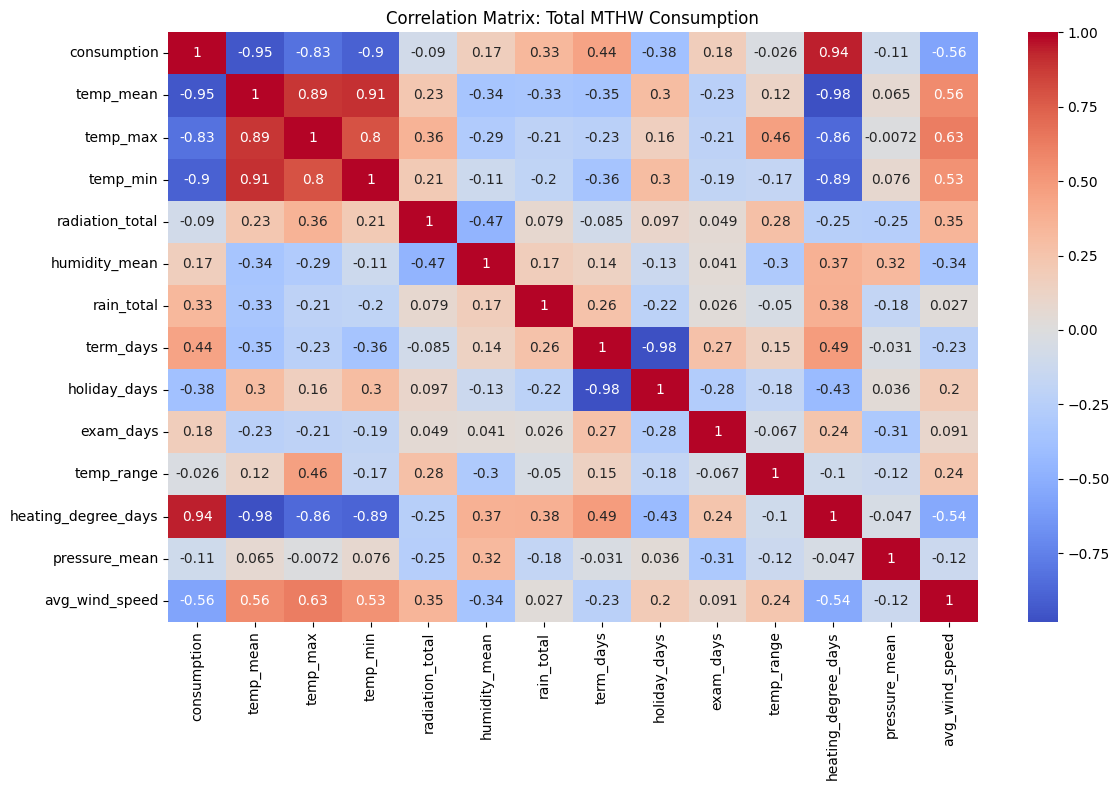

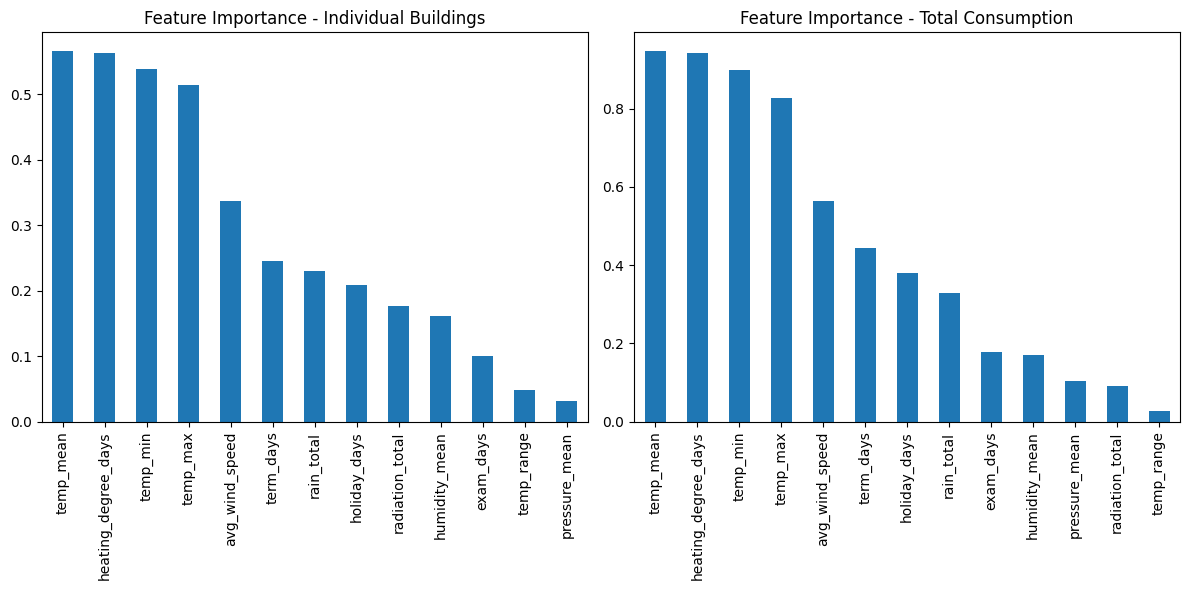

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

BASE_DIR = Path(os.getcwd()).parents[2]  # Get root directory
FILE_PATH = BASE_DIR / "backend/data/Cleaned/Mthw_data.csv"
WEATHER_PATH = BASE_DIR / "backend/data/Weather/Load_weather_monthly.csv"
mthw_df = pd.read_csv(FILE_PATH)
weather_df=pd.read_csv(WEATHER_PATH)
# Load and prepare the data
def prepare_data():

    
    # Separate individual buildings and total consumption
    buildings_df = mthw_df.iloc[:-1]  # All rows except last
    total_df = mthw_df.iloc[-1:]      # Last row only
    
    # Convert month names to numbers if needed
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    
    # Convert Month column if it contains text values
    if weather_df['Month'].dtype == 'O':  # Check if Month is object (string) type
        weather_df['Month'] = weather_df['Month'].map(month_map)

    # Melt MTHW data for time series format
    buildings_melted = pd.melt(buildings_df, 
                              id_vars=['meter_location'],
                              var_name='date', 
                              value_name='consumption')
    
    total_melted = pd.melt(total_df,
                          id_vars=['meter_location'],
                          var_name='date',
                          value_name='consumption')
    
    # Convert date columns
    buildings_melted['date'] = pd.to_datetime(buildings_melted['date'].apply(lambda x: '01-' + x.replace('_', '-')))
    total_melted['date'] = pd.to_datetime(total_melted['date'].apply(lambda x: '01-' + x.replace('_', '-')))
    
    # Create date column in weather data
    weather_df['date'] = pd.to_datetime(weather_df[['Year', 'Month']].assign(Day=1))
    
    return buildings_melted, total_melted, weather_df

# Create additional features
def create_features(df, weather_df):
    # Merge with weather data
    df = pd.merge(df, weather_df, on='date', how='left')
    
    # Time-based features
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['season'] = pd.cut(df['date'].dt.month, 
                         bins=[0,3,6,9,12], 
                         labels=['Winter','Spring','Summer','Fall'])
    
    # Academic calendar features
    df['is_term_time'] = df['term_days'] > 0
    df['is_holiday'] = df['holiday_days'] > 0
    df['is_exam_period'] = df['exam_days'] > 0
    
    # Temperature variation features
    df['temp_range'] = df['temp_max'] - df['temp_min']
    df['temp_std'] = df['temp_std_dev']
    
    # Heating degree days (base temperature 18°C)
    df['heating_degree_days'] = np.maximum(18 - df['temp_mean'], 0) * df['term_days']
    
    return df

# Calculate correlations
def analyze_correlations(df, title):
    # Select numerical columns for correlation
    numerical_cols = ['consumption', 'temp_mean', 'temp_max', 'temp_min', 
                     'radiation_total', 'humidity_mean', 'rain_total',
                     'term_days', 'holiday_days', 'exam_days', 'temp_range',
                     'heating_degree_days', 'pressure_mean', 'avg_wind_speed']
    
    correlation_matrix = df[numerical_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Matrix: {title}')
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

# Calculate feature importance
def get_feature_importance(df):
    features = ['temp_mean', 'temp_max', 'temp_min', 'radiation_total', 
                'humidity_mean', 'rain_total', 'term_days', 'holiday_days',
                'exam_days', 'temp_range', 'heating_degree_days', 
                'pressure_mean', 'avg_wind_speed']
    
    importance = pd.Series(index=features, 
                          data=[abs(df['consumption'].corr(df[f])) for f in features])
    
    return importance.sort_values(ascending=False)

# Main analysis
buildings_data, total_data, weather_df = prepare_data()

# Process buildings data
buildings_processed = create_features(buildings_data, weather_df)
buildings_corr = analyze_correlations(buildings_processed, 'Individual Buildings MTHW Consumption')

# Process total consumption data
total_processed = create_features(total_data, weather_df)
total_corr = analyze_correlations(total_processed, 'Total MTHW Consumption')

# Get and plot feature importance
plt.figure(figsize=(12, 6))

# Buildings feature importance
buildings_importance = get_feature_importance(buildings_processed)
plt.subplot(1, 2, 1)
buildings_importance.plot(kind='bar')
plt.title('Feature Importance - Individual Buildings')
plt.xticks(rotation=90,fontsize=10)

# Total consumption feature importance
total_importance = get_feature_importance(total_processed)
plt.subplot(1, 2, 2)
total_importance.plot(kind='bar')
plt.title('Feature Importance - Total Consumption')
plt.xticks(rotation=90,fontsize=10)

plt.tight_layout()
plt.show()


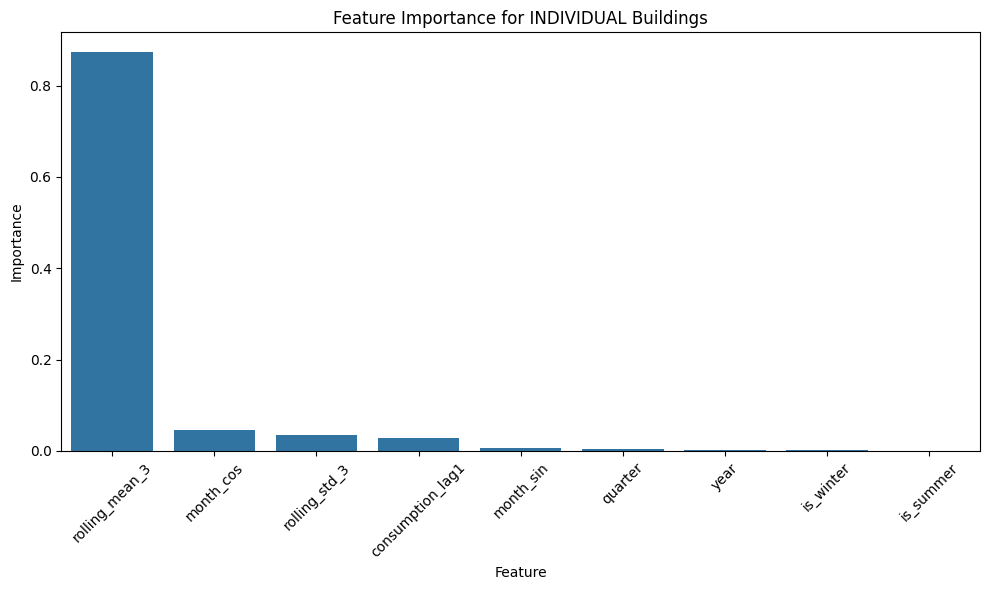

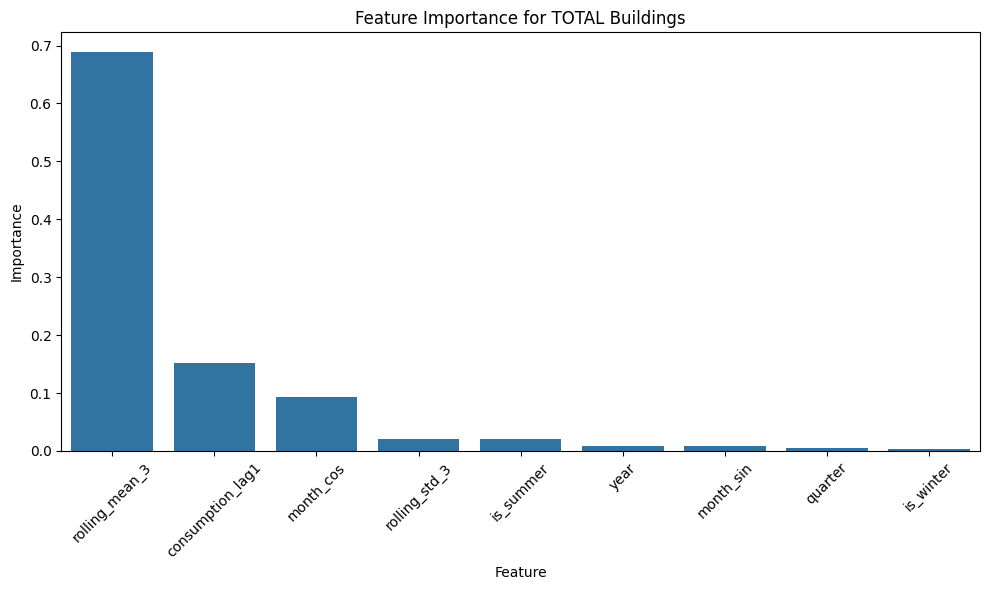

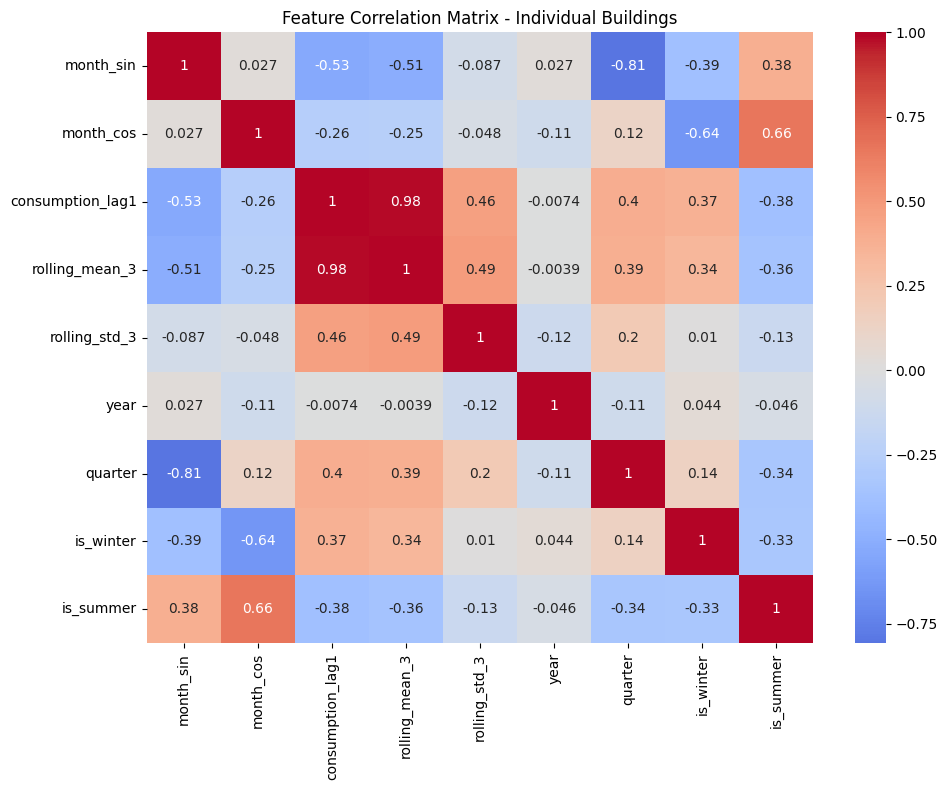

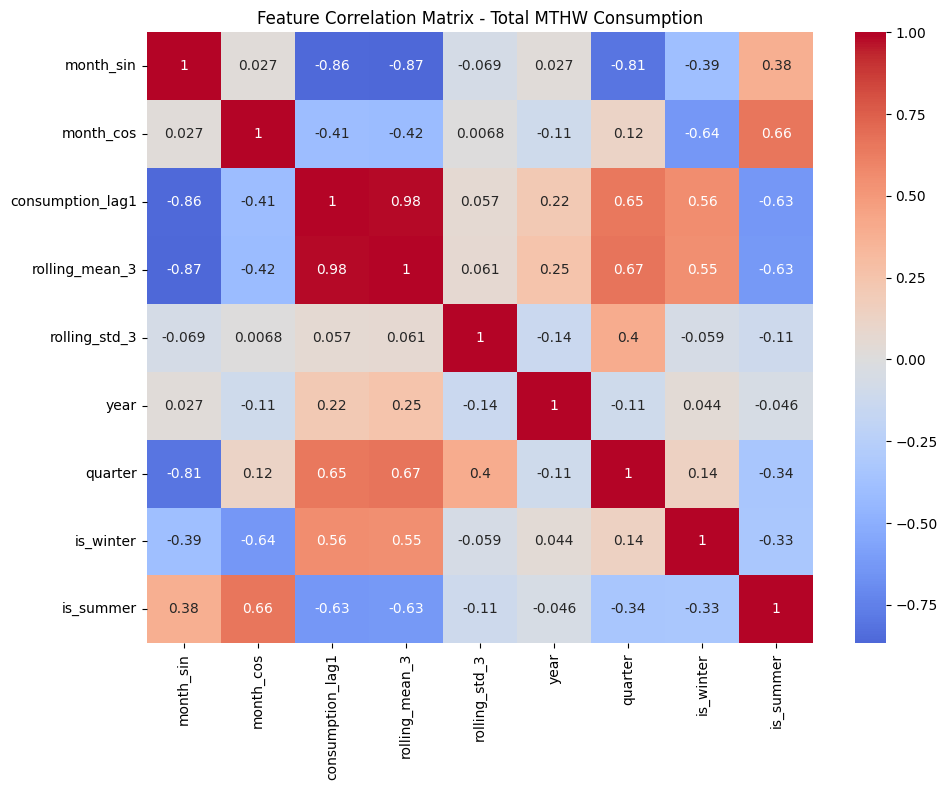

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def create_time_features(df):
    # Create copy to avoid modifying original dataframe
    df = df.copy()
    
    # Get month and year from datetime column
    month = df['month'].dt.month
    year = df['month'].dt.year
    
    # Create time-based features
    df['month'] = month
    df['year'] = year
    
    # Cyclical encoding of months
    df['month_sin'] = np.sin(2 * np.pi * month/12)
    df['month_cos'] = np.cos(2 * np.pi * month/12)
    
    # Lag and rolling features
    df['consumption_lag1'] = df.groupby('meter_location')['consumption'].shift(1).bfill()
    df['rolling_mean_3'] = df.groupby('meter_location')['consumption'].rolling(3, min_periods=1).mean().reset_index(0, drop=True)
    df['rolling_std_3'] = df.groupby('meter_location')['consumption'].rolling(3, min_periods=1).std().reset_index(0, drop=True)
    
    # Additional features
    df['quarter'] = ((month - 1) // 3 + 1).astype(int)  # Calculate quarter directly from month
    df['is_winter'] = month.isin([6, 7, 8]).astype(int)  # Southern hemisphere winter
    df['is_summer'] = month.isin([12, 1, 2]).astype(int) # Southern hemisphere summer
    
    return df


def analyze_feature_importance(df, building_type='INDIVIDUAL'):
    # Select data based on building type
    if building_type == 'TOTAL':
        data = df[df['meter_location'] == 'MTHW Total consumption']
    else:
        data = df[df['meter_location'] != 'MTHW Total consumption']
    
    # Select features for modeling
    features = ['month_sin', 'month_cos', 'consumption_lag1', 
               'rolling_mean_3', 'rolling_std_3', 'year',
               'quarter', 'is_winter', 'is_summer']
    
    X = data[features]
    y = data['consumption']
    
    # Handle missing values
    X = X.fillna(0)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Get feature importance
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance, x='Feature', y='Importance')
    plt.title(f'Feature Importance for {building_type} Buildings')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return importance



# Main execution
BASE_DIR = Path(os.getcwd()).parents[2]  # Get root directory
FILE_PATH = BASE_DIR / "backend/data/Cleaned/Mthw_data.csv"
mthw_df = pd.read_csv(FILE_PATH)

# Separate building meters and total consumption
building_meters = mthw_df.iloc[:-1] # First 13 rows (individual buildings)
total_consumption = mthw_df.iloc[-1:] # Last row (total consumption)

# Convert month column to datetime
melted_buildings = pd.melt(building_meters, 
                              id_vars=['meter_location'],
                              var_name='month', 
                              value_name='consumption')
    
melted_total = pd.melt(total_consumption,
                          id_vars=['meter_location'],
                          var_name='month',
                          value_name='consumption')
    
melted_buildings['month'] = pd.to_datetime(melted_buildings['month'].apply(lambda x: '01-' + x.replace('_', '-')))
melted_total['month'] = pd.to_datetime(melted_total['month'].apply(lambda x: '01-' + x.replace('_', '-')))

# Create features for both individual buildings and total consumption
buildings_features = create_time_features(melted_buildings)
total_features = create_time_features(melted_total)

# Analyze feature importance
individual_importance = analyze_feature_importance(buildings_features, 'INDIVIDUAL')
total_importance = analyze_feature_importance(total_features, 'TOTAL')

# Check multicollinearity for both datasets
features_to_check = ['month_sin', 'month_cos', 'consumption_lag1', 
                    'rolling_mean_3', 'rolling_std_3', 'year',
                    'quarter', 'is_winter', 'is_summer']

# Correlation matrix for individual buildings
buildings_correlation = buildings_features[features_to_check].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(buildings_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix - Individual Buildings')
plt.tight_layout()
plt.show()

# Correlation matrix for total consumption
total_correlation = total_features[features_to_check].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(total_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix - Total MTHW Consumption')
plt.tight_layout()
plt.show()


/Users/dhanarajrajasekaran/uems_project_clean/backend/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/dhanarajrajasekaran/uems_project_clean/backend/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/dhanarajrajasekaran/uems_project_clean/backend/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Weather-based Models:

Results for Weather-based Linear Regression:
Train R²: 0.3413 (+/- 0.0253)
Test R²: 0.1740 (+/- 0.1257)
Train RMSE: 69920.49
Test RMSE: 71512.85

Results for Weather-based Lasso:
Train R²: 0.3413 (+/- 0.0253)
Test R²: 0.1740 (+/- 0.1257)
Train RMSE: 69920.49
Test RMSE: 71512.85

Results for Weather-based Ridge:
Train R²: 0.3413 (+/- 0.0253)
Test R²: 0.1740 (+/- 0.1257)
Train RMSE: 69920.49
Test RMSE: 71513.00

Results for Weather-based Random Forest:
Train R²: 0.3576 (+/- 0.0231)
Test R²: 0.1653 (+/- 0.1210)
Train RMSE: 69056.68
Test RMSE: 72049.06

Temporal-based Models:

Results for Temporal-based Linear Regression:
Train R²: 0.7665 (+/- 0.0456)
Test R²: 0.7812 (+/- 0.0450)
Train RMSE: 41335.37
Test RMSE: 36493.77

Results for Temporal-based Lasso:
Train R²: 0.7665 (+/- 0.0456)
Test R²: 0.7812 (+/- 0.0450)
Train RMSE: 41335.37
Test RMSE: 36493.76

Results for Temporal-based Ridge:
Train R²: 0.7665 (+/- 0.0456)
Test R²: 0.7812 (+/- 0.0450)
Train RMSE: 41335.38


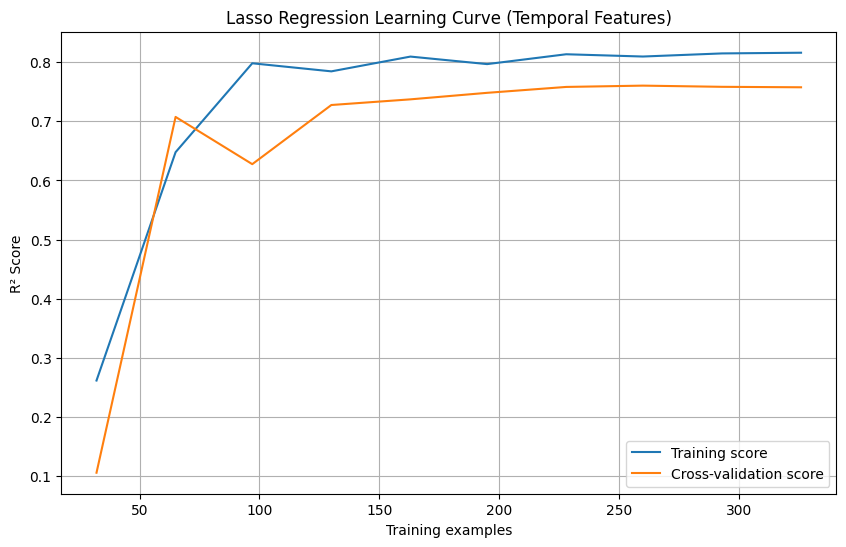

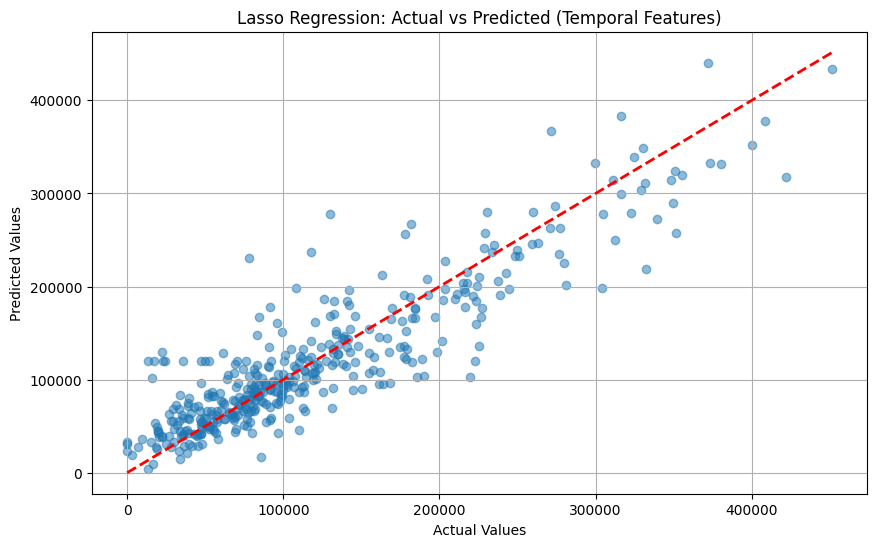

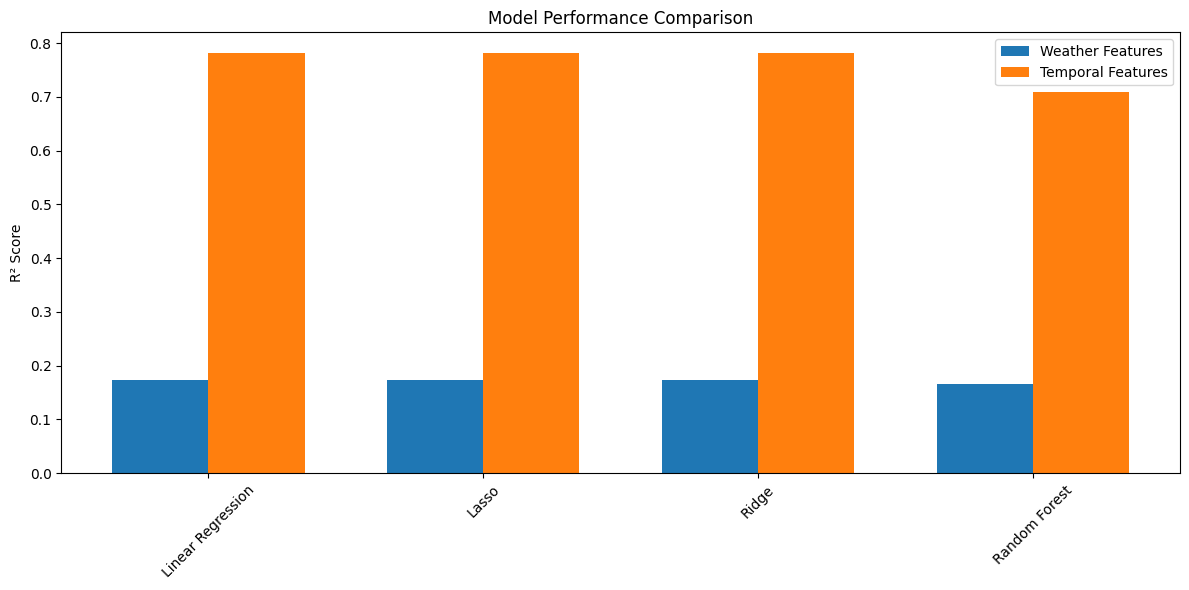

In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, learning_curve
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

BASE_DIR = Path(os.getcwd()).parents[2]  # Get root directory
FILE_PATH = BASE_DIR / "backend/data/Cleaned/Mthw_data.csv"
WEATHER_PATH = BASE_DIR / "backend/data/Weather/Load_weather_monthly.csv"
mthw_df = pd.read_csv(FILE_PATH)
weather_df=pd.read_csv(WEATHER_PATH)
# Load and prepare the data
def prepare_data():

    
    # Separate individual buildings and total consumption
    buildings_df = mthw_df.iloc[:-1]  # All rows except last
    total_df = mthw_df.iloc[-1:]      # Last row only
    
    # Convert month names to numbers if needed
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    
    # Convert Month column if it contains text values
    if weather_df['Month'].dtype == 'O':  # Check if Month is object (string) type
        weather_df['Month'] = weather_df['Month'].map(month_map)

    # Melt MTHW data for time series format
    buildings_melted = pd.melt(buildings_df, 
                              id_vars=['meter_location'],
                              var_name='date', 
                              value_name='consumption')
    
    total_melted = pd.melt(total_df,
                          id_vars=['meter_location'],
                          var_name='date',
                          value_name='consumption')
    
    # Convert date columns
    buildings_melted['date'] = pd.to_datetime(buildings_melted['date'].apply(lambda x: '01-' + x.replace('_', '-')))
    total_melted['date'] = pd.to_datetime(total_melted['date'].apply(lambda x: '01-' + x.replace('_', '-')))
    
    # Create date column in weather data
    weather_df['date'] = pd.to_datetime(weather_df[['Year', 'Month']].assign(Day=1))
    
    return buildings_melted, total_melted, weather_df

def prepare_temporal_features(df):
    """Prepare temporal features with modifications to reduce overfitting"""
    # Create copy to avoid modifying original dataframe
    df = df.copy()
    
    # Calculate rolling statistics by meter location
    # Using longer windows and fewer rolling means to reduce complexity
    df['rolling_mean_6'] = df.groupby('meter_location')['consumption'].transform(
        lambda x: x.rolling(window=6, min_periods=3).mean()  # Increased min_periods
    )
    
    df['rolling_std_6'] = df.groupby('meter_location')['consumption'].transform(
        lambda x: x.rolling(window=6, min_periods=3).std()  # Added std for variability
    )
    
    # Since month is already in datetime format from previous processing
    # Extract month number directly from the datetime column
    month = pd.to_datetime(df['month']).dt.month
    
    # Create cyclical encoding for months
    df['month_cos'] = np.cos(2 * np.pi * month/12) 
    df['month_sin'] = np.sin(2 * np.pi * month/12)  # Added sin component
    
    # Create seasonal indicators - using quarter instead of specific months
    df['quarter'] = ((month - 1) // 3 + 1).astype(int)
    
    # Create normalized lag features
    df['consumption_lag1'] = df.groupby('meter_location')['consumption'].shift(1)
    
    # Calculate year-over-year seasonal difference
    df['seasonal_diff'] = df.groupby(['meter_location', 'month'])['consumption'].diff(12)

    # Select features for modeling - using more robust feature set
    features = pd.DataFrame({
        'rolling_mean_6': df['rolling_mean_6'],
        'rolling_std_6': df['rolling_std_6'],  # Capture variability
        'month_cos': df['month_cos'],
        'month_sin': df['month_sin'],
        'quarter': df['quarter'],
        'consumption_lag1': df['consumption_lag1'],
        'seasonal_diff': df['seasonal_diff']
    })

    # Handle missing values more robustly
    features = features.fillna(features.mean())  # Use mean instead of forward/backward fill
    
    return features


def prepare_weather_features(df):
    """Prepare weather-based features"""
    features = pd.DataFrame({
        'heating_degree_days': df['heating_degree_days'],
        'term_days': df['term_days']
    })
    return features

def evaluate_model(model, X, y, model_name):
    """Evaluate model using time series cross-validation"""
    tscv = TimeSeriesSplit(n_splits=5)
    scores = {
        'train_r2': [],
        'test_r2': [], 
        'train_rmse': [],
        'test_rmse': []
    }
    
    # Handle NaN values by filling with mean
    X = np.nan_to_num(X, nan=np.nanmean(X))
    
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        
        # Get predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        scores['train_r2'].append(r2_score(y_train, y_train_pred))
        scores['test_r2'].append(r2_score(y_test, y_test_pred))
        scores['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        scores['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    print(f"\nResults for {model_name}:")
    print(f"Train R²: {np.mean(scores['train_r2']):.4f} (+/- {np.std(scores['train_r2']):.4f})")
    print(f"Test R²: {np.mean(scores['test_r2']):.4f} (+/- {np.std(scores['test_r2']):.4f})")
    print(f"Train RMSE: {np.mean(scores['train_rmse']):.2f}")
    print(f"Test RMSE: {np.mean(scores['test_rmse']):.2f}")
    
    return scores

def plot_learning_curve(model, X, y, title):
    """Plot learning curve for model"""
    # Handle NaN values
    X = np.nan_to_num(X, nan=np.nanmean(X))
    
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=5, scoring='r2'
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('R² Score')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid()
    plt.show()


def plot_actual_vs_predicted(model, X, y, title):
    """Plot actual vs predicted values"""
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Prepare data
buildings_data, total_data, weather_df = prepare_data()
buildings_processed = create_features(buildings_data, weather_df)
total_processed = create_features(total_data, weather_df)

# Prepare features for both weather and temporal models
X_weather = prepare_weather_features(buildings_processed)
X_temporal = prepare_temporal_features(buildings_processed)
y = buildings_processed['consumption']

# Scale features
scaler = StandardScaler()
X_weather_scaled = scaler.fit_transform(X_weather)
X_temporal_scaled = scaler.fit_transform(X_temporal)
X_temporal_scaled = np.nan_to_num(X_temporal_scaled, nan=np.nanmean(X_temporal_scaled))

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.01),
    'Ridge': Ridge(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate weather-based models
print("\nWeather-based Models:")
weather_scores = {}
for name, model in models.items():
    scores = evaluate_model(model, X_weather_scaled, y, f"Weather-based {name}")
    weather_scores[name] = scores

# Evaluate temporal-based models
print("\nTemporal-based Models:")
temporal_scores = {}
for name, model in models.items():
    scores = evaluate_model(model, X_temporal_scaled, y, f"Temporal-based {name}")
    temporal_scores[name] = scores

# Plot learning curve and actual vs predicted for best Lasso model
lasso = Lasso(alpha=0.01)
plot_learning_curve(lasso, X_temporal_scaled, y, "Lasso Regression Learning Curve (Temporal Features)")
lasso.fit(X_temporal_scaled, y)
plot_actual_vs_predicted(lasso, X_temporal_scaled, y, "Lasso Regression: Actual vs Predicted (Temporal Features)")

# Compare model performances
def plot_model_comparison(weather_scores, temporal_scores):
    models = list(weather_scores.keys())
    weather_r2 = [np.mean(scores['test_r2']) for scores in weather_scores.values()]
    temporal_r2 = [np.mean(scores['test_r2']) for scores in temporal_scores.values()]
    
    x = np.arange(len(models))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width/2, weather_r2, width, label='Weather Features')
    ax.bar(x + width/2, temporal_r2, width, label='Temporal Features')
    
    ax.set_ylabel('R² Score')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.show()

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.01),
    'Ridge': Ridge(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

'''# Evaluate weather-based models
print("\nWeather-based Models:")
weather_scores = {}
for name, model in models.items():
    scores = evaluate_model(model, X_weather_scaled, y, f"Weather-based {name}")
    weather_scores[name] = scores

# Evaluate temporal-based models  
print("\nTemporal-based Models:")
temporal_scores = {}
for name, model in models.items():
    scores = evaluate_model(model, X_temporal_scaled, y, f"Temporal-based {name}")
    temporal_scores[name] = scores
'''
# Plot comparison
plot_model_comparison(weather_scores, temporal_scores)



/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_60084/2656553441.py:116: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features = features.fillna(method='ffill').fillna(method='bfill')



Weather-based Models for Total MTHW:

Results for Weather-based Linear Regression:
Train R²: 0.9448 (+/- 0.0277)
Test R²: 0.6412 (+/- 0.3198)
Train RMSE: 145480.12
Test RMSE: 238215.97

Results for Weather-based Lasso:
Train R²: 0.9448 (+/- 0.0277)
Test R²: 0.6412 (+/- 0.3198)
Train RMSE: 145480.12
Test RMSE: 238215.97

Results for Weather-based Ridge:
Train R²: 0.9448 (+/- 0.0277)
Test R²: 0.6412 (+/- 0.3203)
Train RMSE: 145480.87
Test RMSE: 238123.14

Results for Weather-based Random Forest:
Train R²: 0.9848 (+/- 0.0026)
Test R²: 0.6397 (+/- 0.3466)
Train RMSE: 78684.67
Test RMSE: 233016.28

Temporal-based Models for Total MTHW:

Results for Temporal-based Linear Regression:
Train R²: 0.9447 (+/- 0.0248)
Test R²: 0.6615 (+/- 0.2661)
Train RMSE: 143853.53
Test RMSE: 222093.76

Results for Temporal-based Lasso:
Train R²: 0.9447 (+/- 0.0248)
Test R²: 0.6615 (+/- 0.2661)
Train RMSE: 143853.53
Test RMSE: 222093.71

Results for Temporal-based Ridge:
Train R²: 0.9445 (+/- 0.0245)
Test R²: 

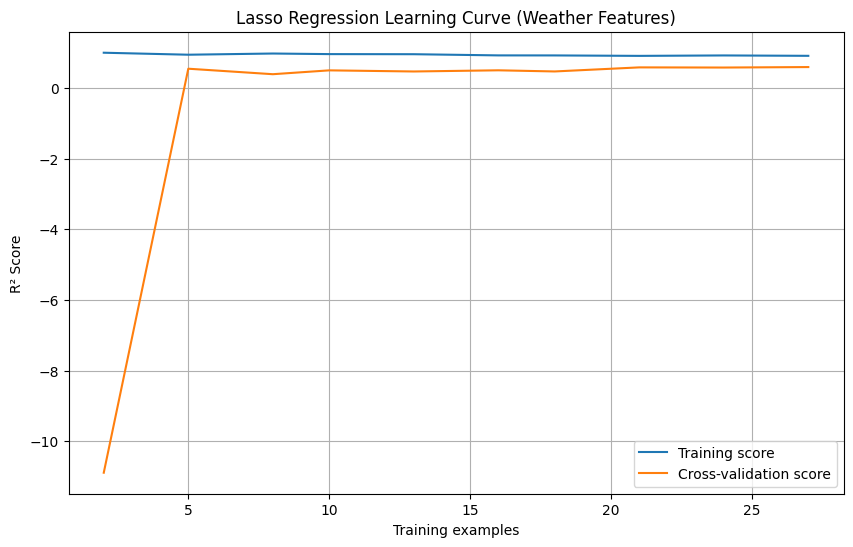

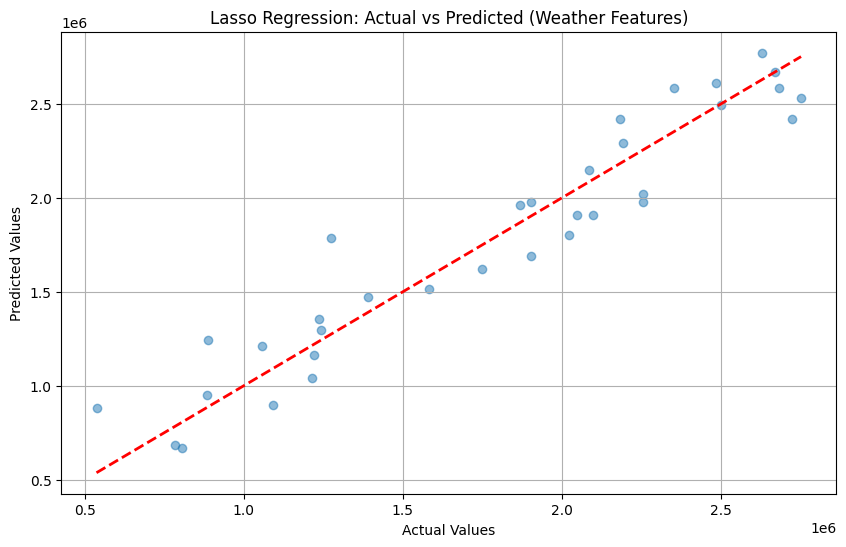

In [117]:
# Prepare data for total MTHW consumption modeling
def evaluate_model(model, X, y, model_name):
    """Evaluate model using time series cross-validation"""
    tscv = TimeSeriesSplit(n_splits=5)
    scores = {
        'train_r2': [],
        'test_r2': [], 
        'train_rmse': [],
        'test_rmse': []
    }
    
    # Handle NaN values by filling with mean
    X = np.nan_to_num(X, nan=np.nanmean(X))
    
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        
        # Get predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        scores['train_r2'].append(r2_score(y_train, y_train_pred))
        scores['test_r2'].append(r2_score(y_test, y_test_pred))
        scores['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        scores['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    print(f"\nResults for {model_name}:")
    print(f"Train R²: {np.mean(scores['train_r2']):.4f} (+/- {np.std(scores['train_r2']):.4f})")
    print(f"Test R²: {np.mean(scores['test_r2']):.4f} (+/- {np.std(scores['test_r2']):.4f})")
    print(f"Train RMSE: {np.mean(scores['train_rmse']):.2f}")
    print(f"Test RMSE: {np.mean(scores['test_rmse']):.2f}")
    
    return scores

def plot_learning_curve(model, X, y, title):
    """Plot learning curve for model"""
    # Handle NaN values
    X = np.nan_to_num(X, nan=np.nanmean(X))
    
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=5, scoring='r2'
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('R² Score')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid()
    plt.show()


def plot_actual_vs_predicted(model, X, y, title):
    """Plot actual vs predicted values"""
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.show()

def prepare_temporal_features(df):
    """Prepare temporal features for total MTHW consumption"""
    df = df.copy()
    
    # Calculate rolling statistics
    df['rolling_mean_3'] = df['consumption'].rolling(window=3, min_periods=1).mean()
    df['rolling_mean_6'] = df['consumption'].rolling(window=6, min_periods=6).mean()
    df['rolling_std_3'] = df['consumption'].rolling(window=3, min_periods=1).std()
    
    # Extract month from datetime
    month = pd.to_datetime(df['month']).dt.month
    
    # Create cyclical encoding for months
    df['month_cos'] = np.cos(2 * np.pi * month/12)
    df['month_sin'] = np.sin(2 * np.pi * month/12)
    
    # Create seasonal indicators
    df['quarter'] = ((month - 1) // 3 + 1).astype(int)
    
    # Create lag features
    df['consumption_lag1'] = df['consumption'].shift(1)
    df['consumption_lag3'] = df['consumption'].shift(3)
    df['consumption_lag6'] = df['consumption'].shift(6)
    
    # Calculate seasonal difference
    df['seasonal_diff'] = df.groupby(month)['consumption'].diff(12)

    # Select features for modeling
    features = pd.DataFrame({
        'rolling_mean_3': df['rolling_mean_3'],
        'rolling_mean_6': df['rolling_mean_6'],
        #'rolling_std_3': df['rolling_std_3'],
        #'month_cos': df['month_cos'],
        #'month_sin': df['month_sin'], 
        #'quarter': df['quarter'],
        'consumption_lag1': df['consumption_lag1']#,
        #'consumption_lag3': df['consumption_lag3'],
        #'consumption_lag6': df['consumption_lag6'],
        #'year': df['year']
        #'seasonal_diff': df['seasonal_diff']
    })

    # Handle missing values
    features = features.fillna(method='ffill').fillna(method='bfill')
    
    return features

def prepare_weather_features(df):
    """Prepare weather features for total MTHW consumption"""
    features = pd.DataFrame({
        #'heating_degree_days': df['heating_degree_days']#,
        'term_days': df['term_days'],
        #'avg_wind_speed':df['avg_wind_speed']#,
        'temp_mean':df['temp_mean']
    })
    return features

# Process total MTHW consumption data
total_processed = create_features(total_data, weather_df)

# Prepare features for modeling
X_weather = prepare_weather_features(total_processed)
X_temporal = prepare_temporal_features(total_processed)
y = total_processed['consumption']

# Scale features
scaler = StandardScaler()
X_weather_scaled = scaler.fit_transform(X_weather)
X_temporal_scaled = scaler.fit_transform(X_temporal)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.01),
    'Ridge': Ridge(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=400, random_state=42)
}

# Evaluate weather-based models
print("\nWeather-based Models for Total MTHW:")
weather_scores = {}
for name, model in models.items():
    scores = evaluate_model(model, X_weather_scaled, y, f"Weather-based {name}")
    weather_scores[name] = scores

# Evaluate temporal-based models  
print("\nTemporal-based Models for Total MTHW:")
temporal_scores = {}
for name, model in models.items():
    scores = evaluate_model(model, X_temporal_scaled, y, f"Temporal-based {name}")
    temporal_scores[name] = scores

# Plot learning curve and actual vs predicted for Lasso
lasso = Lasso(alpha=0.01)
plot_learning_curve(lasso, X_weather_scaled, y, "Lasso Regression Learning Curve (Weather Features)")
lasso.fit(X_weather_scaled, y)
plot_actual_vs_predicted(lasso, X_weather_scaled, y, "Lasso Regression: Actual vs Predicted (Weather Features)")
